In [1]:
import pandas as pd
import sys
import os

# plot

%matplotlib inline
from rdkit import Chem

src_path = os.path.join("..")
if src_path not in sys.path:
    sys.path.append(src_path)

src_path = os.path.join("..", "src")
if src_path not in sys.path:
    sys.path.append(src_path)

src_path = os.path.join("..", "external", "HOSE_code_generator")
if src_path not in sys.path:
    sys.path.append(src_path)

from src import (
    common,
    atomic_features_2D,
)  # Some common methods I defined

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

pd.options.mode.chained_assignment = None  # Suppress the SettingWithCopyWarning

# Data import

In [2]:
datapath = os.path.join("..", "dataset", "All PFAS in Lab_w_smiles.xlsx")

PFAS_in_lab = pd.read_excel(datapath, index_col=0)
print(f"Number of PFAS in our lab {PFAS_in_lab.shape[0]}")
PFAS_in_lab["SMILES"] = common.canonical_smiles(PFAS_in_lab["SMILES"])
PFAS_in_lab.head(5)

Number of PFAS in our lab 222


Group            Compound name        CAS Alternative name  \
0  PFCA  Sodium trifluoroacetate  2923-18-4          C2 COOH   
1  PFCA  Perfluoropropionic acid   422-64-0          C3 COOH   
2  PFCA    Perfluorobutyric acid   375-22-4          C4 COOH   
3  PFCA  Perfluoropentanoic acid  2706-90-3          C5 COOH   
4  PFCA   Perfluorohexanoic acid   307-24-4          C6 COOH   

                                       SMILES  
0                     O=C([O-])C(F)(F)F.[Na+]  
1                       O=C(O)C(F)(F)C(F)(F)F  
2                O=C(O)C(F)(F)C(F)(F)C(F)(F)F  
3         O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F  
4  O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F

In [3]:
data_path = os.path.join("..", "dataset", "Raw_PFAS 19F NMR spectra data.csv")

all_fluorinated_compounds = pd.read_csv(data_path, index_col=0)

print(
    f"Number of the fluorinated compounds in our dataset for modeling {all_fluorinated_compounds.shape[0]}"
)
all_fluorinated_compounds.head()

Number of the fluorinated compounds in our dataset for modeling 647


Group  IsPFAS(haveCF2)  CAS  \
0  Per- and polyfluorinated carboxylic acids             True  NaN   
1  Per- and polyfluorinated carboxylic acids             True  NaN   
2  Per- and polyfluorinated carboxylic acids             True  NaN   
3  Per- and polyfluorinated carboxylic acids             True  NaN   
4  Per- and polyfluorinated carboxylic acids             True  NaN   

             Compound name    Code Solvent_used_for_NMR    Source Note  \
0  perfluoropropionic acid  COOH_1                CDCl3  100+PFAS  NaN   
1   perfluorobutanoic acid  COOH_2                CDCl3  100+PFAS  NaN   
2  perfluoropentanoic acid  COOH_3                CDCl3  100+PFAS  NaN   
3   perfluorohexanoic acid  COOH_4                CDCl3  100+PFAS  NaN   
4  perfluoroheptanoic acid  COOH_5                CDCl3  100+PFAS  NaN   

                                              SMILES Internal Standard  \
0                              O=C(O)C(F)(F)C(F)(F)F               NaN   
1                       O=C(O)C(F)(F)C(F)(F)C(F)(F)F               NaN   
2                O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F               NaN   
3         O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F               NaN   
4  O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F               NaN   

   FluorineInConjSystem   0   1    2   3       4       5   6       7       8  \
0                   0.0 NaN NaN  NaN NaN -122.45 -122.45 NaN  -83.40  -83.40   
1                   0.0 NaN NaN  NaN NaN -119.78 -119.78 NaN -127.39 -127.39   
2                   0.0 NaN NaN  NaN NaN -119.41 -119.41 NaN -123.99 -123.99   
3                   0.0 NaN NaN  NaN NaN -119.23 -119.23 NaN -122.87 -122.87   
4                   0.0 NaN NaN  NaN NaN -119.14 -119.14 NaN -122.01 -122.01   

      9      10      11     12      13      14     15       16      17     18  \
0 -83.4     NaN     NaN    NaN     NaN     NaN    NaN      NaN     NaN    NaN   
1   NaN  -81.14  -81.14 -81.14     NaN     NaN    NaN      NaN     NaN    NaN   
2   NaN -126.26 -126.26    NaN  -81.19  -81.19 -81.19      NaN     NaN    NaN   
3   NaN -123.25 -123.25    NaN -126.44 -126.44    NaN   -81.06  -81.06 -81.06   
4   NaN -122.99 -122.99    NaN -122.99 -122.99    NaN  -126.29 -126.29    NaN   

      19     20     21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0    NaN    NaN    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1    NaN    NaN    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2    NaN    NaN    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3    NaN    NaN    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 -80.96 -80.96 -80.96 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN

# PFAS not reported in the modeling dataset

In [11]:
PFAS_not_reported = PFAS_in_lab[
    ~PFAS_in_lab["SMILES"].isin(all_fluorinated_compounds["SMILES"])
]
print(f"Number of PFAS not reported but in our lab: {PFAS_not_reported.shape[0]}")

Number of PFAS not reported but in our lab: 162


In [5]:
PFAS_not_reported

Group                                      Compound name  \
0               PFCA                            Sodium trifluoroacetate   
13          PFdiCOOH                               Difluoromalonic acid   
14          PFdiCOOH                          2,2-difluorosuccinic acid   
15          PFdiCOOH                           Tetrafluorosuccinic acid   
16          PFdiCOOH                            Hexafluoroglutaric acid   
..               ...                                                ...   
227  Ring Structures                          4-(Pentafluorothio)phenol   
229   Acyl chlroides         Perfluoro(2-methyl-3-oxahexanoyl) chloride   
230            Ester                      Methyl heptafluoroisobutyrate   
232           Ketone                   1,1,1-Trifluoropentane-2,4-dione   
233          Nitrile  2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-pentadecafluoroo...   

            CAS Alternative name  \
0     2923-18-4          C2 COOH   
13    1514-85-8        C3(COOH)2   
14     665-31-6   C4(COOH)2 telo   
15     377-38-8        C4(COOH)2   
16     376-73-8        C5(COOH)2   
..          ...              ...   
227    774-94-7              NaN   
229  72848-57-8              NaN   
230    680-05-7              NaN   
232    367-57-7              NaN   
233    647-12-1              NaN   

                                                SMILES  
0                              O=C([O-])C(F)(F)F.[Na+]  
13                                 O=C(O)C(F)(F)C(=O)O  
14                                O=C(O)CC(F)(F)C(=O)O  
15                          O=C(O)C(F)(F)C(F)(F)C(=O)O  
16                   O=C(O)C(F)(F)C(F)(F)C(F)(F)C(=O)O  
..                                                 ...  
227                          Oc1ccc(S(F)(F)(F)(F)F)cc1  
229       O=C(Cl)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)F  
230                      COC(=O)C(F)(C(F)(F)F)C(F)(F)F  
232                               CC(=O)CC(=O)C(F)(F)F  
233  N#CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...  

[162 rows x 5 columns]

In [6]:
PFAS_not_reported.to_csv(
    os.path.join("..", "artifacts", "temp", "PFAS_not_reported.csv")
)

## Check 19F NMR value range for specific structures

In [4]:
class track2DNeighborAtoms:
    def findNeighborsNextSphere(
        self, last_sphere_atoms, current_sphere_atoms, next_sphere_level
    ):
        """Get a list of atom indexs in the next spheres

        Parameters
        ----------
        last_sphere_atoms: list
            A list of atoms in the last sphere.

        current_sphere_atoms: list
            A list of atoms in the current sphere

        next_sphere_level: int
             The number of next sphere. For target F atom, the C atom next to it belongs to sphere 0.

        Output
        ----------
        A list of indexs of atoms in the next sphere. If the sphere is No.4. Then the output list will be a list of length 12.
        """
        neighbor_list = []

        # Convert last_sphere_atoms to a set of indices for faster lookups
        if last_sphere_atoms is not None:
            last_sphere_atoms_set = set(
                atom.GetIdx() for atom in last_sphere_atoms if atom is not None
            )
        else:
            last_sphere_atoms_set = set()

        for atom in current_sphere_atoms:
            if atom is None:
                neighbors = [
                    None
                ] * 3  # Adjusted to 3 neighbors. In our case, each atom have at most 4 neighbor atoms.
            else:
                neighbors = (
                    atom.GetNeighbors()
                )  # This function will get all neighbor atoms
                # Filter out atoms that are in last_sphere_atoms
                neighbors = [
                    a for a in neighbors if a.GetIdx() not in last_sphere_atoms_set
                ]

            neighbor_list.extend(neighbors)

        # Final length should be 3^sphere_level
        return neighbor_list

    # Get neighbors of each F atom
    def getNeighborsOfFAtom(self, F_atom):
        """For the target F atom, get neighbor atoms in the 6 neighbor spheres
        Parameters
        ----------
        F_atom: atom object

        Output
        ----------
        sphere0[:1], sphere1, sphere2, sphere3, sphere4, sphere5: list, list, list, list, list, list
            index of atoms in sphere 0, index of atoms in sphere 1, index of atoms in sphere 2, index of atoms in sphere 3,
            index of atoms in sphere 4, and index of atoms in sphere 5
        """
        sphere0_atoms = self.findNeighborsNextSphere(None, [F_atom], 0)
        sphere1_atoms = self.findNeighborsNextSphere(
            [F_atom], sphere0_atoms[:1], 1
        )  # We know sphere0 can only have one valid atom, C
        sphere2_atoms = self.findNeighborsNextSphere(
            sphere0_atoms[:1], sphere1_atoms, 2
        )
        sphere3_atoms = self.findNeighborsNextSphere(sphere1_atoms, sphere2_atoms, 3)
        sphere4_atoms = self.findNeighborsNextSphere(sphere2_atoms, sphere3_atoms, 4)
        sphere5_atoms = self.findNeighborsNextSphere(sphere3_atoms, sphere4_atoms, 5)

        sphere0 = [
            atom.GetSymbol() if atom is not None else None for atom in sphere0_atoms
        ]
        sphere1 = [
            atom.GetSymbol() if atom is not None else None for atom in sphere1_atoms
        ]
        sphere2 = [
            atom.GetSymbol() if atom is not None else None for atom in sphere2_atoms
        ]
        sphere3 = [
            atom.GetSymbol() if atom is not None else None for atom in sphere3_atoms
        ]
        sphere4 = [
            atom.GetSymbol() if atom is not None else None for atom in sphere4_atoms
        ]
        sphere5 = [
            atom.GetSymbol() if atom is not None else None for atom in sphere5_atoms
        ]

        return (
            sphere0[:1],
            sphere1,
            sphere2,
            sphere3,
            sphere4,
            sphere5,
        )  # Only keep the only one valid atom, C

    def getNeighborsInDiffSpheres(self, smiles):
        """
        Parameter
        ----------
        smiles: string
            SMILES of the target compound

        Output
        ----------
        df： Dataframe
            Each line in the df shows the index of neighbor atoms for one F atom in the molecule.
            column name of the df are the number of spheres: 0, 1, 2, 3, 4, 5.
            index of the df are index of F atoms
        """
        # Create an RDKit molecule object from the SMILES string
        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)
        neighbors = {}
        for atom in mol.GetAtoms():
            atom_symbol = (
                atom.GetSymbol()
            )  # Get the atomic symbol (e.g., 'C', 'O', 'F')
            if atom_symbol == "F":
                atom_index = atom.GetIdx()  # Get the index of the atom
                sphere0, sphere1, sphere2, sphere3, sphere4, sphere5 = (
                    self.getNeighborsOfFAtom(atom)
                )
                neighbors[atom_index] = [
                    sphere0,
                    sphere1,
                    sphere2,
                    sphere3,
                    sphere4,
                    sphere5,
                ]

        df = pd.DataFrame.from_dict(neighbors).T
        df = df.map(lambda x: tuple(x) if isinstance(x, list) else x)
        df = df.drop_duplicates()
        return df

    def getNieghborsFromDataset(self, dataset):
        """Get a dataframe with each row being the atomic features of neighbor atoms of a target F atom in a fluorinated compound"""
        # Step 1. Transform the column names of the DataFrame to integers where possible and keep them as strings otherwise
        dataset.columns = [common.convert_column_name(name) for name in dataset.columns]
        fluorinated_compounds_content = pd.DataFrame()
        for i, row in dataset.iterrows():
            smiles = row["SMILES"]
            fluorinated_compounds = row["Code"]
            content = self.getNeighborsInDiffSpheres(smiles)
            index_list = content.index
            try:
                content["NMR_Peaks"] = row[index_list]
            except (KeyError, IndexError):
                pass

            content = content.rename(lambda x: f"{x}_{fluorinated_compounds}")
            fluorinated_compounds_content = pd.concat(
                [fluorinated_compounds_content, content], axis=0
            )
        return fluorinated_compounds_content

In [5]:
get2DNeighbors_class = track2DNeighborAtoms()
df = get2DNeighbors_class.getNieghborsFromDataset(all_fluorinated_compounds)
df

0          1                   2             3       4  \
4_COOH_1           (C,)  (C, F, C)     (O, O, F, F, F)          (H,)      ()   
7_COOH_1           (C,)  (C, F, F)           (C, F, F)        (O, O)    (H,)   
4_COOH_2           (C,)  (C, F, C)     (O, O, F, F, C)  (H, F, F, F)      ()   
7_COOH_2           (C,)  (C, F, C)  (C, F, F, F, F, F)        (O, O)    (H,)   
10_COOH_2          (C,)  (C, F, F)           (C, F, F)     (C, F, F)  (O, O)   
...                 ...        ...                 ...           ...     ...   
7_From_Review_484  (C,)     (C, N)           (C, F, C)  (N, H, F, N)      ()   
0_From_Review_485  (C,)     (N, N)              (C, C)  (F, C, C, F)  (F, F)   
4_From_Review_485  (C,)     (N, C)           (C, F, C)  (F, N, F, N)      ()   
6_From_Review_485  (C,)     (C, C)        (N, F, F, N)        (C, C)  (F, F)   
8_From_Review_485  (C,)     (C, N)           (C, F, C)  (N, F, F, N)      ()   

                      5 NMR_Peaks  
4_COOH_1             ()   -122.45  
7_COOH_1             ()     -83.4  
4_COOH_2             ()   -119.78  
7_COOH_2             ()   -127.39  
10_COOH_2          (H,)    -81.14  
...                 ...       ...  
7_From_Review_484    ()     -72.0  
0_From_Review_485    ()     -43.0  
4_From_Review_485    ()     -69.0  
6_From_Review_485    ()    -171.0  
8_From_Review_485    ()     -69.0  

[1736 rows x 7 columns]

In [7]:
df_dropna = df.dropna(subset=["NMR_Peaks"])
df_dropna["NMR_Peaks"] = df_dropna["NMR_Peaks"].apply(pd.to_numeric)
df_dropna

0          1                   2             3       4  \
4_COOH_1           (C,)  (C, F, C)     (O, O, F, F, F)          (H,)      ()   
7_COOH_1           (C,)  (C, F, F)           (C, F, F)        (O, O)    (H,)   
4_COOH_2           (C,)  (C, F, C)     (O, O, F, F, C)  (H, F, F, F)      ()   
7_COOH_2           (C,)  (C, F, C)  (C, F, F, F, F, F)        (O, O)    (H,)   
10_COOH_2          (C,)  (C, F, F)           (C, F, F)     (C, F, F)  (O, O)   
...                 ...        ...                 ...           ...     ...   
7_From_Review_484  (C,)     (C, N)           (C, F, C)  (N, H, F, N)      ()   
0_From_Review_485  (C,)     (N, N)              (C, C)  (F, C, C, F)  (F, F)   
4_From_Review_485  (C,)     (N, C)           (C, F, C)  (F, N, F, N)      ()   
6_From_Review_485  (C,)     (C, C)        (N, F, F, N)        (C, C)  (F, F)   
8_From_Review_485  (C,)     (C, N)           (C, F, C)  (N, F, F, N)      ()   

                      5  NMR_Peaks  
4_COOH_1             ()    -122.45  
7_COOH_1             ()     -83.40  
4_COOH_2             ()    -119.78  
7_COOH_2             ()    -127.39  
10_COOH_2          (H,)     -81.14  
...                 ...        ...  
7_From_Review_484    ()     -72.00  
0_From_Review_485    ()     -43.00  
4_From_Review_485    ()     -69.00  
6_From_Review_485    ()    -171.00  
8_From_Review_485    ()     -69.00  

[1691 rows x 7 columns]

In [8]:
get_2d_descriptors = atomic_features_2D.getAtomicDescriptorsFrom2DNeighbors()
descriptor_2d_content = get_2d_descriptors.getDescriptorsFromDataset(
    all_fluorinated_compounds, 3
)
descriptor_2d_content.head(3)

0    1    2    3    4    5    6       7    8    9   10   11  \
4_COOH_1  12.011  3.0  0.0  4.0  4.0  4.0  0.0  12.011  2.0  0.0  3.0  4.0   
5_COOH_1  12.011  3.0  0.0  4.0  4.0  4.0  0.0  12.011  2.0  0.0  3.0  4.0   
7_COOH_1  12.011  3.0  0.0  4.0  4.0  4.0  0.0  12.011  3.0  0.0  4.0  4.0   

           12   13      14   15   16   17   18   19   20      21   22   23  \
4_COOH_1  4.0  0.0  18.998  3.0  0.0  1.0  1.0  1.0  0.0  12.011  3.0  0.0   
5_COOH_1  4.0  0.0  18.998  3.0  0.0  1.0  1.0  1.0  0.0  12.011  3.0  0.0   
7_COOH_1  4.0  0.0  18.998  3.0  0.0  1.0  1.0  1.0  0.0  18.998  3.0  0.0   

           24   25   26   27      28   29   30   31   32   33   34      35  \
4_COOH_1  4.0  4.0  4.0  0.0  15.999  2.0  0.0  1.0  2.0  2.0  0.0  15.999   
5_COOH_1  4.0  4.0  4.0  0.0  15.999  2.0  0.0  1.0  2.0  2.0  0.0  15.999   
7_COOH_1  1.0  1.0  1.0  0.0  12.011  2.0  0.0  3.0  4.0  4.0  0.0  18.998   

           36   37   38   39   40   41      42   43   44   45   46   47   48  \
4_COOH_1  2.0  0.0  1.0  2.0  1.0  0.0  18.998  3.0  0.0  1.0  1.0  1.0  0.0   
5_COOH_1  2.0  0.0  1.0  2.0  1.0  0.0  18.998  3.0  0.0  1.0  1.0  1.0  0.0   
7_COOH_1  3.0  0.0  1.0  1.0  1.0  0.0  18.998  3.0  0.0  1.0  1.0  1.0  0.0   

              49   50   51   52   53   54   55      56   57   58   59   60  \
4_COOH_1  18.998  3.0  0.0  1.0  1.0  1.0  0.0  18.998  3.0  0.0  1.0  1.0   
5_COOH_1  18.998  3.0  0.0  1.0  1.0  1.0  0.0  18.998  3.0  0.0  1.0  1.0   
7_COOH_1     NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   

           61   62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  \
4_COOH_1  1.0  0.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5_COOH_1  1.0  0.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7_COOH_1  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

          77  78  79  80  81  82  83  84  85  86  87  88  89  90 NMR_Peaks  
4_COOH_1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   -122.45  
5_COOH_1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   -122.45  
7_COOH_1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     -83.4

## Get F shifts in different structures

In [17]:
# Find F in certain structures:
# CF3-C: 0 [C]; 1 [C, F, F];
results = {}
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("F") == 2 and x.count("C") == 1 and len(x) == 3
        )
    )
]

max_value = filtered_df["NMR_Peaks"].max()
min_value = filtered_df["NMR_Peaks"].min()
mean_value = filtered_df["NMR_Peaks"].mean()
num_points = len(filtered_df)
results["CF3-C"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Min:", min_value)
print("Max:", max_value)
print("Mean:", mean_value)


print(f"Number of datapoints in our dataset: {num_points}")
filtered_df.head(3)

Min: -88.2
Max: -49.4
Mean: -72.9153869047619
Number of datapoints in our dataset: 336


0          1          2          3          4       5  NMR_Peaks
7_COOH_1   [C]  [C, F, F]  [C, F, F]     [O, O]        [H]      []     -83.40
10_COOH_2  [C]  [C, F, F]  [C, F, F]  [C, F, F]     [O, O]     [H]     -81.14
13_COOH_3  [C]  [C, F, F]  [C, F, F]  [C, F, F]  [C, F, F]  [O, O]     -81.19

In [12]:
from IPython.display import display, Image
def show_PFAS_Structures(df):
    '''
    Show the structures of PFAS in the dataset to check the correctness of the data.
    '''
    df[['atom_index', 'PFAS_code']] = df.index.to_series().str.split('_', n=1, expand=True)
    df['atom_index'] = df['atom_index'].astype(int)
    pfas_dict = df.groupby('PFAS_code')['atom_index'].apply(list).to_dict()
    for PFAS_code, atom_index in pfas_dict.items():
        print(f"-------PFAS code: {PFAS_code}, atom index: {atom_index}-------")
        file_path = os.path.join("..", "dataset", "pictures", f"{PFAS_code}.png")
        display(Image(file_path, width=400, height = 200))

### C-CF2-C

In [16]:
# C-CF2-C: 0 [C]; 1 [C, F, C];
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("F") == 1 and x.count("C") == 2 and len(x) == 3
        )
    )
]
min_value = filtered_df["NMR_Peaks"].min()
max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()

num_points = len(filtered_df)
results["C-CF2-C"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Min:", min_value)
print("Max:", max_value)
print("Mean:", mean_value)

print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
# filtered_df.head(3)

Min: -159.0
Max: -84.5
Mean: -121.7869065934066
Number of datapoints in our dataset: 728


### CF3-C6H5

In [18]:
# CF3-C6H5 (CF3-aryl): 0 [C]; 1 [C, F, F]; 2 [C, C]; 3 [H, H, C, C]
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("F") == 2 and x.count("C") == 1 and len(x) == 3
        )
    )
    & (df_list[2].apply(lambda x: x.count("C") == 2 and len(x) == 2))
]

max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["CF3-C6H5"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Min:", min_value)
print("Max:", max_value)
print("Mean:", mean_value)

print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Min: -70.0
Max: -49.4
Mean: -58.976666666666674
Number of datapoints in our dataset: 69


0          1       2                3  \
10_aromatics_1      [C]  [C, F, F]  [C, C]     [C, H, N, C]   
5_aromatics_2       [C]  [C, F, F]  [C, C]     [C, H, C, H]   
11_aromatics_2      [C]  [C, F, F]  [C, C]     [C, H, C, H]   
6_aromatics_3       [C]  [C, F, F]  [C, C]     [C, H, C, H]   
12_aromatics_3      [C]  [C, F, F]  [C, C]     [C, H, C, H]   
7_aromatics_4       [C]  [C, F, F]  [C, C]     [C, H, C, H]   
6_aromatics_5       [C]  [C, F, F]  [C, C]     [C, H, C, H]   
0_aromatics_7       [C]  [F, F, C]  [C, C]     [C, H, C, H]   
7_aromatics_9       [C]  [C, F, F]  [C, C]     [C, H, C, H]   
10_aromatics_10     [C]  [C, F, F]  [C, C]     [C, H, C, C]   
8_aromatics_11      [C]  [C, F, F]  [C, C]     [C, H, C, H]   
0_From_Review_8     [C]  [F, F, C]  [C, C]     [C, H, C, H]   
10_From_Review_350  [C]  [C, F, F]  [C, C]  [H, H, C, H, H]   
3_From_Review_356   [C]  [C, F, F]  [C, C]  [H, H, F, F, F]   
11_From_Review_362  [C]  [C, F, F]  [C, C]     [H, H, O, C]   
12_From_Review_363  [C]  [C, F, F]  [C, C]     [H, H, O, C]   
0_From_Review_367   [C]  [F, F, C]  [C, C]     [C, H, C, C]   
11_From_Review_367  [C]  [C, F, F]  [C, C]     [C, H, C, C]   
0_From_Review_368   [C]  [F, F, C]  [C, C]     [C, H, C, H]   
10_From_Review_368  [C]  [C, F, F]  [C, C]     [C, H, C, H]   
0_From_Review_369   [C]  [F, F, C]  [C, C]     [C, H, C, H]   
9_From_Review_369   [C]  [C, F, F]  [C, C]     [C, H, C, H]   
0_From_Review_370   [C]  [F, F, C]  [C, C]     [C, H, C, H]   
9_From_Review_370   [C]  [C, F, F]  [C, C]     [C, H, C, C]   
14_From_Review_370  [C]  [C, F, F]  [C, C]     [C, C, C, H]   
0_From_Review_371   [C]  [F, F, C]  [C, C]     [C, H, C, C]   
10_From_Review_371  [C]  [C, F, F]  [C, C]     [C, H, C, C]   
15_From_Review_371  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
0_From_Review_372   [C]  [F, F, C]  [C, C]     [C, H, C, H]   
8_From_Review_372   [C]  [C, F, F]  [C, C]     [C, H, C, H]   
14_From_Review_372  [C]  [C, F, F]  [C, C]     [C, H, C, H]   
0_From_Review_373   [C]  [F, F, C]  [C, C]     [C, H, C, H]   
8_From_Review_373   [C]  [C, F, F]  [C, C]     [C, H, C, C]   
13_From_Review_373  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
18_From_Review_373  [C]  [C, F, F]  [C, C]     [C, C, C, H]   
0_From_Review_374   [C]  [F, F, C]  [C, C]     [C, H, C, C]   
8_From_Review_374   [C]  [C, F, F]  [C, C]     [C, H, C, C]   
13_From_Review_374  [C]  [C, F, F]  [C, C]     [C, C, C, H]   
19_From_Review_374  [C]  [C, F, F]  [C, C]     [C, H, C, C]   
0_From_Review_375   [C]  [F, F, C]  [C, C]     [C, H, C, C]   
9_From_Review_375   [C]  [C, F, F]  [C, C]     [C, H, C, C]   
14_From_Review_375  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
19_From_Review_375  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
0_From_Review_376   [C]  [F, F, C]  [C, C]     [C, H, C, C]   
8_From_Review_376   [C]  [C, F, F]  [C, C]     [C, H, C, C]   
13_From_Review_376  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
18_From_Review_376  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
23_From_Review_376  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
0_From_Review_377   [C]  [F, F, C]  [C, C]     [C, C, C, C]   
7_From_Review_377   [C]  [C, F, F]  [C, C]     [C, C, C, C]   
12_From_Review_377  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
17_From_Review_377  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
4_From_Review_378   [C]  [C, F, F]  [C, C]     [C, C, C, C]   
9_From_Review_378   [C]  [C, F, F]  [C, C]     [C, C, C, C]   
14_From_Review_378  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
19_From_Review_378  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
24_From_Review_378  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
4_From_Review_379   [C]  [C, F, F]  [C, C]     [O, C, C, C]   
9_From_Review_379   [C]  [C, F, F]  [C, C]     [C, C, C, C]   
14_From_Review_379  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
19_From_Review_379  [C]  [C, F, F]  [C, C]     [C, C, C, C]   
24_From_Review_379  [C]  [C, F, F]  [C, C]     [C, C, O, C]   
4_From_Review_380   [C]  [C, F, F]  [C, C]     [N, C,

Some rows are CF3 on C=C, we need to distinguish these structures mannually.
For CF3 on benzene ring: Min = -63.9, max = -49.4. Avg = -58.55. Number = 65  
For CF3 on C=C: Min = -70, max = -64, mean = -65.92, number = 4

In [14]:
# base_file_path = os.path.join("..", "artifacts", "results")
# filtered_df.to_csv(os.path.join(base_file_path, "CF3- on C=C or benzene ring.csv"))

In [15]:
results["CF3-C6H5"] = [-63.90, -49.4, -58.55, 65]
results["CF3-C(C)=C"] = [-70, -64, -65.92, 4]

### CF3-CH=C

In [19]:
# CF3-CH=C (CF3-vinylic): 0 [C]; 1 [C, F, F]; 2 [C, ?]; 3 []
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("F") == 2 and x.count("C") == 1 and len(x) == 3
        )
    )
    & (
        df_list[2].apply(
            lambda x: x.count("C") == 1 and x.count("H") == 1 and len(x) == 2
        )
    )
]

max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["CF3-CH=C"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Min:", min_value)
print("Max:", max_value)
print("Mean:", mean_value)

print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Min: -67.0
Max: -58.0
Mean: -63.611111111111114
Number of datapoints in our dataset: 18


0          1       2       3                4  \
3_From_Review_341   [C]  [C, F, F]  [C, H]  [H, H]               []   
7_From_Review_342   [C]  [C, F, F]  [C, H]  [C, H]        [C, H, H]   
7_From_Review_343   [C]  [C, F, F]  [C, H]  [C, H]        [C, H, H]   
9_From_Review_344   [C]  [C, F, F]  [C, H]  [C, H]        [C, H, H]   
8_From_Review_345   [C]  [C, F, F]  [C, H]  [C, H]           [C, C]   
0_From_Review_346   [C]  [F, F, C]  [C, H]  [C, H]           [C, C]   
0_From_Review_347   [C]  [F, F, C]  [C, H]  [C, H]           [C, C]   
10_From_Review_348  [C]  [C, F, F]  [C, H]  [C, H]           [C, H]   
0_From_Review_349   [C]  [F, F, C]  [C, H]  [C, H]           [C, H]   
0_From_Review_354   [C]  [F, F, C]  [C, H]  [C, H]        [F, F, F]   
7_From_Review_354   [C]  [C, F, F]  [C, H]  [C, H]        [F, F, F]   
0_From_Review_355   [C]  [F, F, C]  [C, H]  [C, H]        [F, F, F]   
7_From_Review_355   [C]  [C, F, F]  [C, H]  [C, H]        [F, F, F]   
5_From_Review_357   [C]  [C, F, F]  [C, H]  [C, H]           [O, H]   
6_From_Review_358   [C]  [C, F, F]  [C, H]  [C, H]           [C, O]   
5_From_Review_359   [C]  [C, F, F]  [C, H]  [C, H]           [O, C]   
4_From_Review_360   [C]  [C, F, F]  [C, H]  [C, C]  [H, H, H, O, C]   
6_From_Review_361   [C]  [C, F, F]  [C, H]  [C, H]           [O, O]   

                               5  NMR_Peaks  
3_From_Review_341             []      -67.0  
7_From_Review_342      [C, H, H]      -65.0  
7_From_Review_343      [C, H, H]      -59.0  
9_From_Review_344      [C, H, H]      -65.0  
8_From_Review_345   [C, H, C, H]      -64.0  
0_From_Review_346   [C, H, C, H]      -63.0  
0_From_Review_347   [C, H, C, H]      -58.0  
10_From_Review_348        [C, H]      -64.0  
0_From_Review_349         [C, H]      -63.0  
0_From_Review_354             []      -66.4  
7_From_Review_354             []      -66.4  
0_From_Review_355             []      -60.6  
7_From_Review_355             []      -60.6  
5_From_Review_357             []      -66.0  
6_From_Review_358      [H, H, H]      -65.0  
5_From_Review_359         [C, C]      -66.0  
4_From_Review_360         [C, C]      -60.0  
6_From_Review_361            [H]      -66.0

### CF2=C

In [21]:
# CF2=C: 0 [C]; 1 [C, F];
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("F") == 1 and x.count("C") == 1 and len(x) == 2
        )
    )
]

max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["CF2=C"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Min:", min_value)
print("Max:", max_value)
print("Mean:", mean_value)

print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Min: -134.0
Max: -61.2
Mean: -100.96666666666665
Number of datapoints in our dataset: 24


0       1        2                3             4  \
0_From_Review_258   [C]  [F, C]  [Cl, H]               []            []   
4_From_Review_259   [C]  [C, F]   [C, H]        [O, H, H]           [H]   
0_From_Review_260   [C]  [F, C]   [C, H]        [I, H, H]            []   
2_From_Review_261   [C]  [C, F]   [H, H]               []            []   
3_From_Review_262   [C]  [C, F]   [F, H]               []            []   
0_From_Review_263   [C]  [F, C]   [F, F]               []            []   
4_From_Review_263   [C]  [C, F]   [F, F]               []            []   
7_From_Review_266   [C]  [C, F]   [C, F]        [C, H, H]     [C, H, H]   
7_From_Review_267   [C]  [C, F]   [C, H]           [C, O]     [C, C, H]   
8_From_Review_268   [C]  [C, F]   [C, H]           [O, O]           [C]   
13_From_Review_269  [C]  [C, F]   [C, H]           [O, O]           [C]   
12_From_Review_270  [C]  [C, F]   [C, C]  [C, H, H, O, O]  [C, H, H, C]   
0_From_Review_438   [C]  [F, C]   [F, C]           [C, C]  [C, H, C, H]   
7_From_Review_439   [C]  [C, F]   [C, F]        [C, H, H]     [C, H, H]   
5_From_Review_440   [C]  [C, F]   [C, F]        [O, H, H]           [H]   
0_From_Review_441   [C]  [F, C]  [F, Cl]               []            []   
0_From_Review_442   [C]  [F, C]  [F, Br]               []            []   
0_From_Review_443   [C]  [F, C]   [F, I]               []            []   
5_From_Review_444   [C]  [C, F]   [O, F]              [C]     [H, H, H]   
0_From_Review_445   [C]  [F, C]   [F, O]              [C]     [F, F, F]   
0_From_Review_446   [C]  [F, C]   [F, S]              [C]     [F, F, F]   
0_From_Review_447   [C]  [F, C]   [F, O]              [C]        [C, C]   
0_From_Review_448   [C]  [F, C]   [F, C]        [F, F, C]     [F, F, C]   
0_From_Review_449   [C]  [F, C]   [F, C]        [F, F, C]     [F, F, C]   

                                     5  NMR_Peaks  
0_From_Review_258                   []      -95.0  
4_From_Review_259                   []      -88.0  
0_From_Review_260                   []      -84.0  
2_From_Review_261                   []      -81.0  
3_From_Review_262                   []     -126.0  
0_From_Review_263                   []     -134.0  
4_From_Review_263                   []     -134.0  
7_From_Review_266            [C, H, H]     -106.7  
7_From_Review_267   [H, H, H, H, H, H]      -61.2  
8_From_Review_268            [C, C, H]      -63.5  
13_From_Review_269           [C, H, H]      -70.7  
12_From_Review_270  [C, H, H, H, H, H]      -70.2  
0_From_Review_438         [C, H, C, H]     -100.4  
7_From_Review_439            [O, H, H]     -108.0  
5_From_Review_440                   []     -104.0  
0_From_Review_441                   []     -119.0  
0_From_Review_442                   []     -117.0  
0_From_Review_443                   []     -113.0  
5_From_Review_444                   []     -125.0  
0_From_Review_445                   []     -119.0  
0_From_Review_446                   []     -104.0  
0_From_Review_447         [C, H, C, H]     -120.0  
0_From_Review_448            [F, F, C]      -91.7  
0_From_Review_449            [F, F, C]      -87.8

### -CF=C

Min: -205.0
Max: -63.0
Mean: -133.5397894736842
Number of datapoints in our dataset: 285
-------PFAS code: COOH_16, atom index: [5]-------


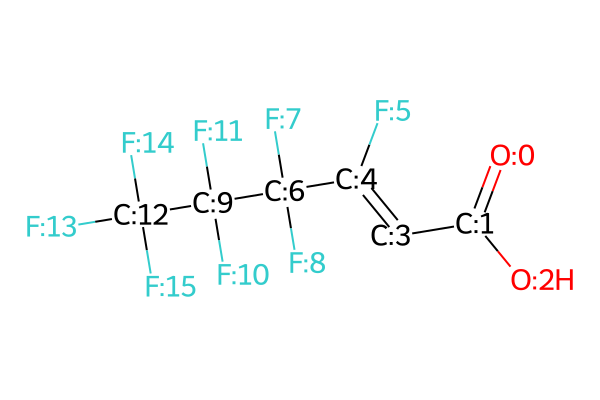

-------PFAS code: COOH_17, atom index: [5]-------


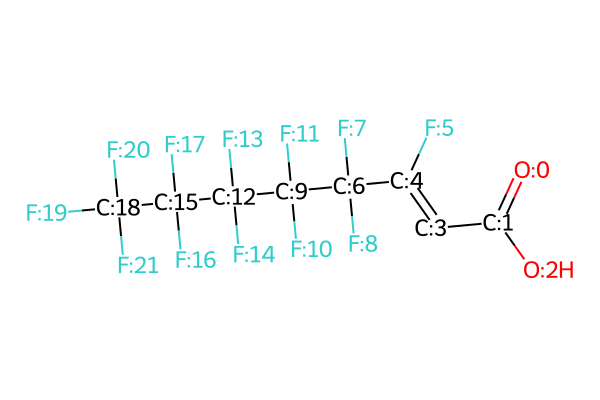

-------PFAS code: COOH_18, atom index: [5]-------


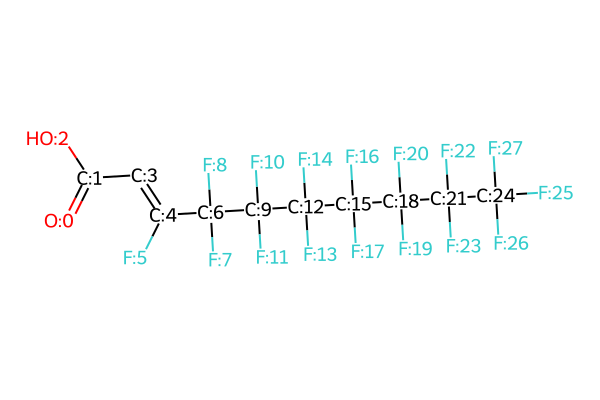

-------PFAS code: COOH_19, atom index: [5]-------


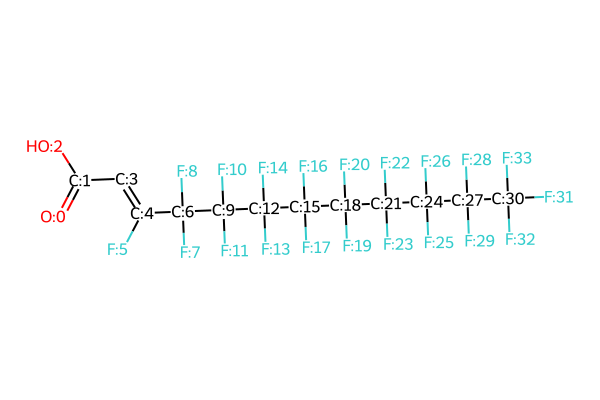

-------PFAS code: From_Review_113, atom index: [2]-------


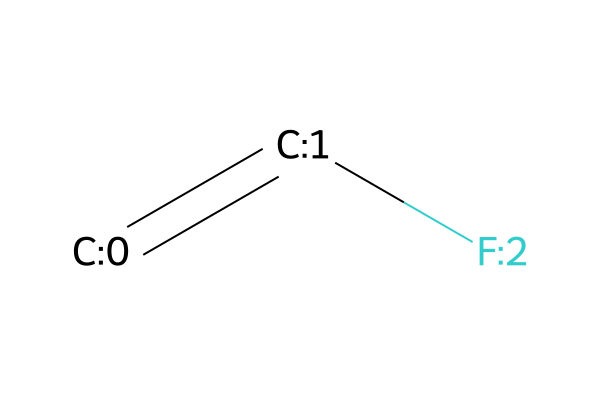

-------PFAS code: From_Review_114, atom index: [3]-------


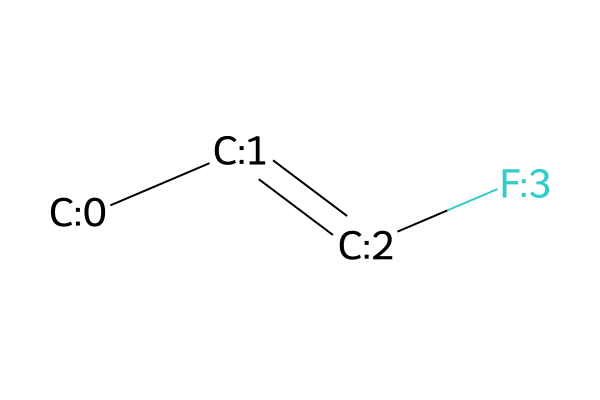

-------PFAS code: From_Review_115, atom index: [6]-------


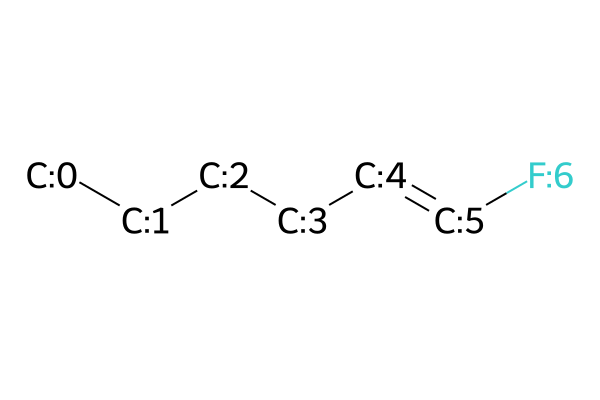

-------PFAS code: From_Review_116, atom index: [3]-------


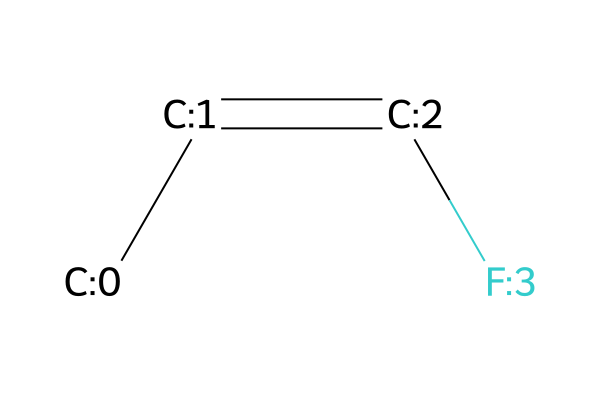

-------PFAS code: From_Review_117, atom index: [6]-------


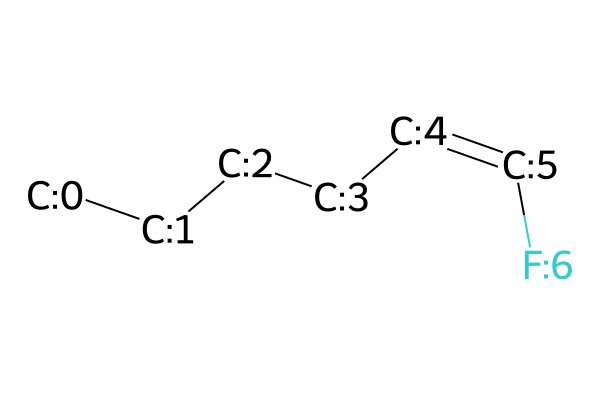

-------PFAS code: From_Review_118, atom index: [14]-------


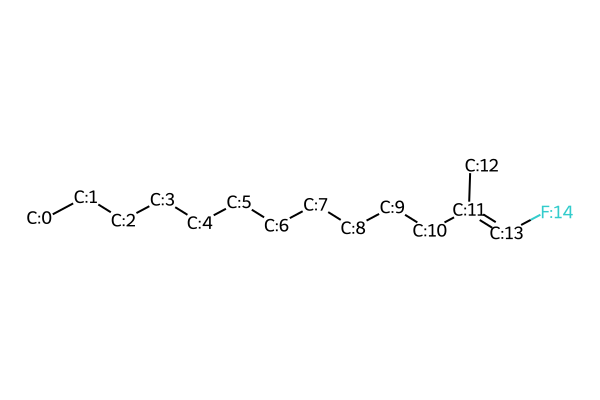

-------PFAS code: From_Review_119, atom index: [3]-------


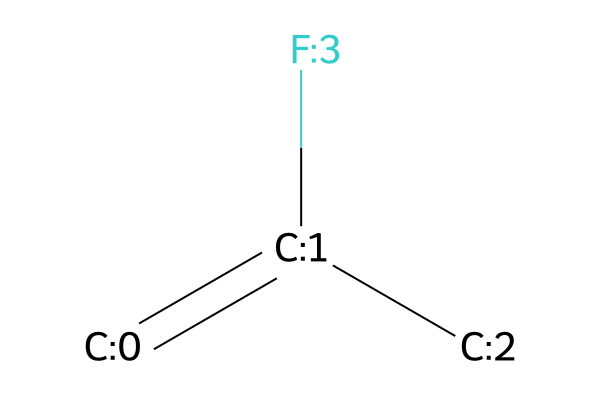

-------PFAS code: From_Review_120, atom index: [8]-------


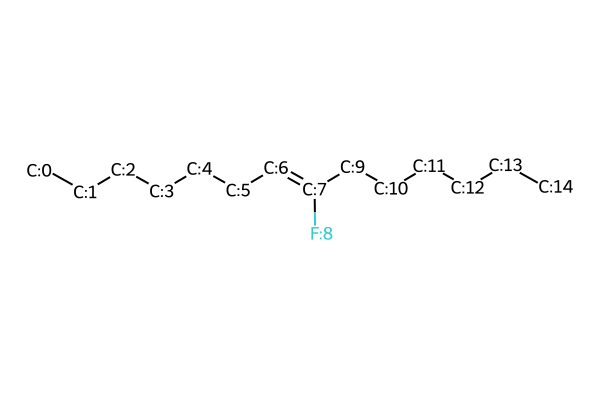

-------PFAS code: From_Review_121, atom index: [8]-------


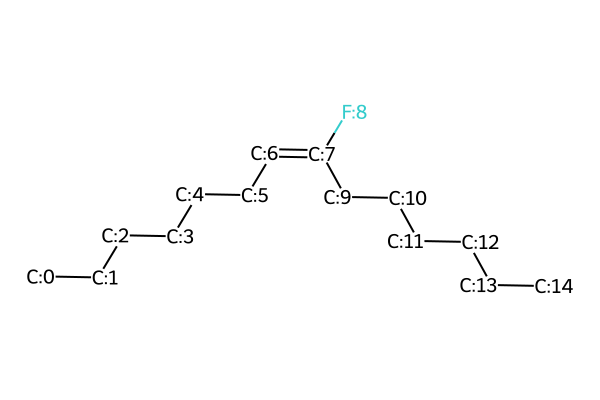

-------PFAS code: From_Review_122, atom index: [0]-------


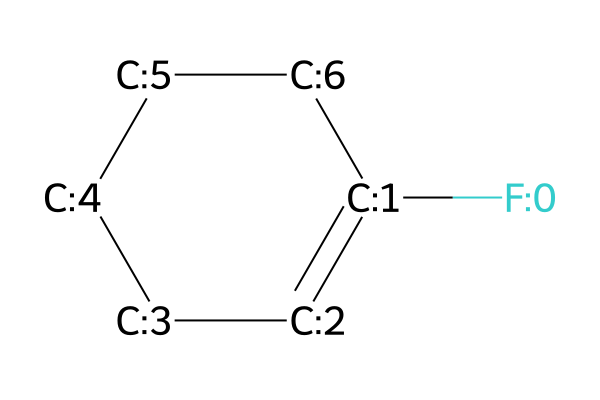

-------PFAS code: From_Review_123, atom index: [0]-------


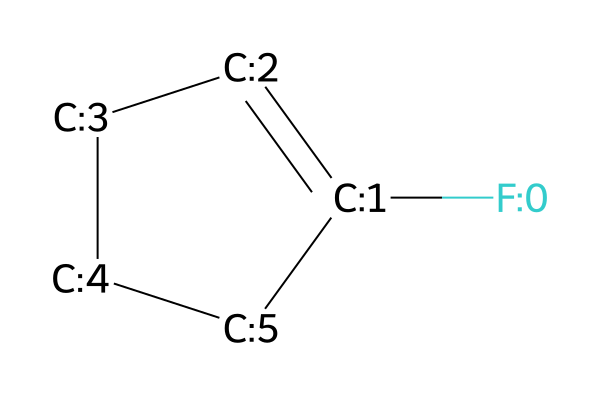

-------PFAS code: From_Review_124, atom index: [0]-------


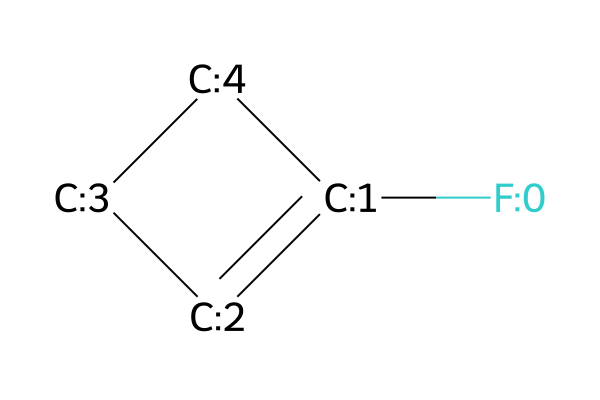

-------PFAS code: From_Review_125, atom index: [4]-------


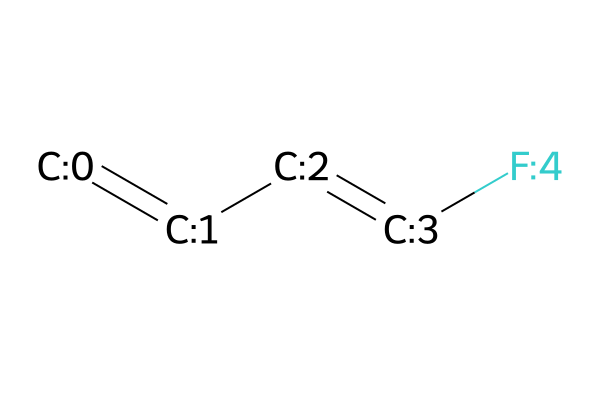

-------PFAS code: From_Review_126, atom index: [4]-------


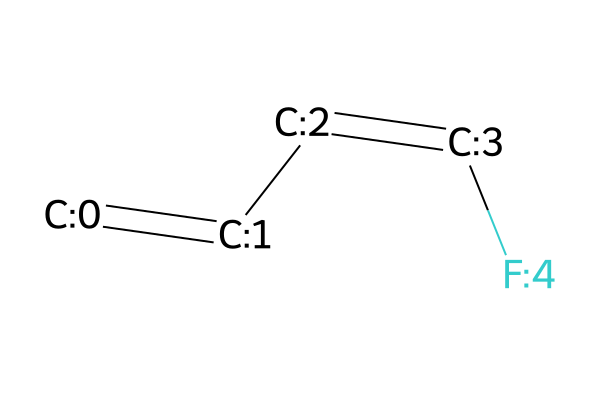

-------PFAS code: From_Review_127, atom index: [0]-------


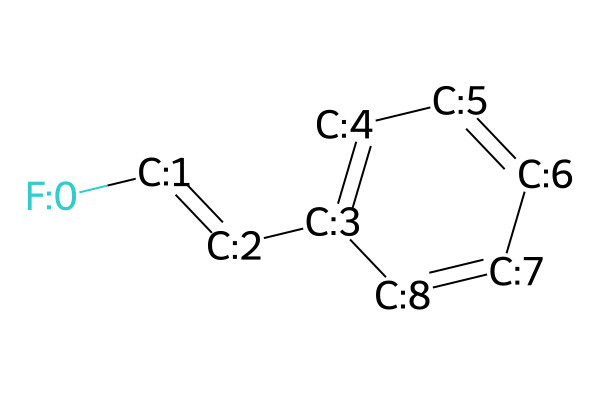

-------PFAS code: From_Review_128, atom index: [0]-------


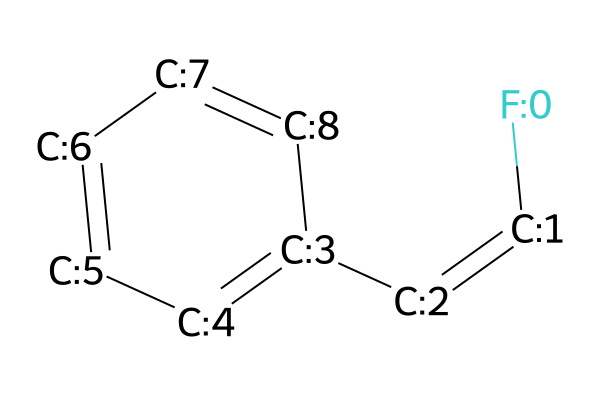

-------PFAS code: From_Review_129, atom index: [8]-------


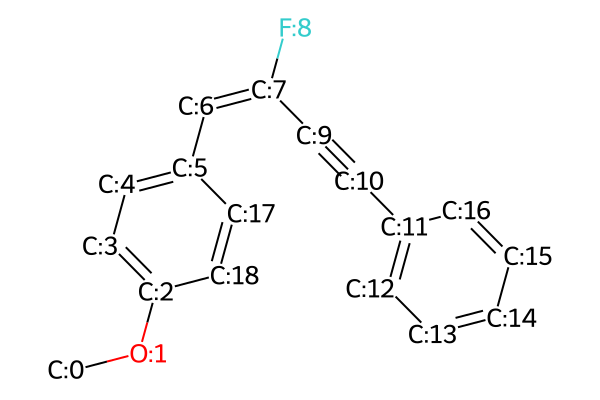

-------PFAS code: From_Review_130, atom index: [8]-------


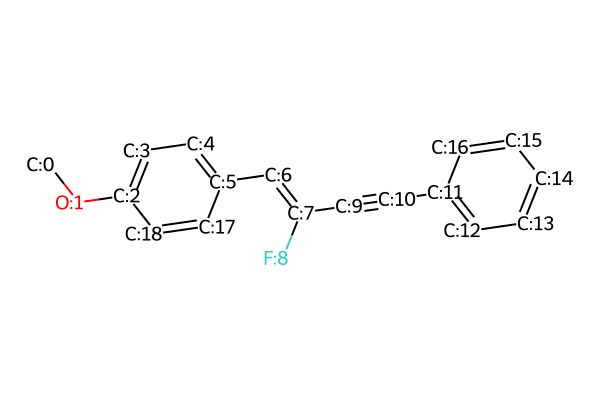

-------PFAS code: From_Review_131, atom index: [4]-------


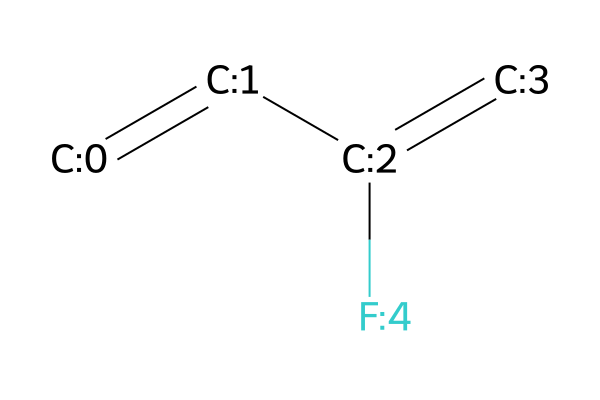

-------PFAS code: From_Review_132, atom index: [2]-------


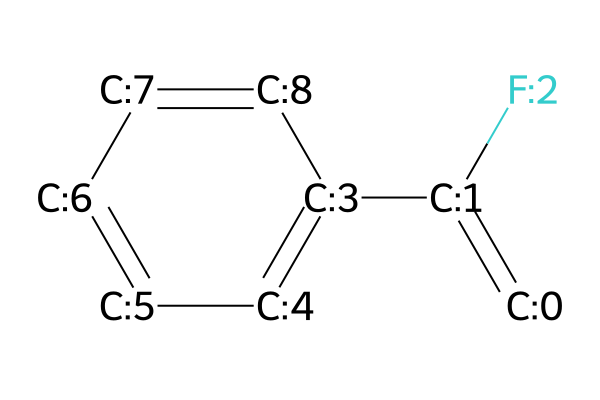

-------PFAS code: From_Review_133, atom index: [0]-------


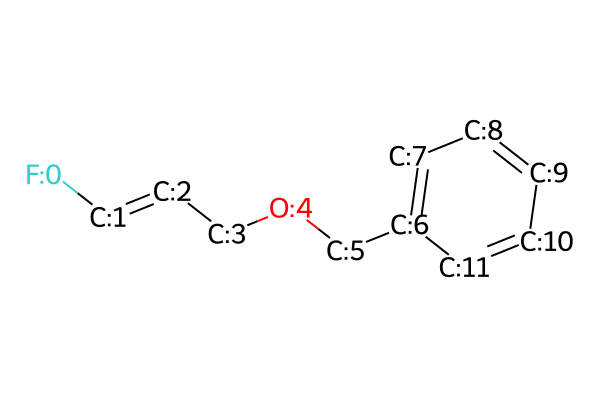

-------PFAS code: From_Review_134, atom index: [0]-------


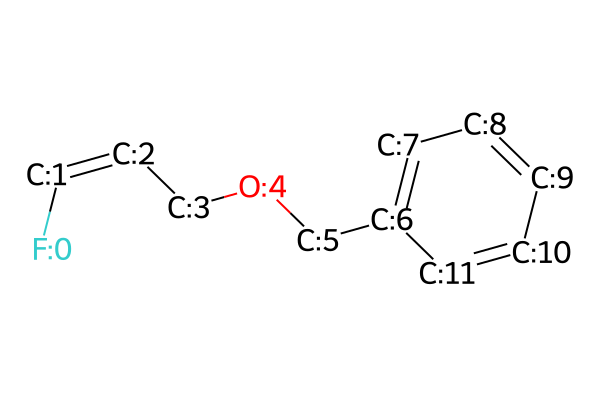

-------PFAS code: From_Review_135, atom index: [7]-------


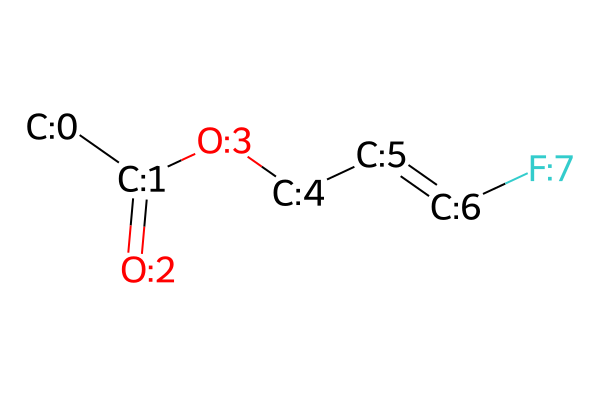

-------PFAS code: From_Review_136, atom index: [7]-------


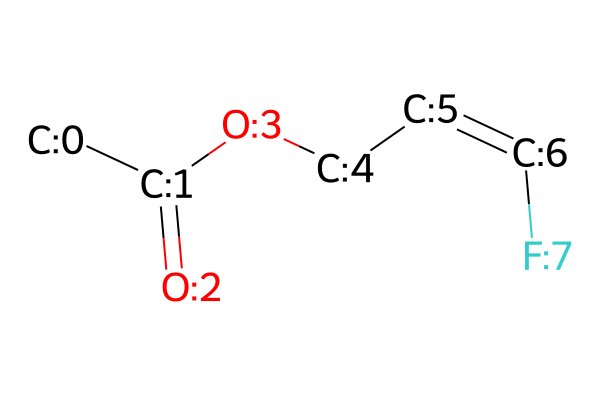

-------PFAS code: From_Review_137, atom index: [5]-------


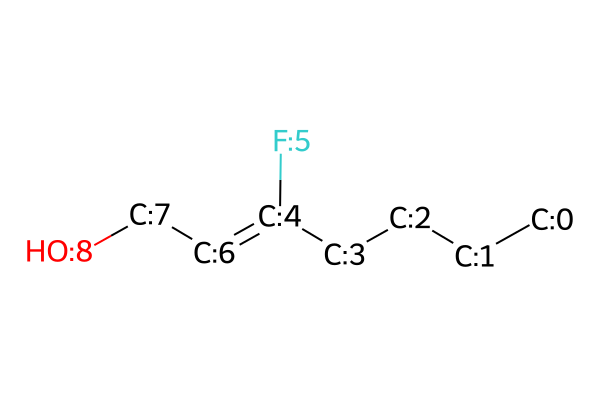

-------PFAS code: From_Review_138, atom index: [4]-------


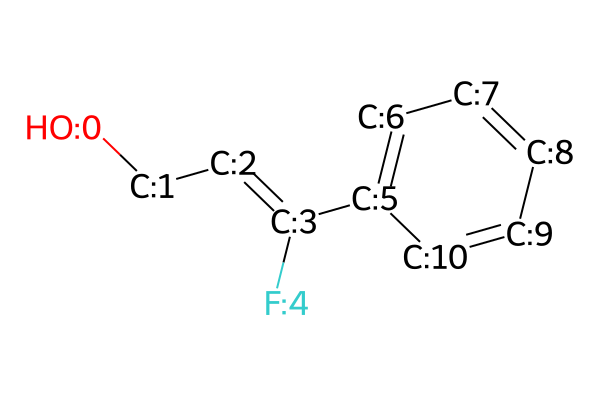

-------PFAS code: From_Review_139, atom index: [4]-------


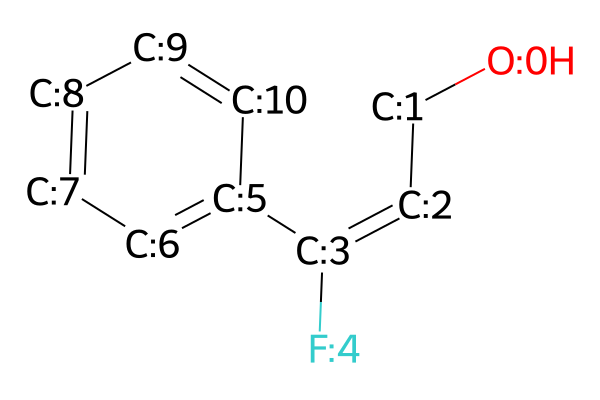

-------PFAS code: From_Review_140, atom index: [2]-------


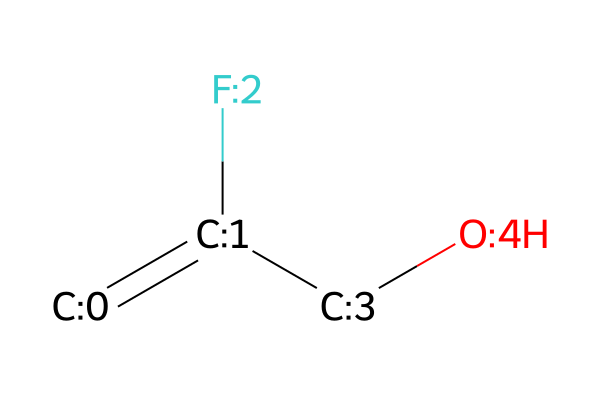

-------PFAS code: From_Review_141, atom index: [3]-------


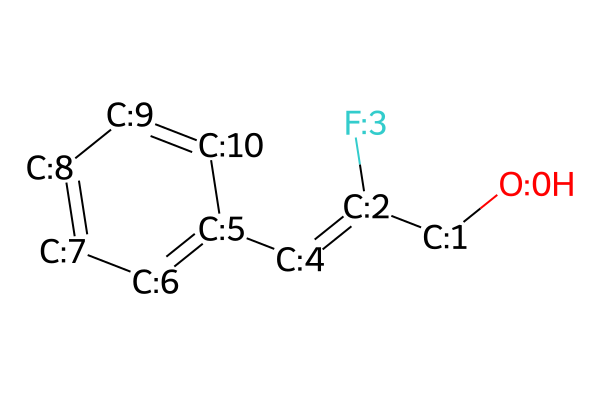

-------PFAS code: From_Review_142, atom index: [3]-------


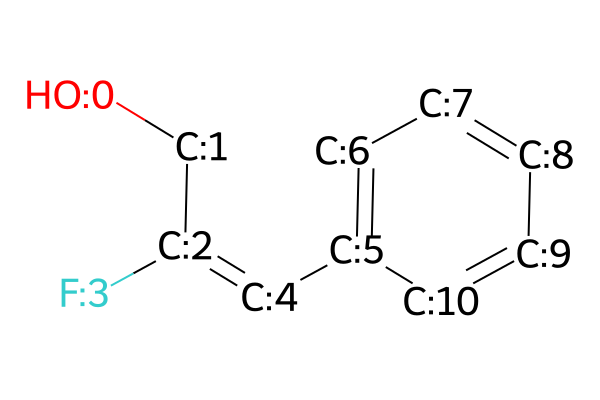

-------PFAS code: From_Review_143, atom index: [0]-------


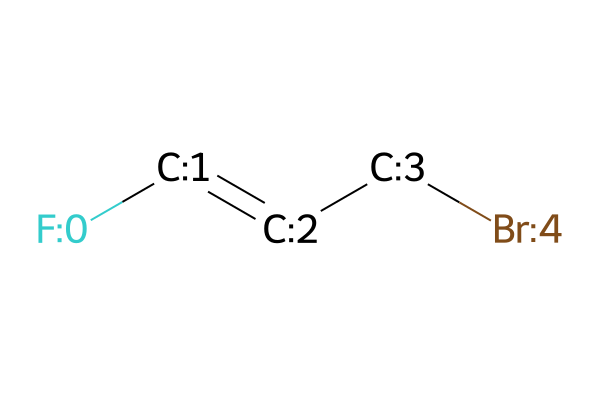

-------PFAS code: From_Review_144, atom index: [0]-------


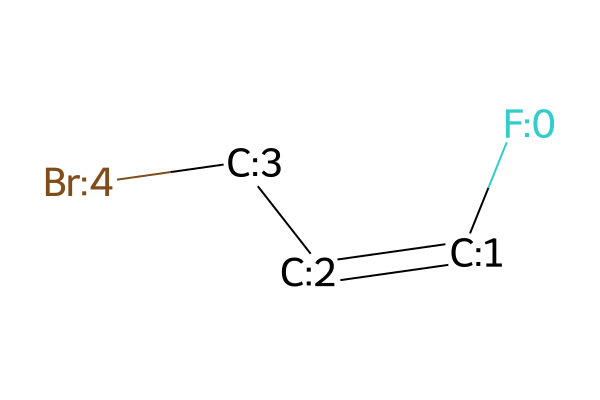

-------PFAS code: From_Review_145, atom index: [2]-------


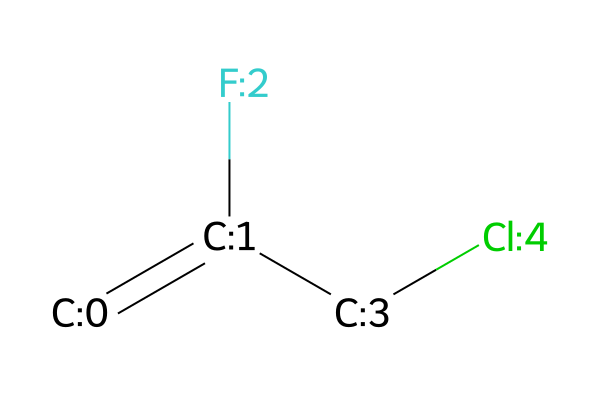

-------PFAS code: From_Review_146, atom index: [2]-------


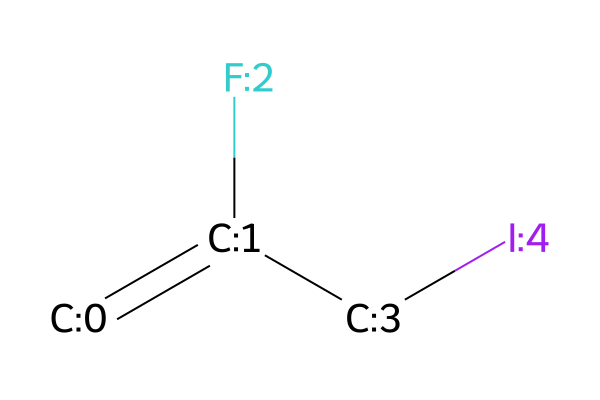

-------PFAS code: From_Review_147, atom index: [2]-------


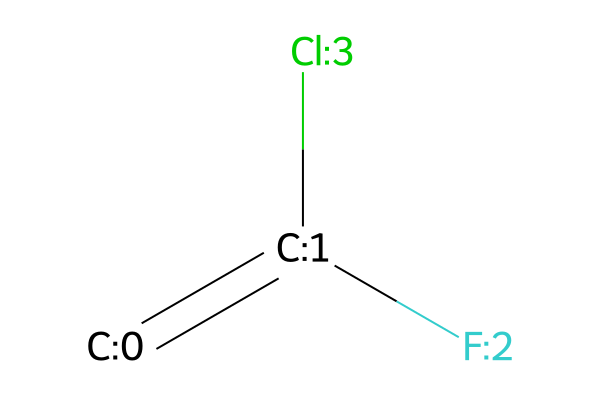

-------PFAS code: From_Review_148, atom index: [0]-------


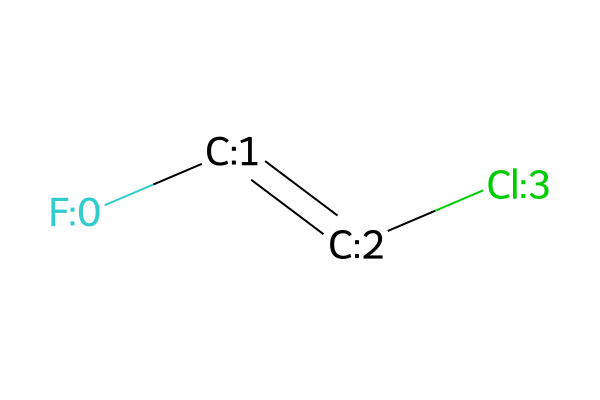

-------PFAS code: From_Review_149, atom index: [0]-------


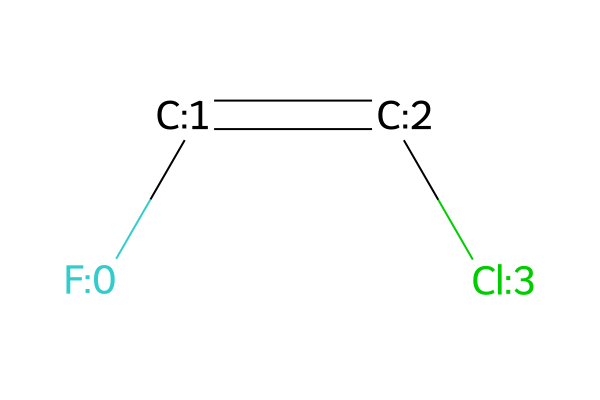

-------PFAS code: From_Review_150, atom index: [0]-------


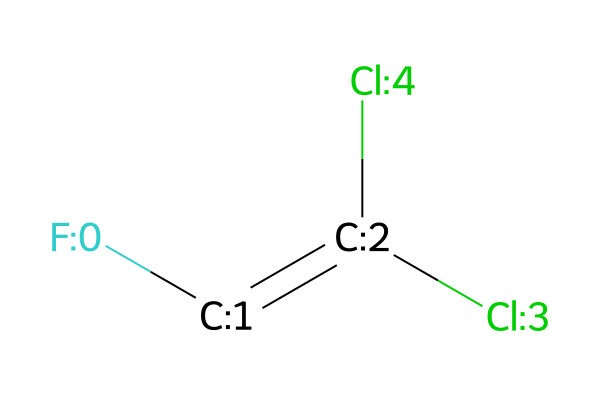

-------PFAS code: From_Review_151, atom index: [0]-------


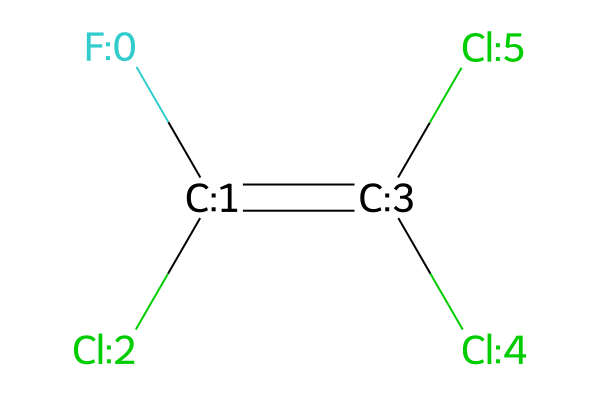

-------PFAS code: From_Review_152, atom index: [0, 3]-------


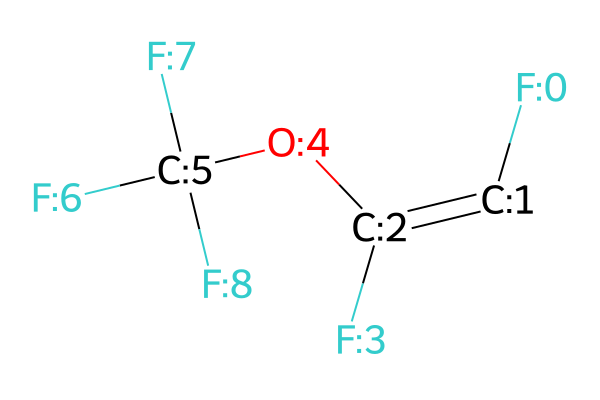

-------PFAS code: From_Review_153, atom index: [0, 3]-------


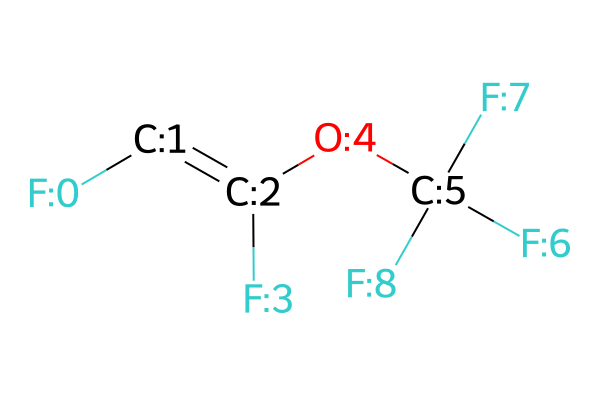

-------PFAS code: From_Review_154, atom index: [3]-------


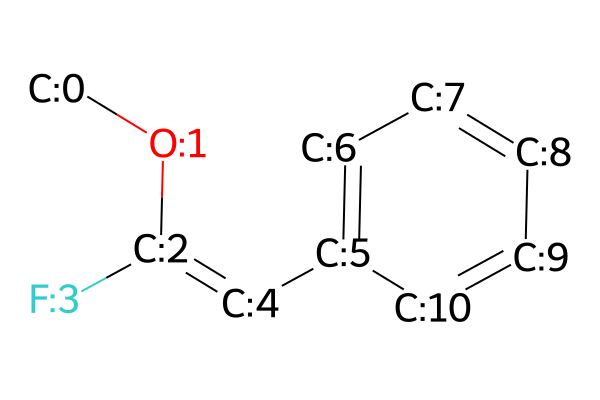

-------PFAS code: From_Review_155, atom index: [5, 7]-------


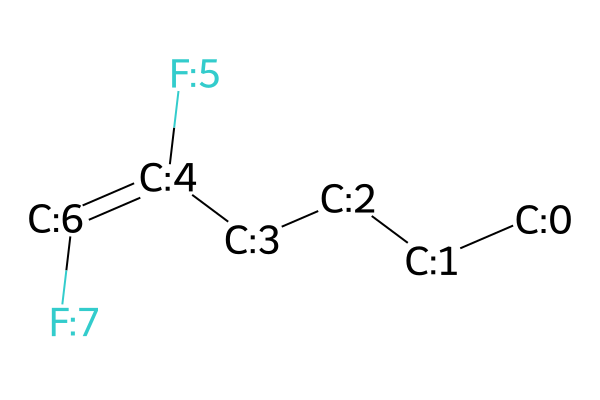

-------PFAS code: From_Review_156, atom index: [0, 3]-------


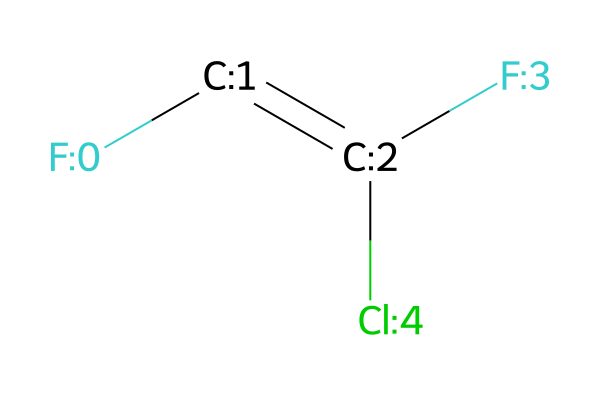

-------PFAS code: From_Review_157, atom index: [0, 3]-------


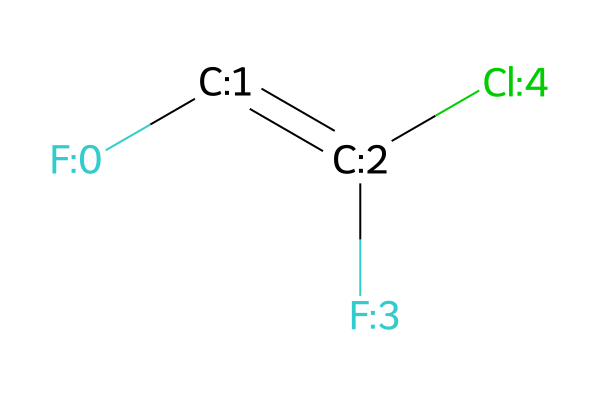

-------PFAS code: From_Review_158, atom index: [0, 4]-------


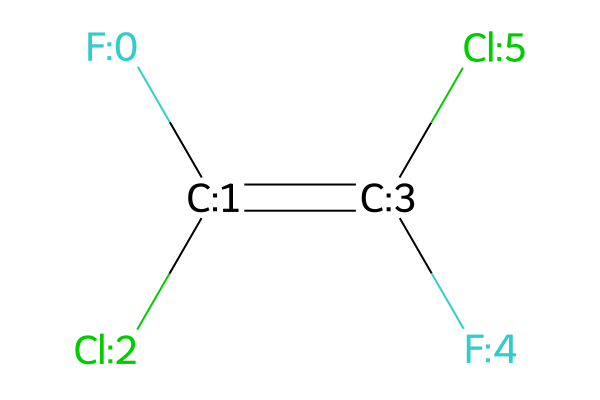

-------PFAS code: From_Review_159, atom index: [0, 4]-------


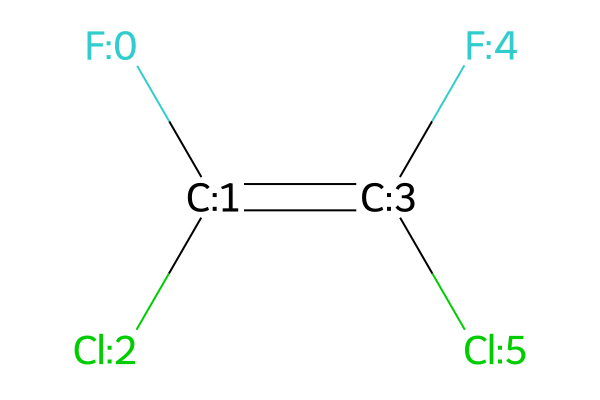

-------PFAS code: From_Review_160, atom index: [0, 3]-------


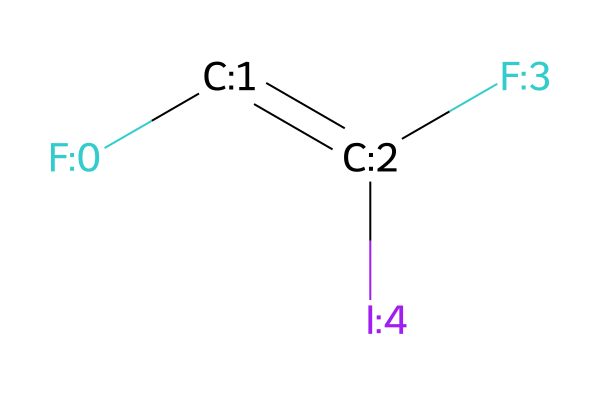

-------PFAS code: From_Review_161, atom index: [0, 3]-------


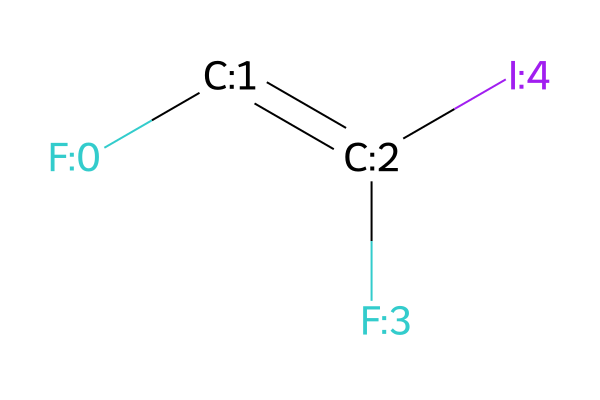

-------PFAS code: From_Review_162, atom index: [0, 3]-------


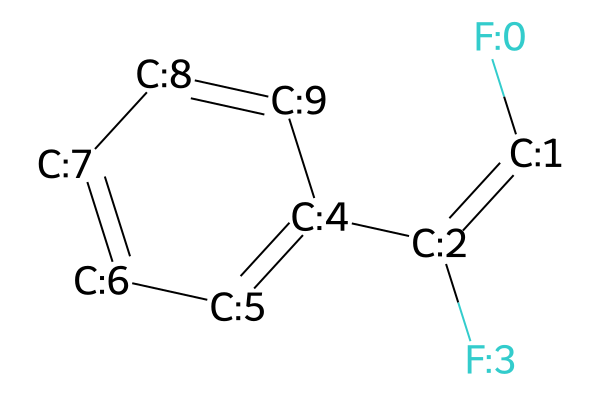

-------PFAS code: From_Review_163, atom index: [0, 3]-------


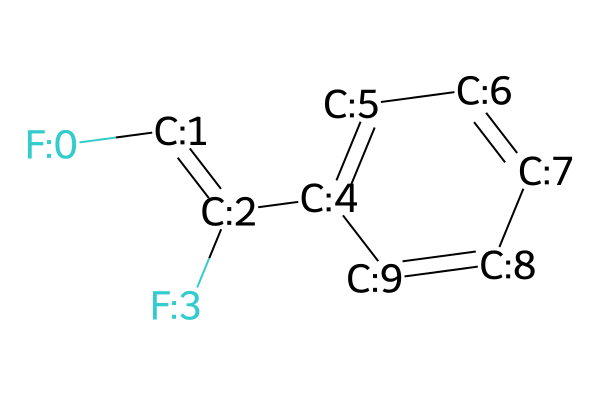

-------PFAS code: From_Review_164, atom index: [0, 4]-------


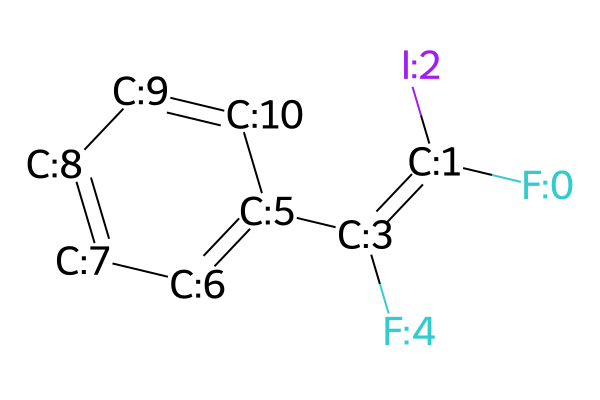

-------PFAS code: From_Review_165, atom index: [2, 4]-------


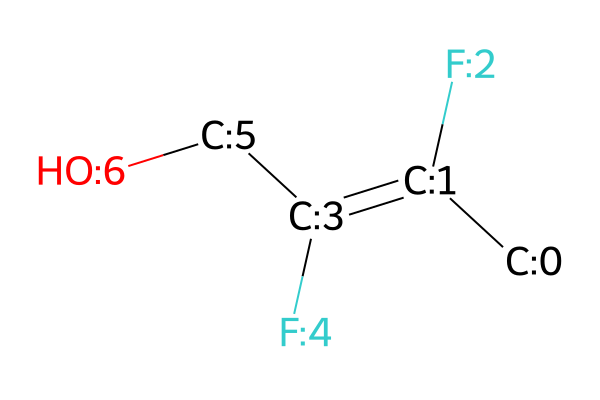

-------PFAS code: From_Review_166, atom index: [2, 4]-------


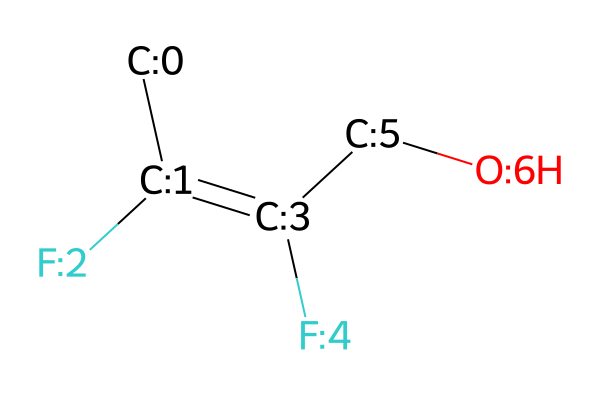

-------PFAS code: From_Review_167, atom index: [3, 5]-------


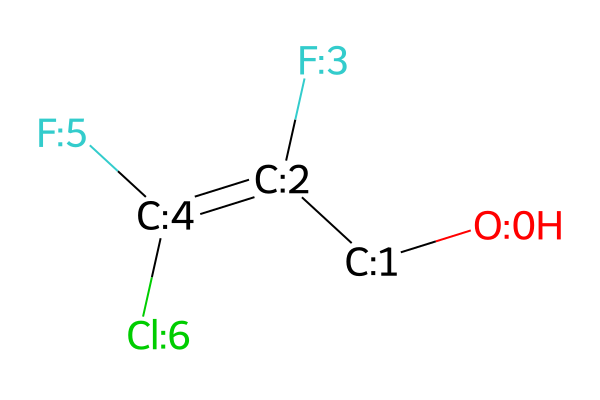

-------PFAS code: From_Review_168, atom index: [3, 5]-------


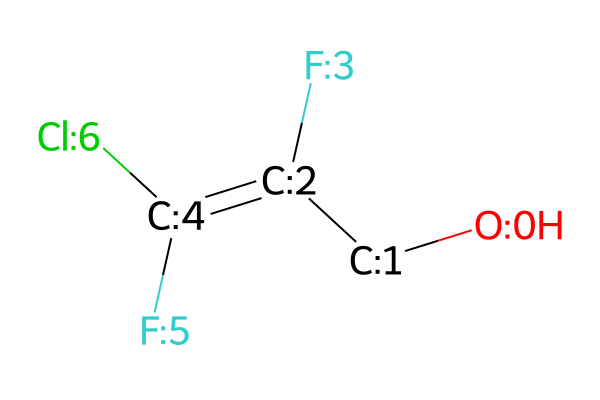

-------PFAS code: From_Review_169, atom index: [13]-------


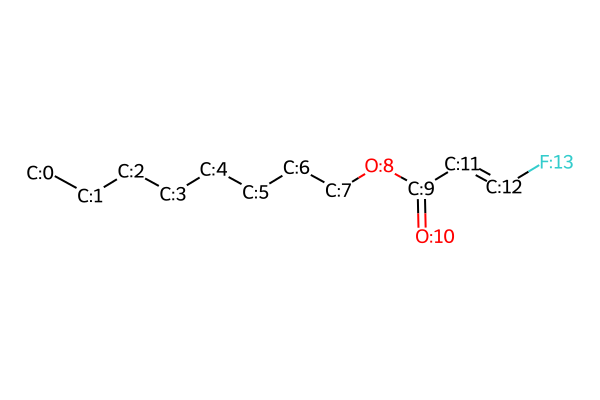

-------PFAS code: From_Review_170, atom index: [8]-------


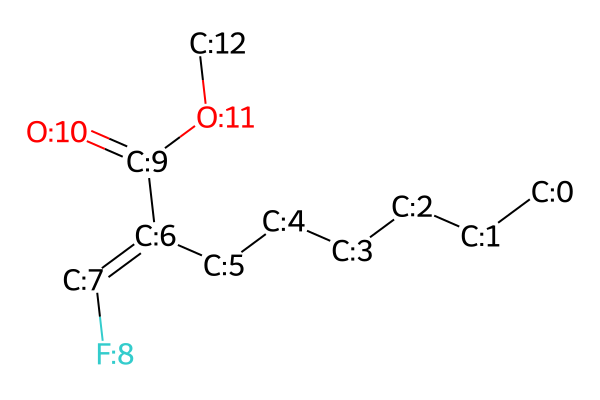

-------PFAS code: From_Review_171, atom index: [5]-------


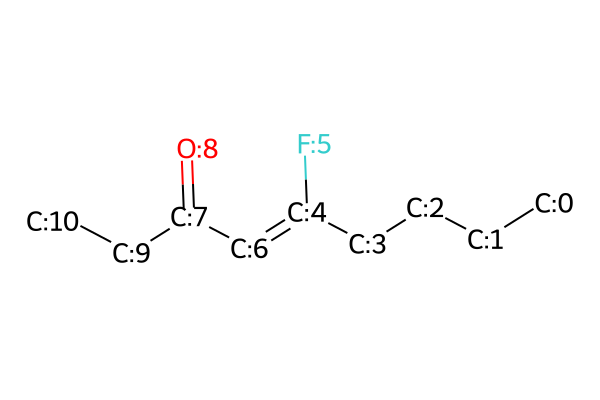

-------PFAS code: From_Review_172, atom index: [5]-------


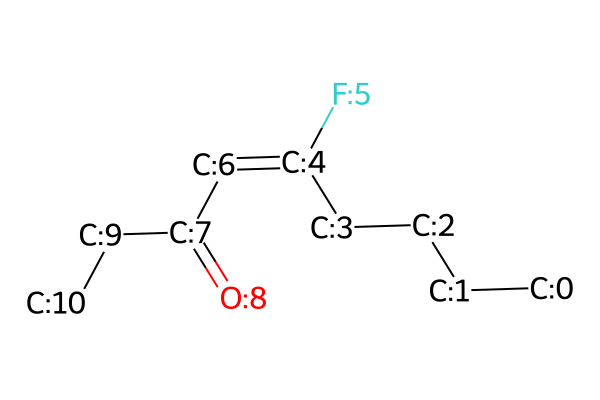

-------PFAS code: From_Review_173, atom index: [3]-------


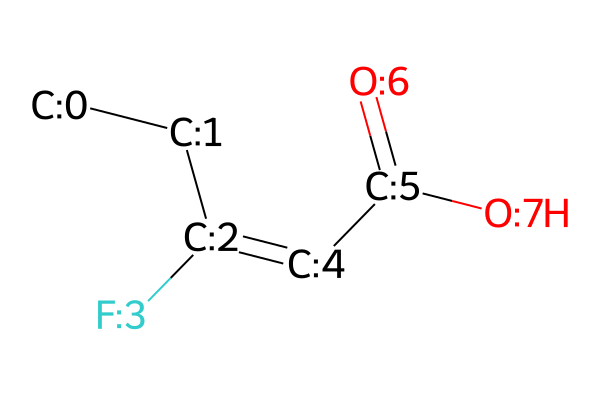

-------PFAS code: From_Review_174, atom index: [5]-------


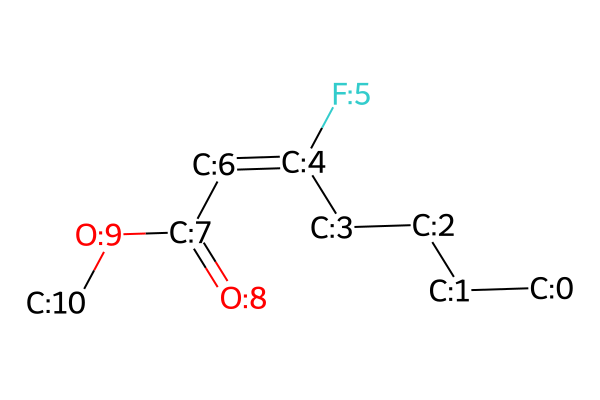

-------PFAS code: From_Review_175, atom index: [5]-------


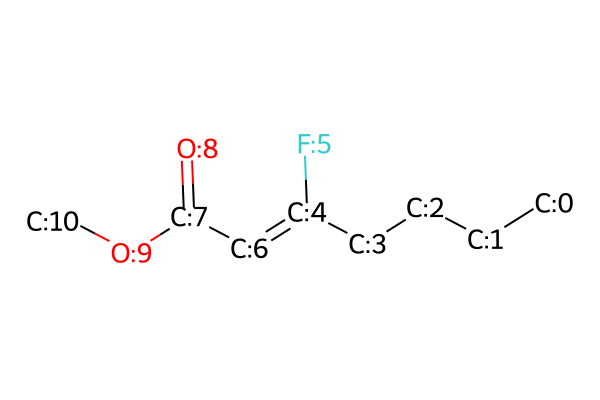

-------PFAS code: From_Review_176, atom index: [6]-------


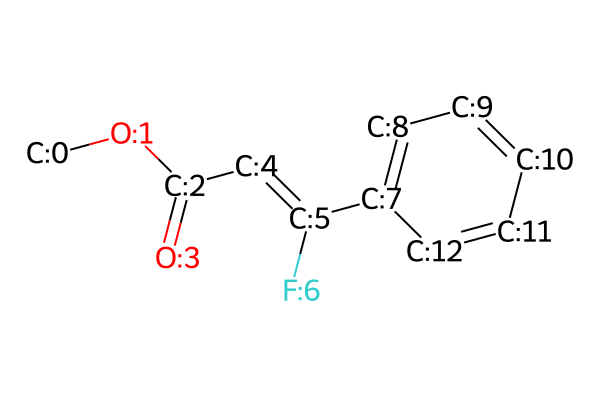

-------PFAS code: From_Review_177, atom index: [2]-------


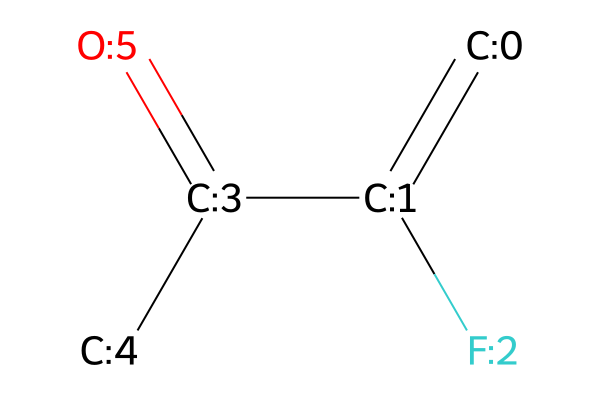

-------PFAS code: From_Review_178, atom index: [2]-------


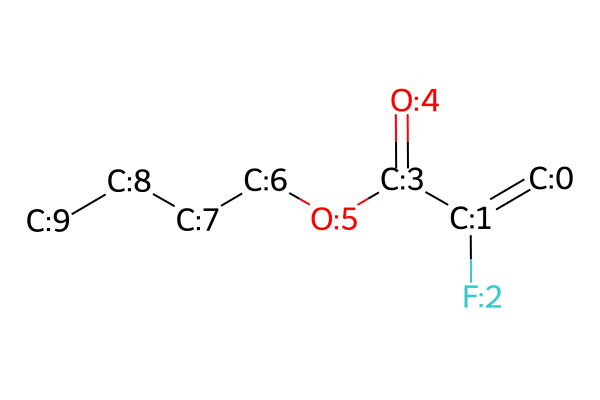

-------PFAS code: From_Review_179, atom index: [6]-------


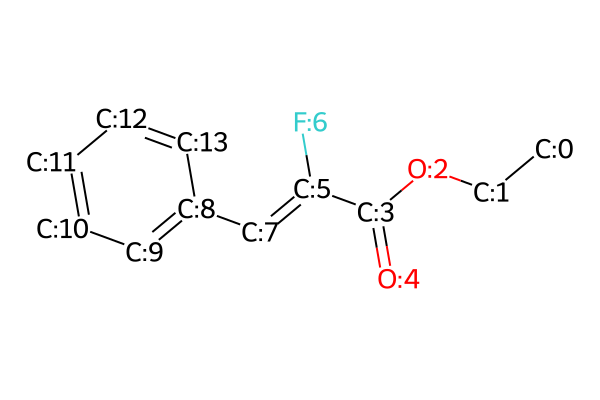

-------PFAS code: From_Review_180, atom index: [6]-------


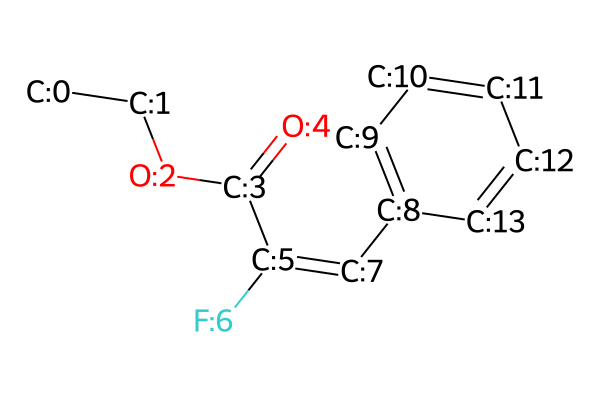

-------PFAS code: From_Review_181, atom index: [9]-------


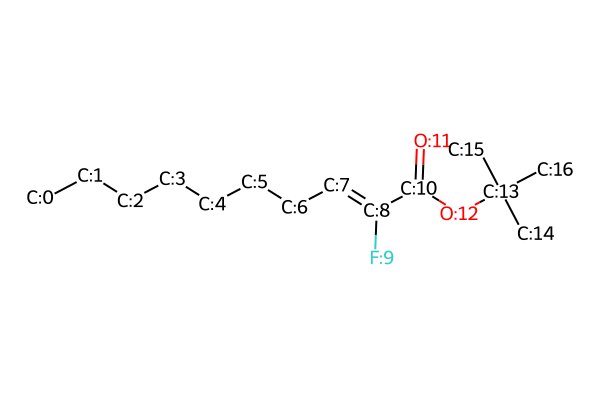

-------PFAS code: From_Review_182, atom index: [9]-------


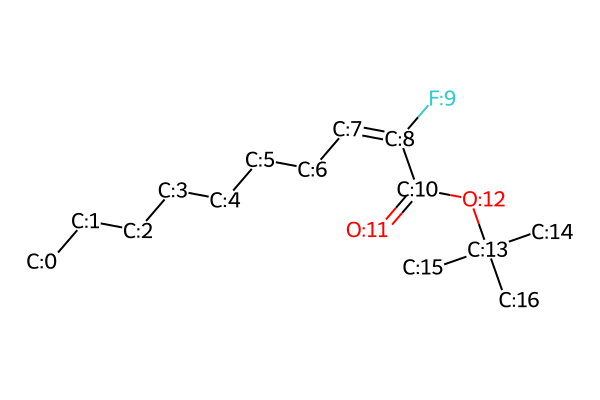

-------PFAS code: From_Review_195, atom index: [0]-------


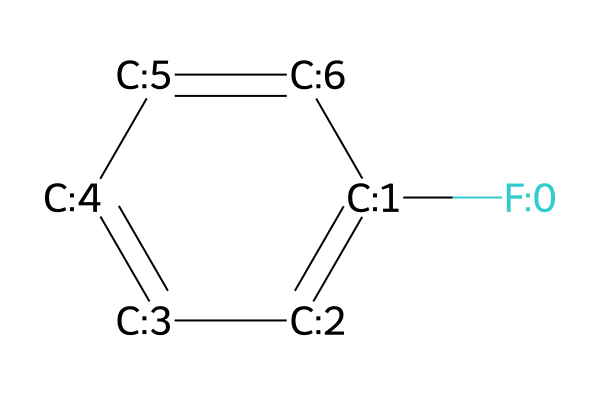

-------PFAS code: From_Review_196, atom index: [0, 7]-------


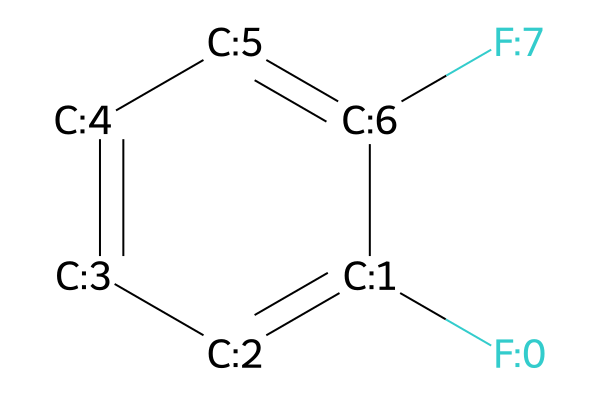

-------PFAS code: From_Review_197, atom index: [0, 6]-------


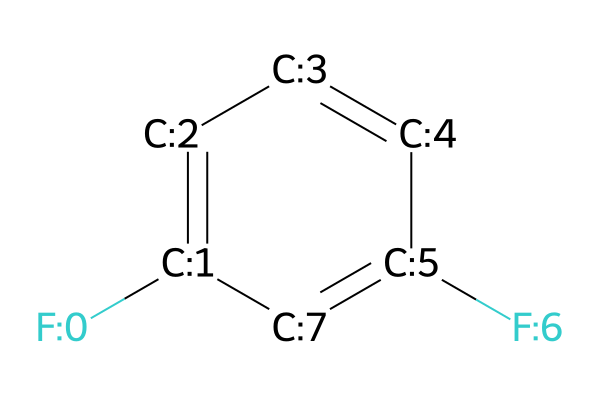

-------PFAS code: From_Review_198, atom index: [0]-------


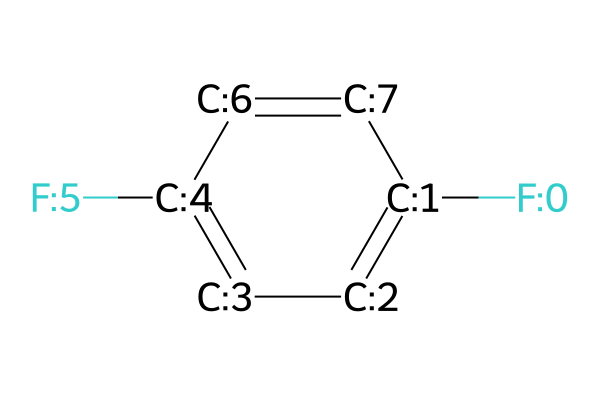

-------PFAS code: From_Review_199, atom index: [0, 4, 7]-------


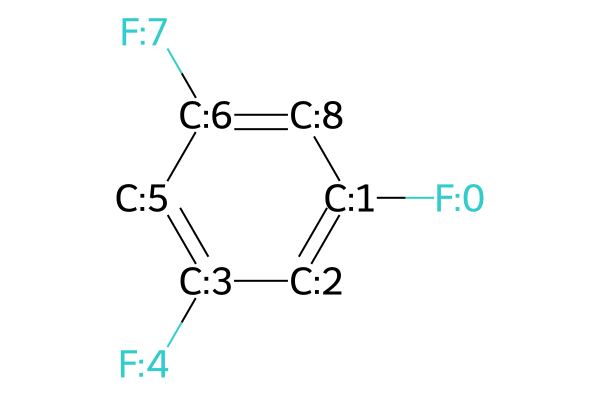

-------PFAS code: From_Review_200, atom index: [0, 3, 5, 7]-------


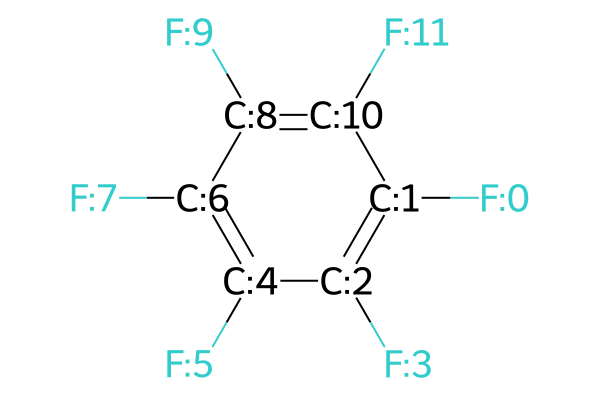

-------PFAS code: From_Review_21, atom index: [0]-------


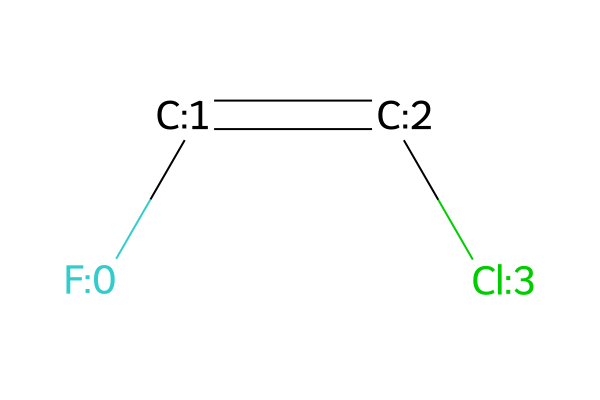

-------PFAS code: From_Review_262, atom index: [0]-------


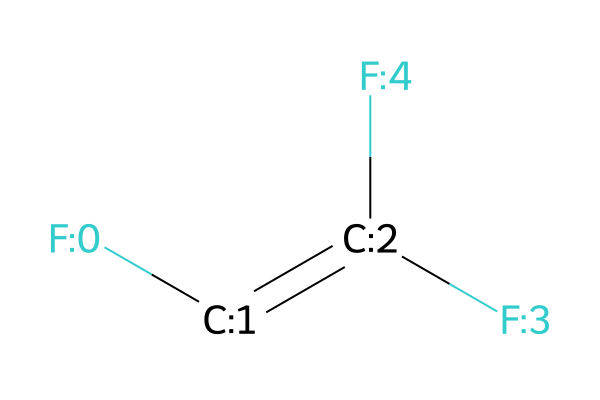

-------PFAS code: From_Review_264, atom index: [0]-------


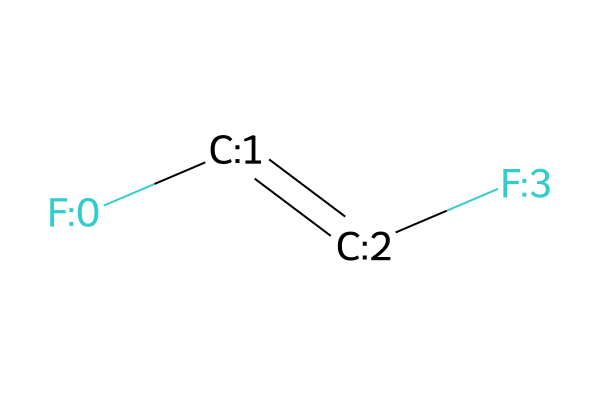

-------PFAS code: From_Review_265, atom index: [0]-------


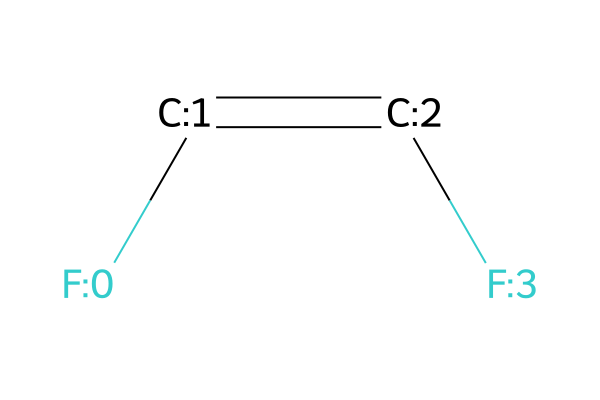

-------PFAS code: From_Review_266, atom index: [5]-------


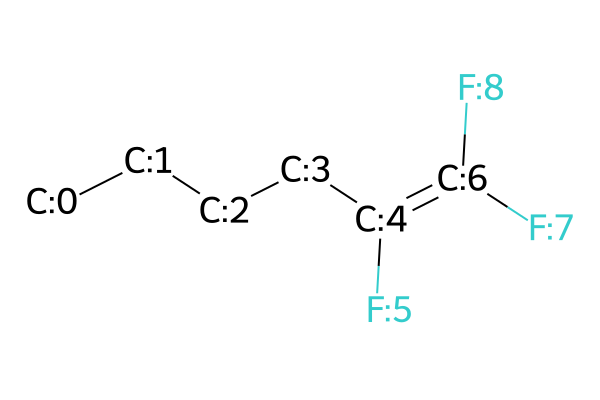

-------PFAS code: From_Review_438, atom index: [4]-------


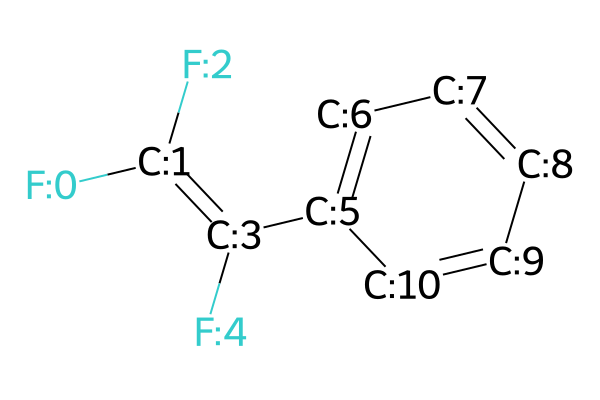

-------PFAS code: From_Review_439, atom index: [5]-------


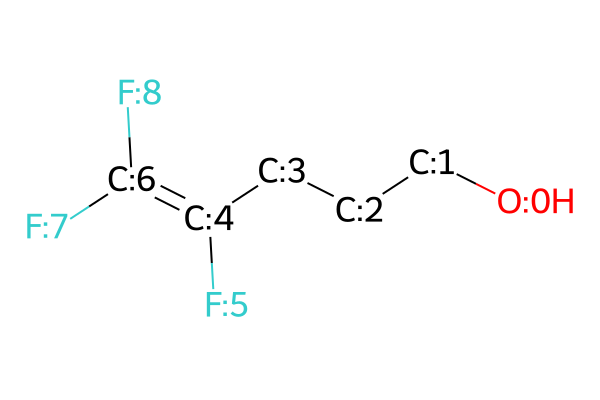

-------PFAS code: From_Review_440, atom index: [3]-------


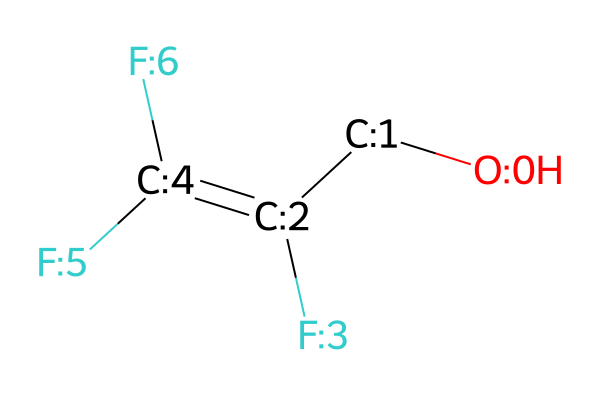

-------PFAS code: From_Review_441, atom index: [4]-------


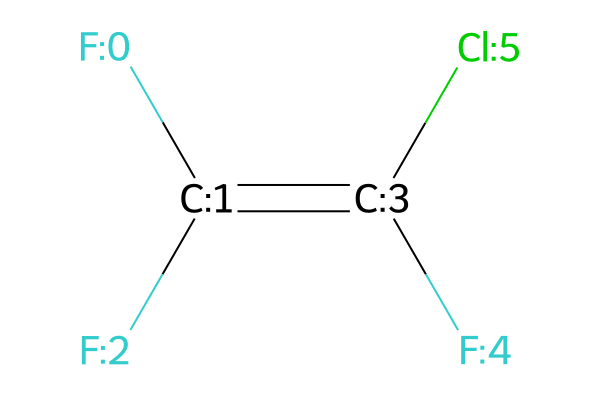

-------PFAS code: From_Review_442, atom index: [4]-------


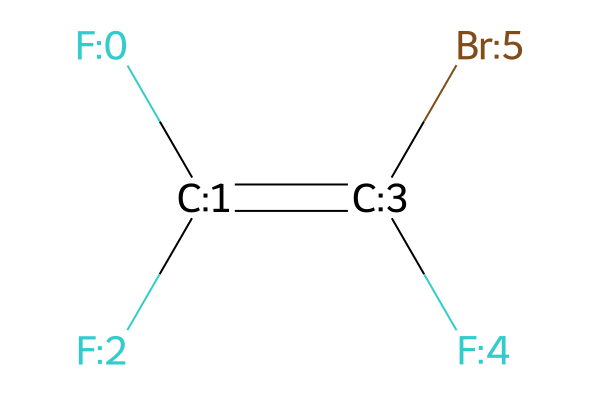

-------PFAS code: From_Review_443, atom index: [4]-------


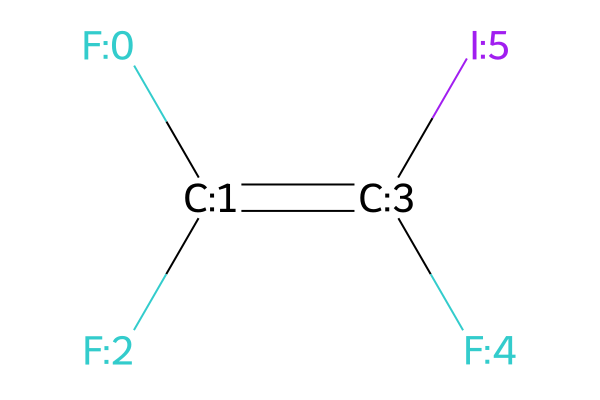

-------PFAS code: From_Review_444, atom index: [3]-------


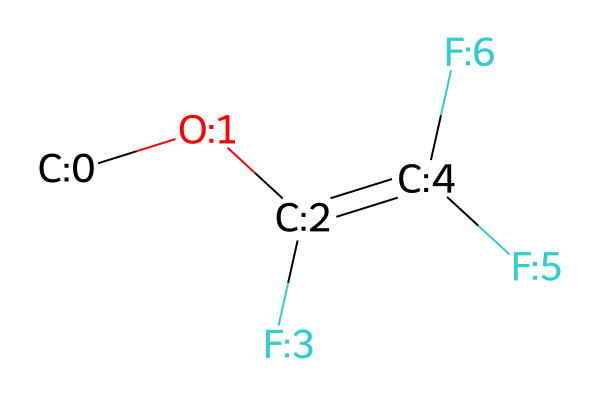

-------PFAS code: From_Review_445, atom index: [4]-------


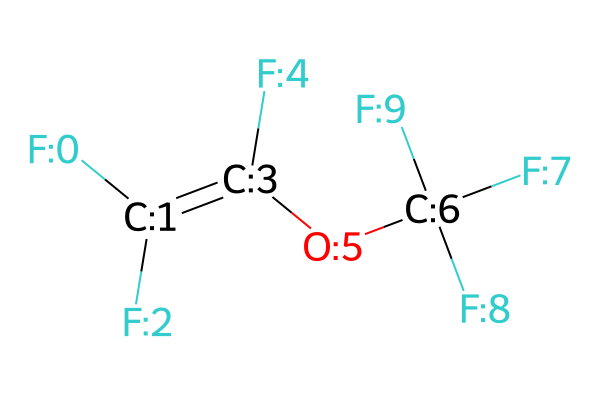

-------PFAS code: From_Review_446, atom index: [4]-------


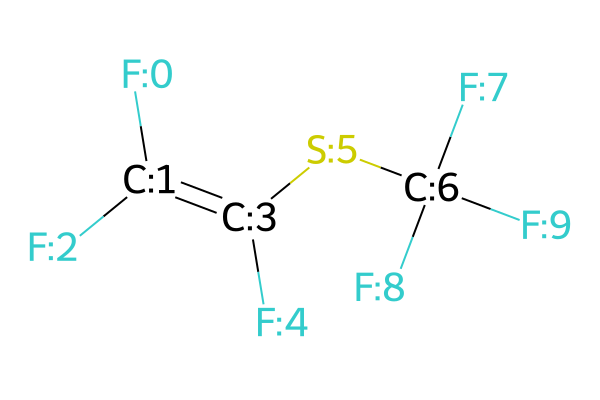

-------PFAS code: From_Review_447, atom index: [4]-------


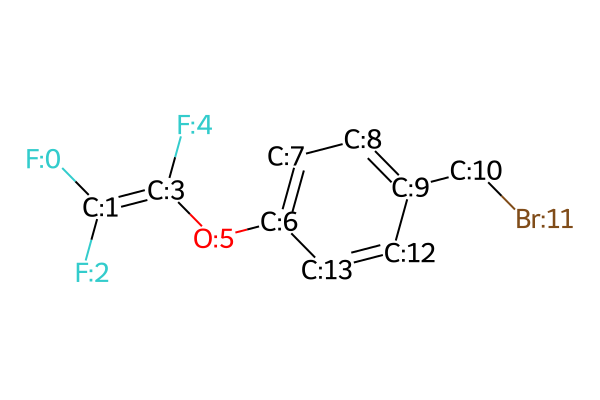

-------PFAS code: From_Review_448, atom index: [4]-------


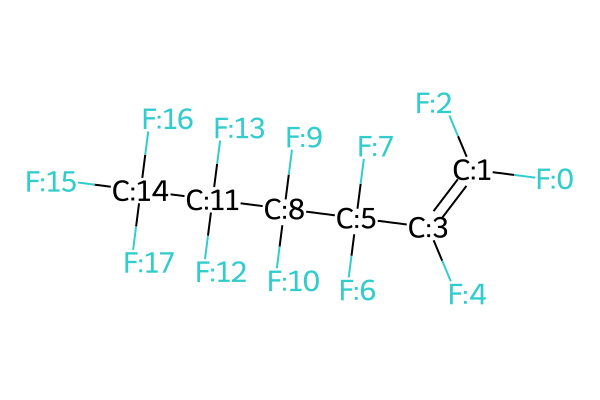

-------PFAS code: From_Review_449, atom index: [4]-------


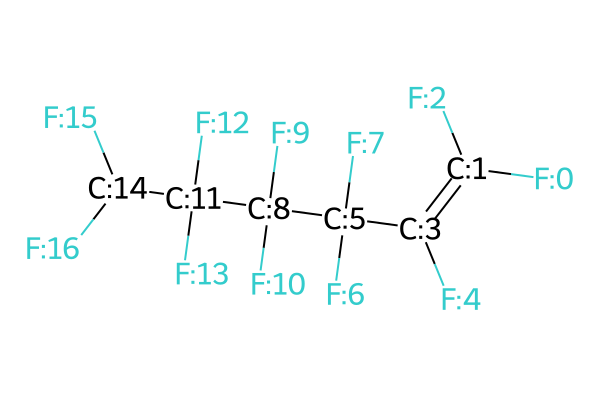

-------PFAS code: From_Review_450, atom index: [0, 3, 7, 9]-------


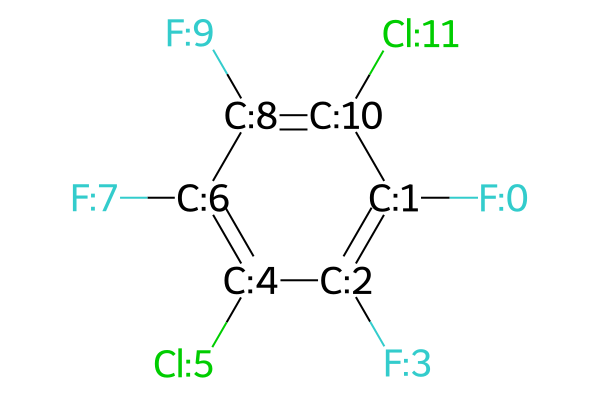

-------PFAS code: From_Review_451, atom index: [0, 4, 6, 10]-------


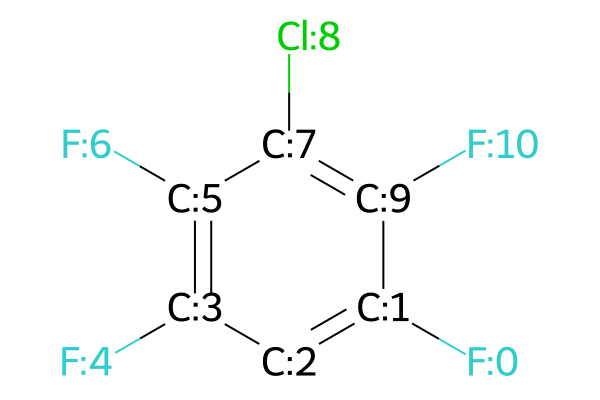

-------PFAS code: From_Review_452, atom index: [0, 4, 6, 10]-------


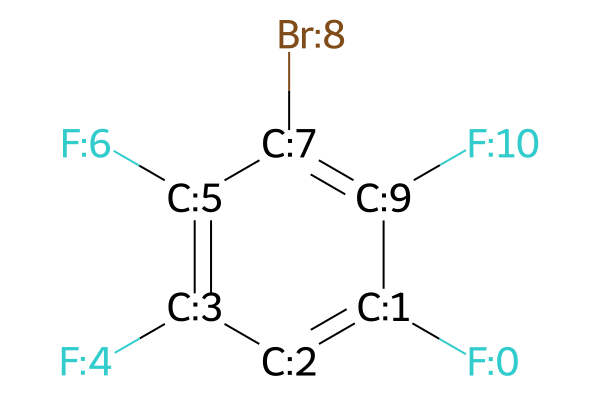

-------PFAS code: From_Review_453, atom index: [5, 7, 10, 12]-------


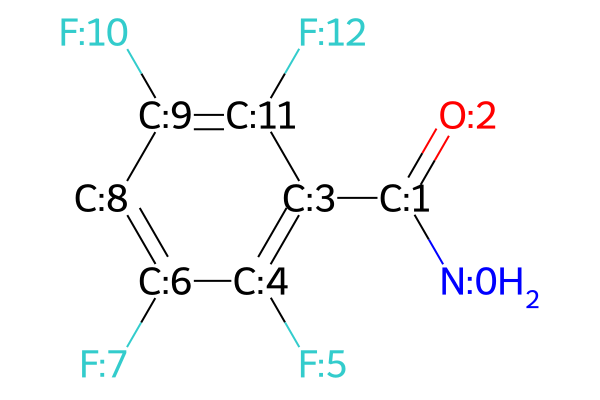

-------PFAS code: From_Review_454, atom index: [6, 8, 15, 17]-------


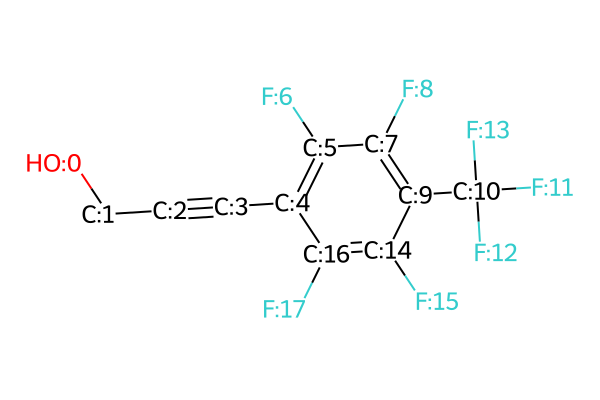

-------PFAS code: From_Review_455, atom index: [0, 3, 10, 12]-------


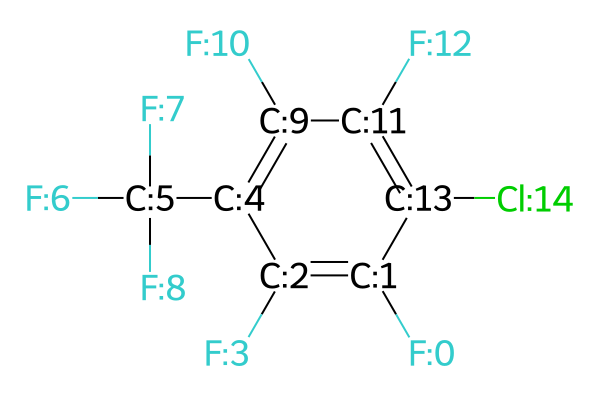

-------PFAS code: From_Review_456, atom index: [4, 6, 10, 12]-------


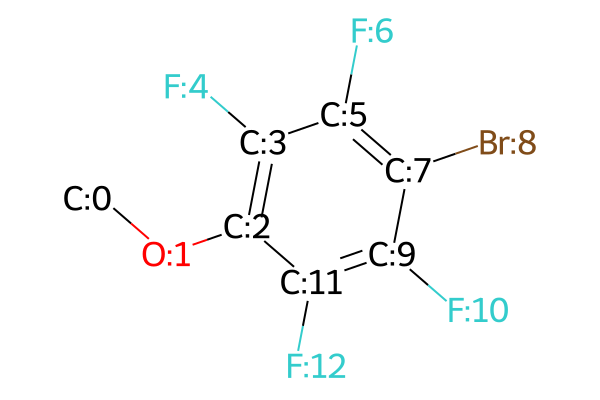

-------PFAS code: From_Review_457, atom index: [3, 5, 7, 9, 11]-------


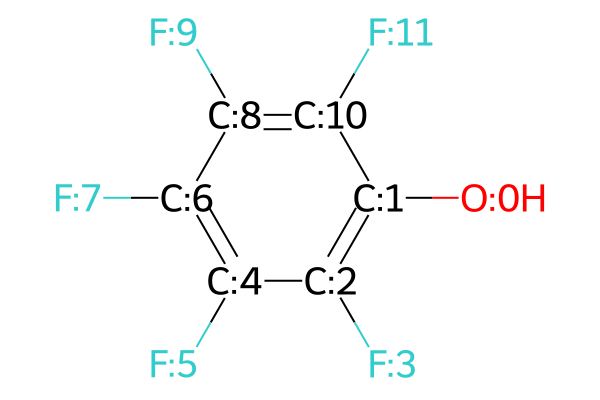

-------PFAS code: From_Review_458, atom index: [3, 5, 7, 9, 11]-------


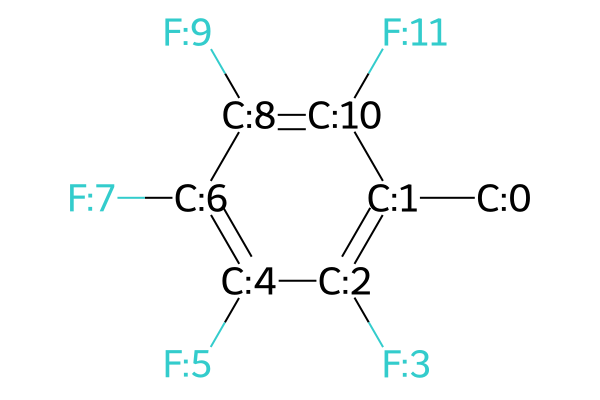

-------PFAS code: From_Review_459, atom index: [0, 4, 6, 8, 10]-------


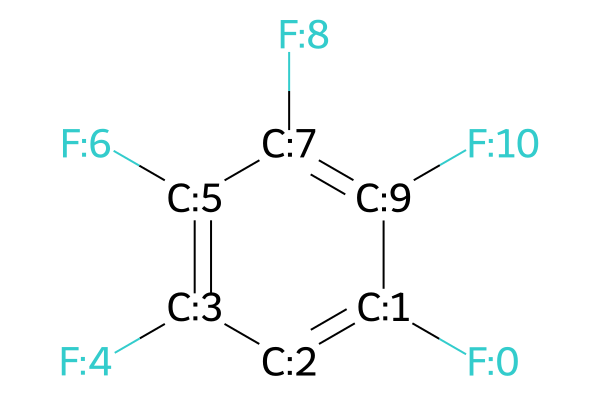

-------PFAS code: From_Review_460, atom index: [4, 6, 8, 10, 12]-------


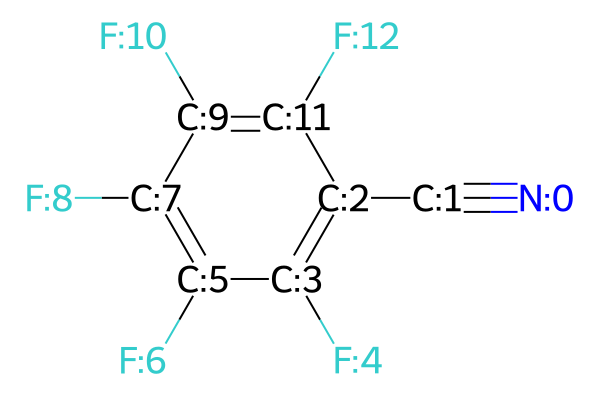

-------PFAS code: From_Review_461, atom index: [0, 7]-------


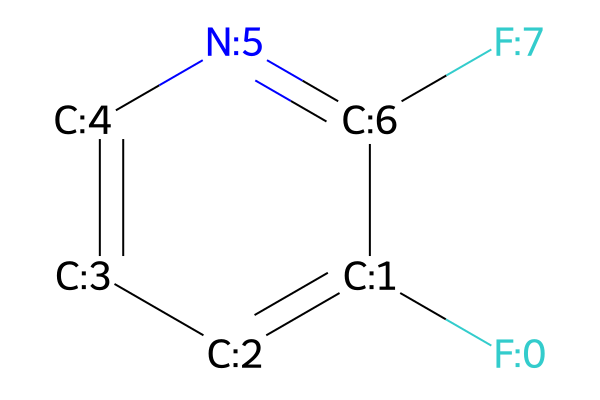

-------PFAS code: From_Review_462, atom index: [0, 6]-------


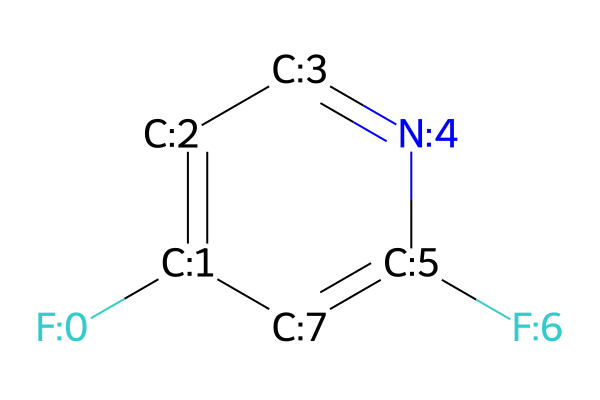

-------PFAS code: From_Review_463, atom index: [0, 5]-------


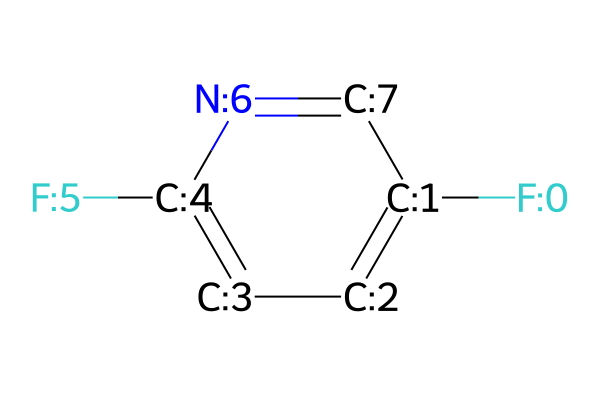

-------PFAS code: From_Review_464, atom index: [0, 6]-------


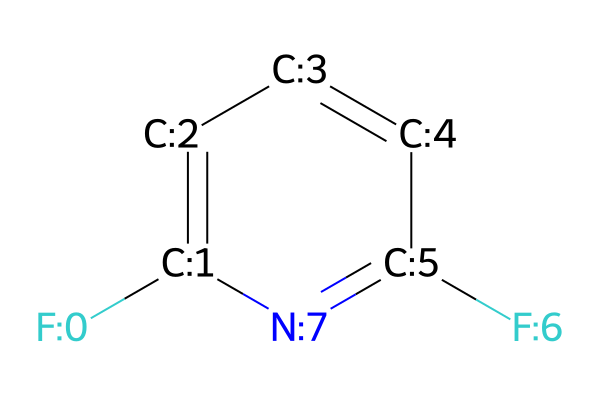

-------PFAS code: From_Review_465, atom index: [0, 4, 6, 8]-------


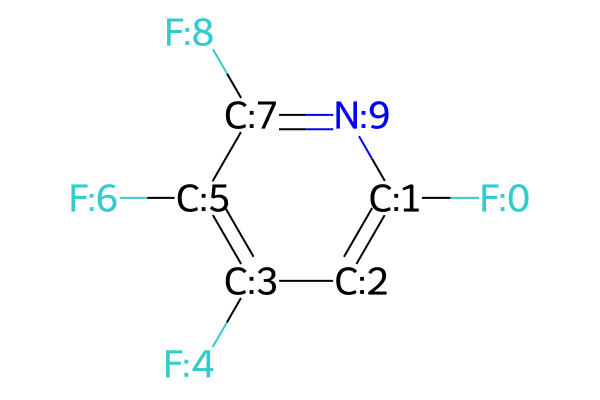

-------PFAS code: From_Review_466, atom index: [0, 6]-------


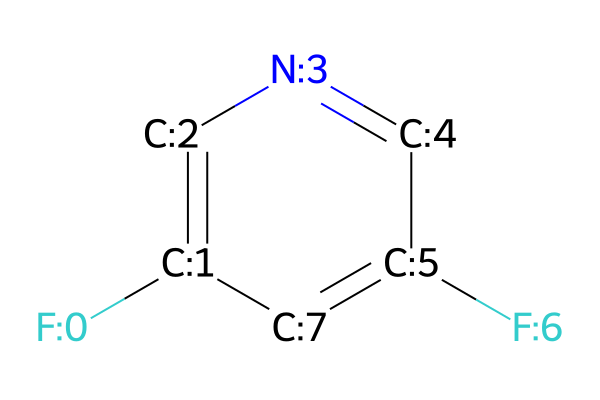

-------PFAS code: From_Review_467, atom index: [0, 6, 8]-------


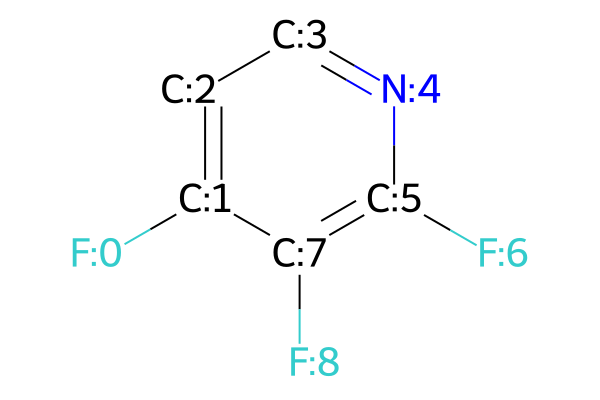

-------PFAS code: From_Review_468, atom index: [0, 5, 7]-------


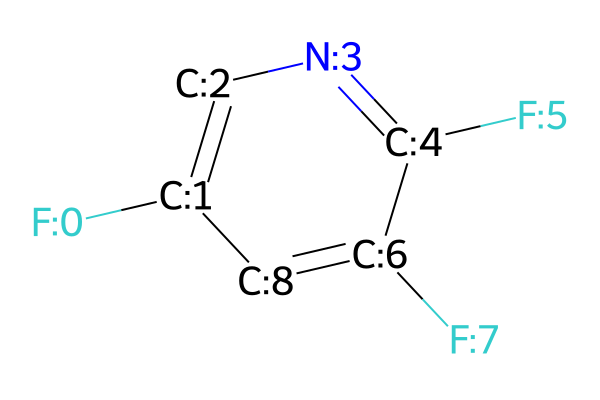

-------PFAS code: From_Review_469, atom index: [0, 5, 7]-------


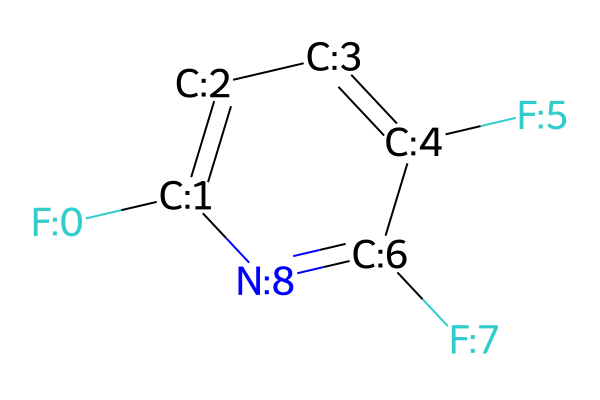

-------PFAS code: From_Review_470, atom index: [0, 4, 7]-------


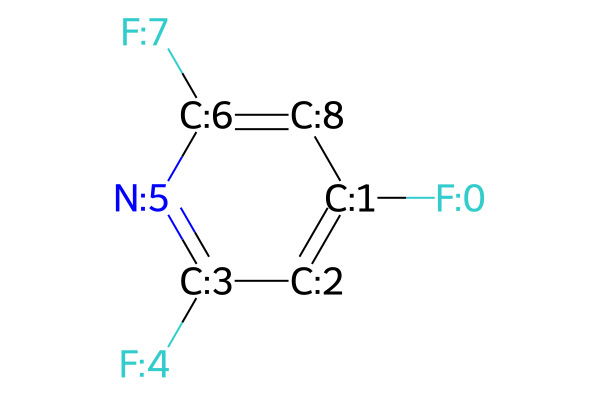

-------PFAS code: From_Review_471, atom index: [0, 6, 8]-------


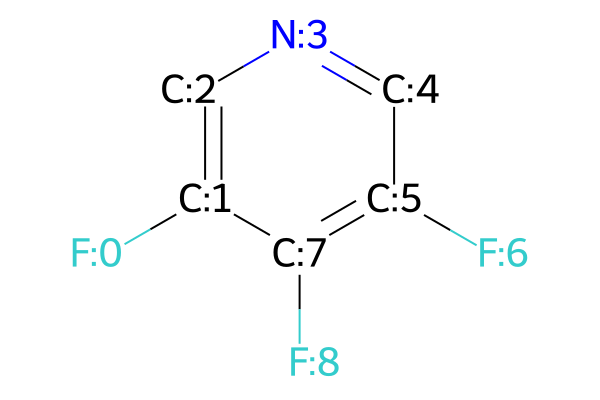

-------PFAS code: From_Review_472, atom index: [0, 5, 7, 9]-------


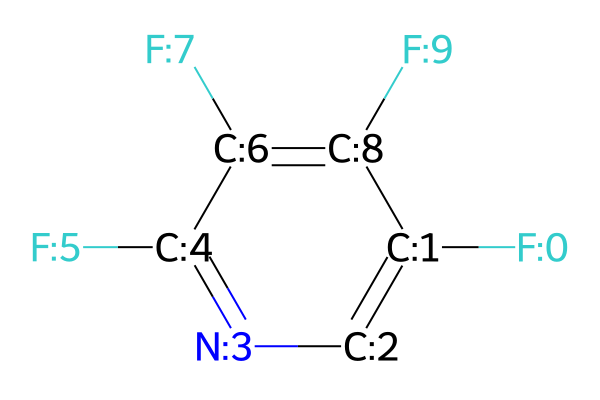

-------PFAS code: From_Review_473, atom index: [0, 4, 6, 9]-------


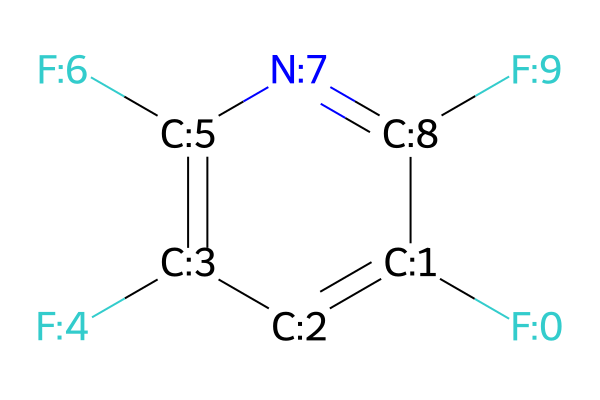

-------PFAS code: From_Review_474, atom index: [0, 4, 6, 8, 10]-------


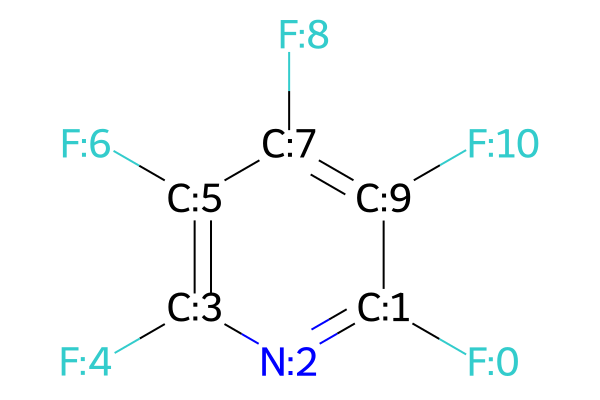

-------PFAS code: From_Review_475, atom index: [0, 4, 6, 10]-------


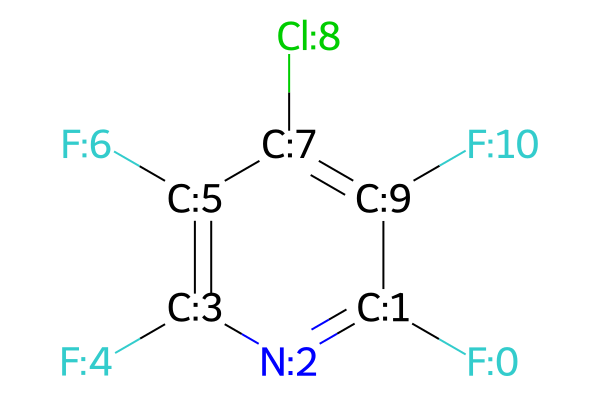

-------PFAS code: From_Review_476, atom index: [0, 4, 6, 10]-------


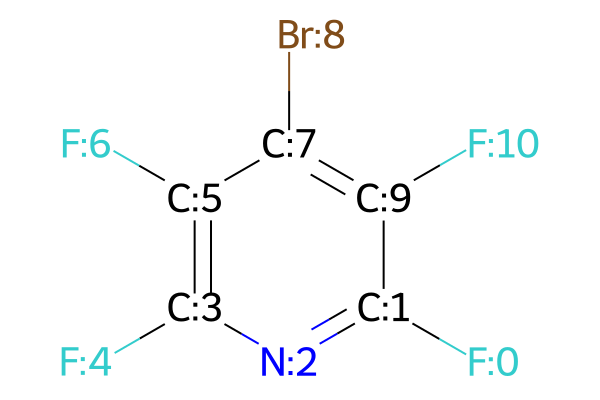

-------PFAS code: From_Review_477, atom index: [0, 6]-------


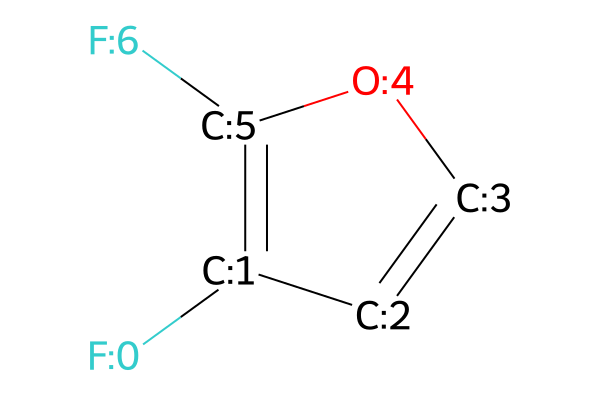

-------PFAS code: From_Review_478, atom index: [0, 5]-------


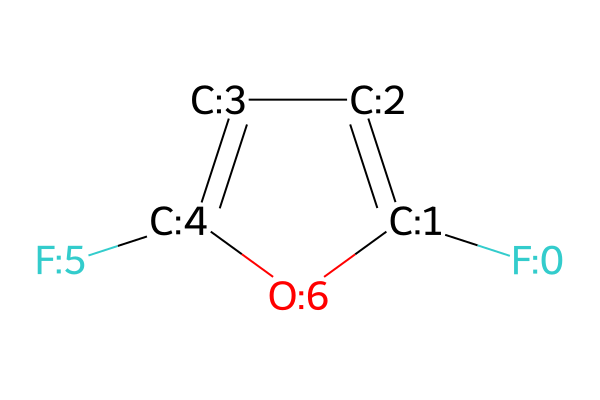

-------PFAS code: From_Review_479, atom index: [0, 6]-------


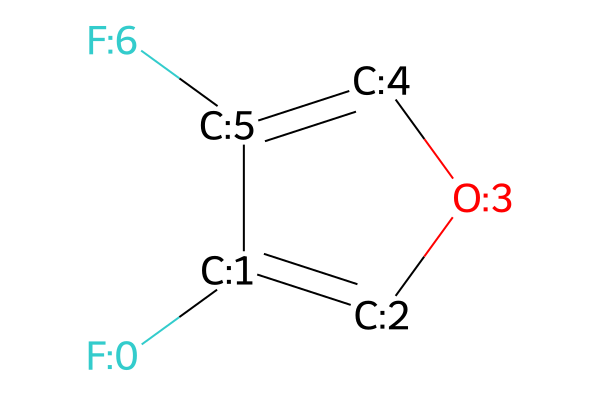

-------PFAS code: From_Review_480, atom index: [0, 5, 7]-------


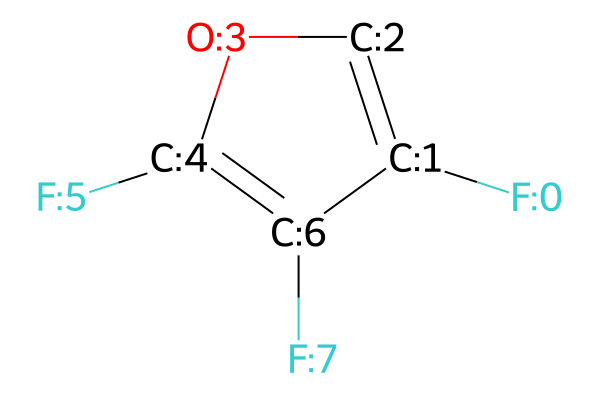

-------PFAS code: From_Review_481, atom index: [0, 4, 6, 8]-------


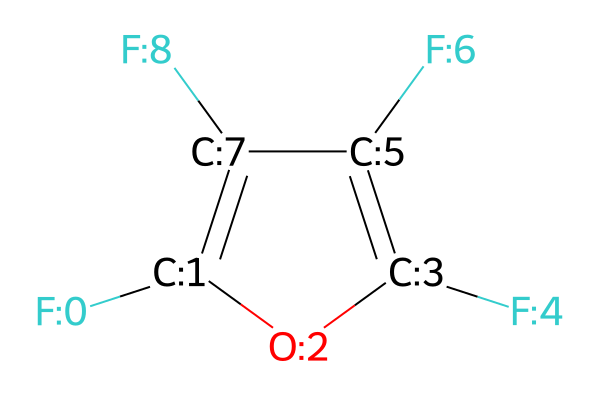

-------PFAS code: From_Review_482, atom index: [0, 4, 6, 8]-------


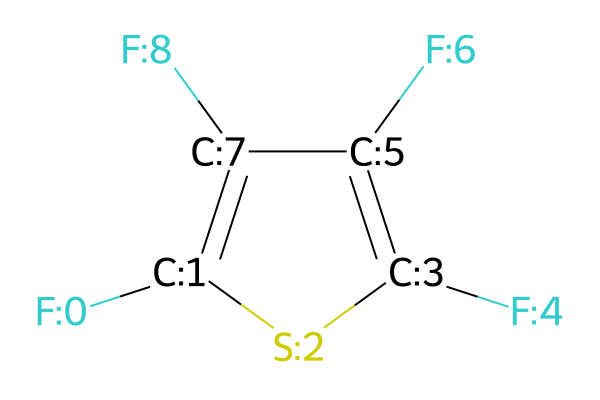

-------PFAS code: From_Review_483, atom index: [0]-------


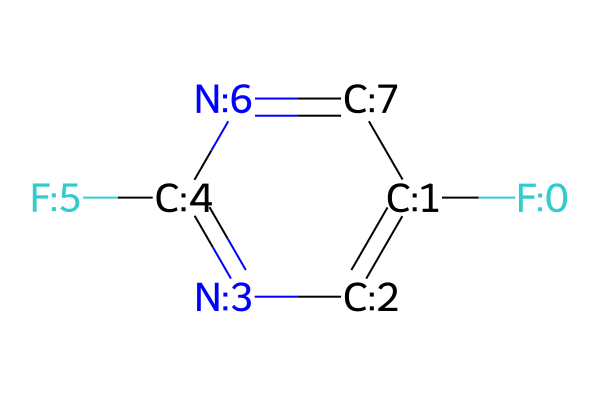

-------PFAS code: From_Review_484, atom index: [5, 7]-------


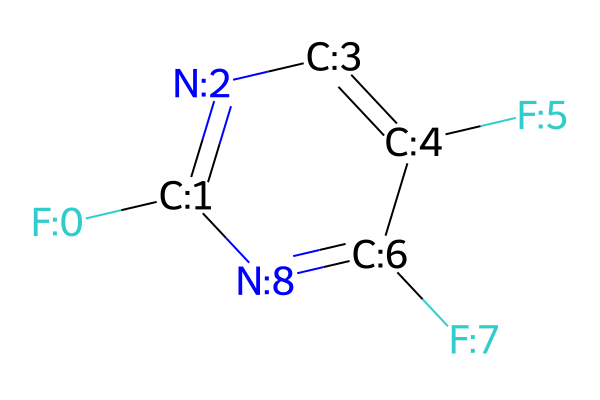

-------PFAS code: From_Review_485, atom index: [4, 6, 8]-------


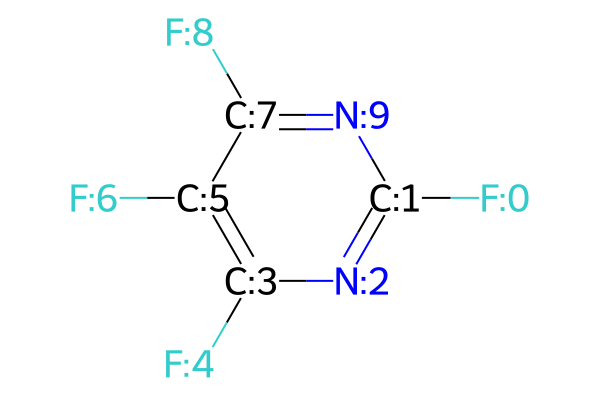

-------PFAS code: aromatics_12, atom index: [0]-------


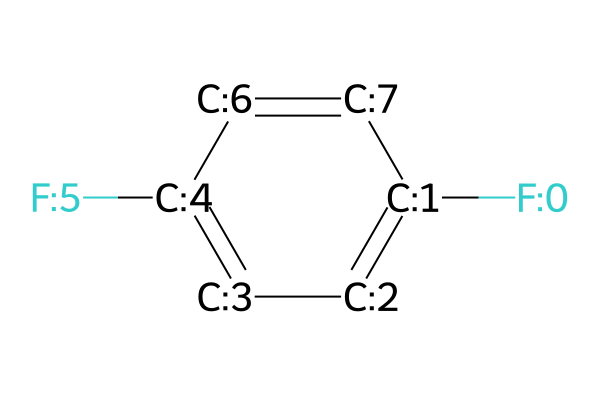

-------PFAS code: aromatics_13, atom index: [0, 6, 8]-------


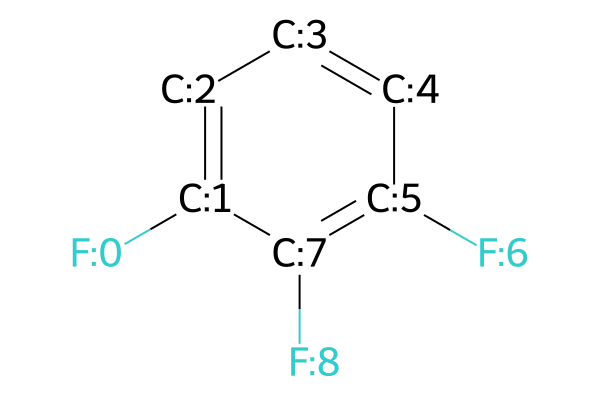

-------PFAS code: aromatics_14, atom index: [0, 5, 7]-------


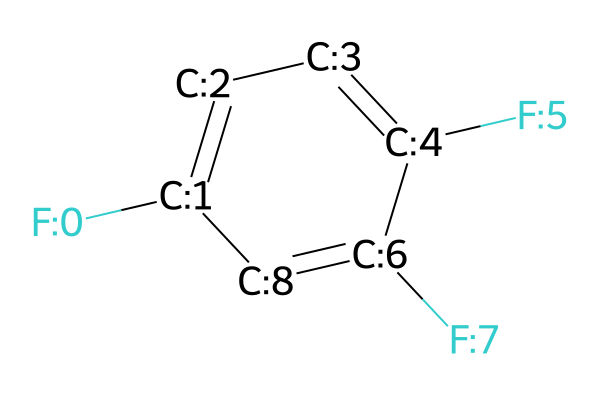

-------PFAS code: aromatics_15, atom index: [3, 5, 7, 9, 11]-------


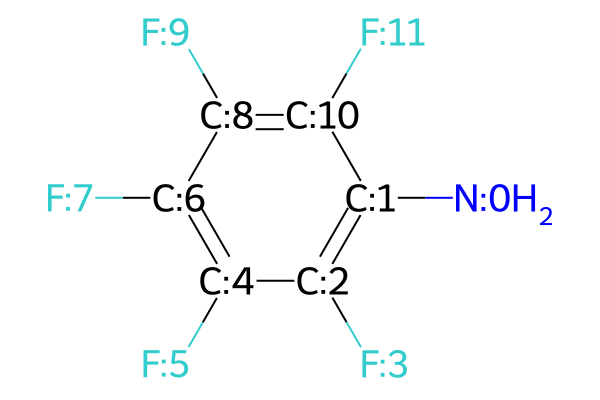

-------PFAS code: aromatics_16, atom index: [5, 7, 9, 11, 13]-------


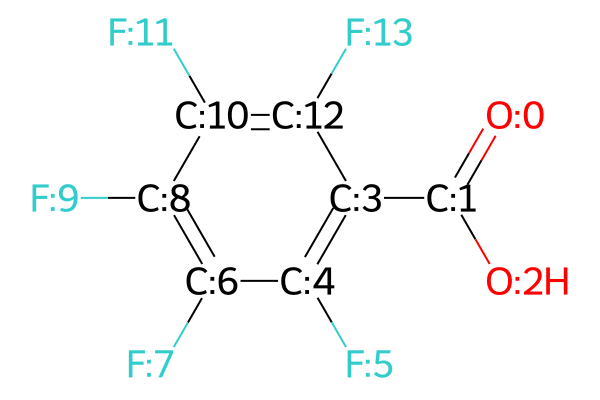

-------PFAS code: aromatics_17, atom index: [0, 4, 6, 8, 10]-------


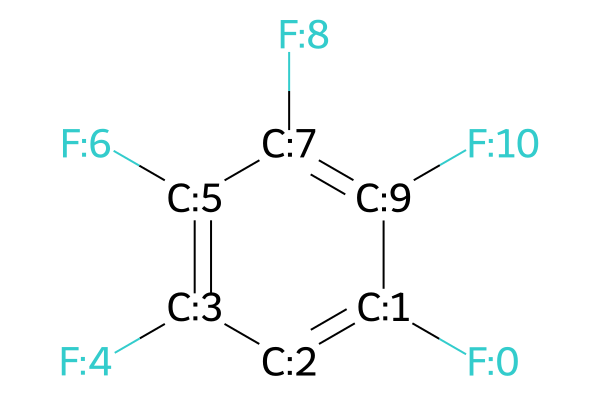

-------PFAS code: aromatics_18, atom index: [3, 5, 7, 9, 11]-------


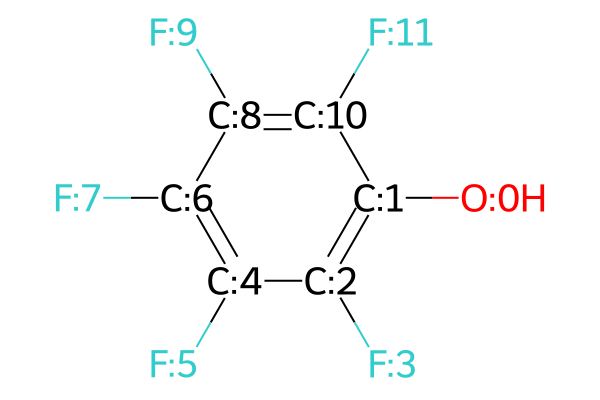

-------PFAS code: aromatics_19, atom index: [0, 3, 5, 9, 11, 13, 15, 17, 19, 21]-------


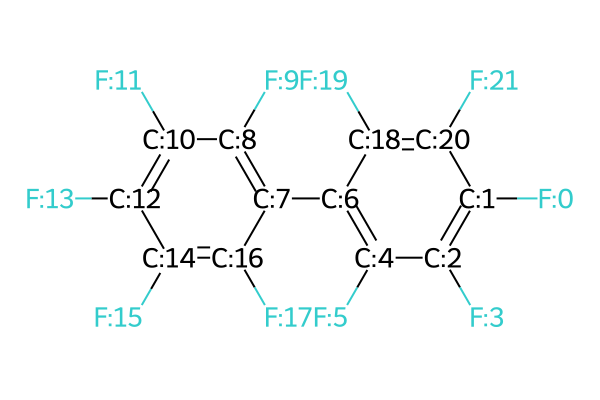

-------PFAS code: aromatics_20, atom index: [0, 3, 5, 8, 10, 12, 14]-------


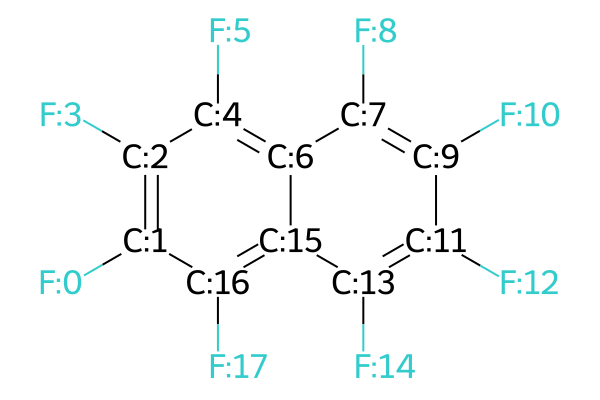

0       1                2                3  \
5_COOH_16          [C]  [C, C]  [C, H, F, F, C]  [O, O, F, F, C]   
5_COOH_17          [C]  [C, C]  [C, H, F, F, C]  [O, O, F, F, C]   
5_COOH_18          [C]  [C, C]  [C, H, F, F, C]  [O, O, F, F, C]   
5_COOH_19          [C]  [C, C]  [C, H, F, F, C]  [O, O, F, F, C]   
0_aromatics_12     [C]  [C, C]     [C, H, C, H]     [C, H, C, H]   
...                ...     ...              ...              ...   
5_From_Review_484  [C]  [C, C]     [N, H, F, N]           [C, C]   
7_From_Review_484  [C]  [C, N]        [C, F, C]     [N, H, F, N]   
4_From_Review_485  [C]  [N, C]        [C, F, C]     [F, N, F, N]   
6_From_Review_485  [C]  [C, C]     [N, F, F, N]           [C, C]   
8_From_Review_485  [C]  [C, N]        [C, F, C]     [N, F, F, N]   

                              4          5  NMR_Peaks  atom_index  \
5_COOH_16          [H, F, F, F]         []    -109.19           5   
5_COOH_17          [H, F, F, C]  [F, F, C]    -109.08           5   
5_COOH_18          [H, F, F, C]  [F, F, C]    -109.02           5   
5_COOH_19          [H, F, F, C]  [F, F, C]    -108.98           5   
0_aromatics_12           [F, F]         []    -119.85           0   
...                         ...        ...        ...         ...   
5_From_Review_484        [F, F]         []    -155.00           5   
7_From_Review_484            []         []     -72.00           7   
4_From_Review_485            []         []     -69.00           4   
6_From_Review_485        [F, F]         []    -171.00           6   
8_From_Review_485            []         []     -69.00           8   

                         PFAS_code  
5_COOH_16                  COOH_16  
5_COOH_17                  COOH_17  
5_COOH_18                  COOH_18  
5_COOH_19                  COOH_19  
0_aromatics_12        aromatics_12  
...                            ...  
5_From_Review_484  From_Review_484  
7_From_Review_484  From_Review_484  
4_From_Review_485  From_Review_485  
6_From_Review_485  From_Review_485  
8_From_Review_485  From_Review_485  

[285 rows x 9 columns]

In [22]:
# -CF=C: 0 [C]; 1 [C, F];
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("F") == 0 and x.count("C") >= 1 and len(x) == 2
        )
    )
]

max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["-CF=C"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Min:", min_value)
print("Max:", max_value)
print("Mean:", mean_value)

print(f"Number of datapoints in our dataset: {len(filtered_df)}")
show_PFAS_Structures(filtered_df)
filtered_df

In [70]:
filtered_df.to_csv(
    os.path.join("..", "artifacts", "results", "-CF=C.csv")
)

### C-CF2H

In [34]:
# C-CF2H: 0 [C]; 1 [C, F];
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("F") == 1
            and x.count("C") == 1
            and x.count("H") == 1
            and len(x) == 3
        )
    )
]

max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["C-CF2H"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df.head(3)

Max: -110.0
Mean: -131.08
Min: -140.01
Number of datapoints in our dataset: 34


0          1          2          3          4          5  \
19_COOH_20  [C]  [C, F, H]  [C, F, F]  [C, F, F]  [C, F, F]  [C, F, F]   
22_COOH_21  [C]  [C, F, H]  [C, F, F]  [C, F, F]  [C, F, F]  [C, F, F]   
25_COOH_22  [C]  [C, F, H]  [C, F, F]  [C, F, F]  [C, F, F]  [C, F, F]   

            NMR_Peaks  
19_COOH_20    -137.39  
22_COOH_21    -137.31  
25_COOH_22    -137.30

### C-CH2F

In [64]:
# C-CH2F: 0 [C]; 1 [C, H, H];
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("H") == 2 and x.count("C") == 1 and len(x) == 3
        )
    )
]

max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["C-CH2F"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df.head(3)

Max: -198.0
Mean: -217.6451612903226
Min: -232.0
Number of datapoints in our dataset: 31


0          1           2          3          4   5  \
0_From_Review_1  [C]  [C, H, H]  [Cl, H, H]         []         []  []   
2_From_Review_2  [C]  [C, H, H]   [H, H, H]         []         []  []   
4_From_Review_3  [C]  [C, H, H]   [C, H, H]  [C, H, H]  [H, H, H]  []   

                 NMR_Peaks  
0_From_Review_1     -220.0  
2_From_Review_2     -212.0  
4_From_Review_3     -219.0

In [21]:
# C-CF2-COO-
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("C") == 2 and x.count("F") == 1 and len(x) == 3
        )
    )
    & (df_list[2].apply(lambda x: x.count("O") == 2))
]
file_path = os.path.join("..", "artifacts", "results", "C-CF2-COO-.csv")
filtered_df.to_csv(file_path)
# C_CF2_COOH = filtered_df[filtered_df['NMR_Peaks'] < -115]

# max_value = C_CF2_COOH['NMR_Peaks'].max()
# mean_value = C_CF2_COOH['NMR_Peaks'].mean()
# min_value = C_CF2_COOH['NMR_Peaks'].min()
# num_points = len(C_CF2_COOH)
# results['C-CF2-COOH'] = [min_value, max_value, mean_value, num_points]

# # Print the results
# print("Max:", max_value)
# print("Mean:", mean_value)
# print("Min:", min_value)
# print(f'Number of datapoints in our dataset: {len(C_CF2_COOH)}')
# C_CF2_COOH

/var/folders/37/_6vg83p95r9gj6cvkznnzz740000gn/T/ipykernel_1852/284713875.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_list = df_dropna.applymap(lambda x: list(x) if isinstance(x, tuple) else x)


In [22]:
results["C-CF2-COOH"] = [-124, -118, -120.05, 34]
results["C-CF2-COO-C"] = [-121, -95, -108.89, 9]

In [23]:
# # C-CF2-COO-R
# C_CF2_COO_R = filtered_df[filtered_df['NMR_Peaks'] > -115]
# max_value = C_CF2_COO_R['NMR_Peaks'].max()
# mean_value = C_CF2_COO_R['NMR_Peaks'].mean()
# min_value = C_CF2_COO_R['NMR_Peaks'].min()
# num_points = len(C_CF2_COO_R)
# results['C-CF2-COO-R'] = [min_value, max_value, mean_value, num_points]

# # Print the results
# print("Max:", max_value)
# print("Mean:", mean_value)
# print("Min:", min_value)
# print(f'Number of datapoints in our dataset: {len(C_CF2_COO_R)}')
# C_CF2_COO_R

### C-CF2-SO3H

In [62]:
# C-CF2-SO3H
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("C") == 1
            and x.count("F") == 1
            and x.count("S") == 1
            and len(x) == 3
        )
    )
    & (df_list[2].apply(lambda x: x.count("O") == 3))
]


max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["C-CF2-SO3H"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Max: -114.18
Mean: -115.46076923076924
Min: -118.91
Number of datapoints in our dataset: 13


0          1                   2             3          4  \
5_SO3H_1   [C]  [S, F, C]  [O, O, O, F, F, F]           [H]         []   
5_SO3H_2   [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, F]         []   
5_SO3H_3   [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, F]   
5_SO3H_4   [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, C]   
5_SO3H_5   [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, C]   
5_SO3H_6   [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, C]   
5_SO3H_7   [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, C]   
5_SO3H_18  [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, F]   
5_SO3H_19  [C]  [S, F, C]  [O, O, O, F, F, C]     [F, F, C]  [F, F, C]   
5_SO3H_20  [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, C]   
5_SO3H_21  [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, C]   
5_SO3H_22  [C]  [S, F, C]  [O, O, O, F, F, C]     [F, F, C]  [F, F, C]   
5_SO3H_23  [C]  [S, F, C]  [O, O, O, F, F, C]  [H, F, F, C]  [F, F, C]   

                   5  NMR_Peaks  
5_SO3H_1          []    -118.91  
5_SO3H_2          []    -115.25  
5_SO3H_3          []    -114.79  
5_SO3H_4   [F, F, F]    -114.65  
5_SO3H_5   [F, F, C]    -114.19  
5_SO3H_6   [F, F, C]    -114.18  
5_SO3H_7   [F, F, C]    -114.49  
5_SO3H_18         []    -116.03  
5_SO3H_19  [F, F, F]    -115.74  
5_SO3H_20  [F, F, C]    -115.71  
5_SO3H_21  [F, F, C]    -115.68  
5_SO3H_22  [F, F, C]    -115.69  
5_SO3H_23  [F, F, C]    -115.68

### -CF2-CH2-CH2-R

Max: -96.0
Mean: -114.49324999999999
Min: -123.57
Number of datapoints in our dataset: 40
-------PFAS code: From_Review_251, atom index: [8]-------


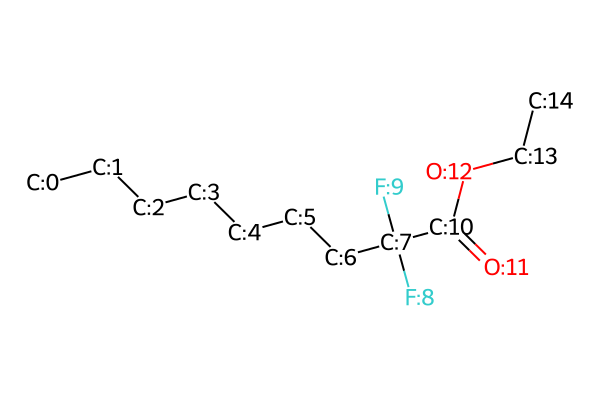

-------PFAS code: From_Review_256, atom index: [7]-------


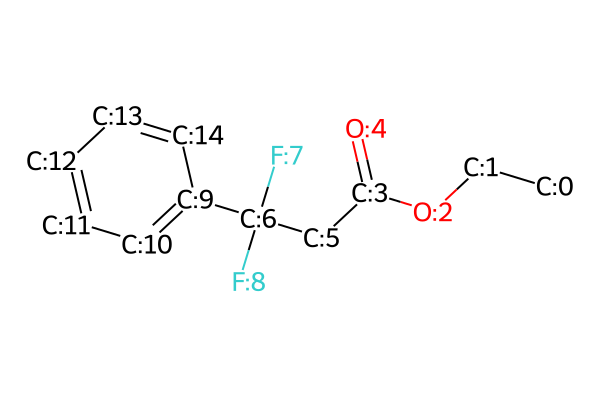

-------PFAS code: From_Review_382, atom index: [9]-------


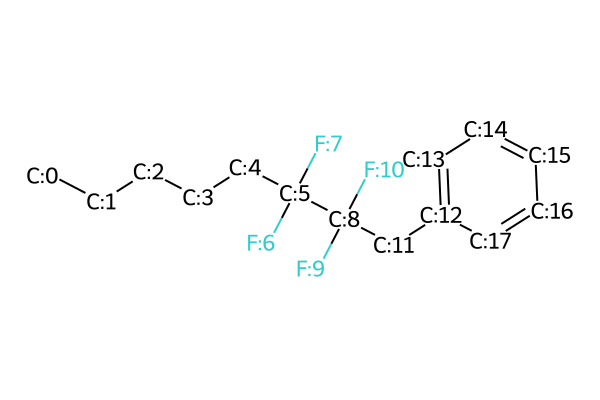

-------PFAS code: From_Review_393, atom index: [4]-------


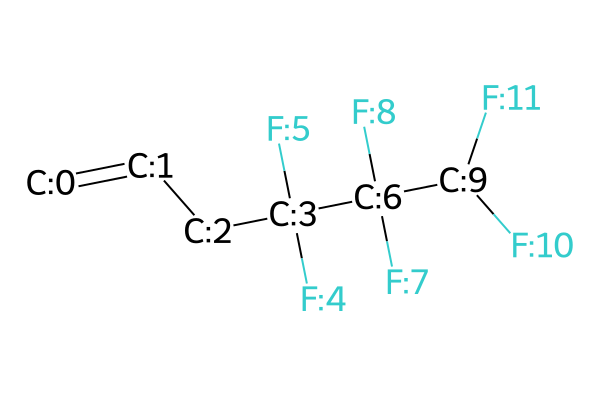

-------PFAS code: From_Review_394, atom index: [0, 7]-------


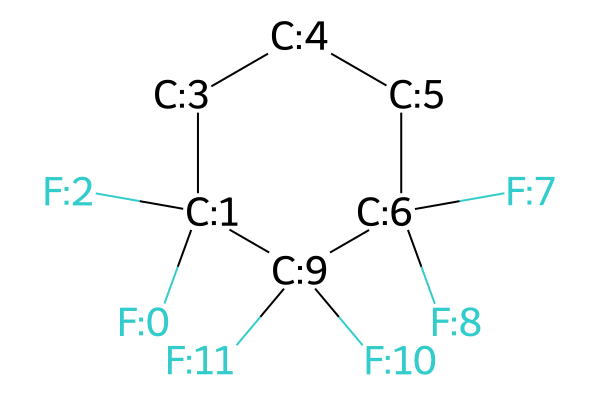

-------PFAS code: From_Review_395, atom index: [0, 6]-------


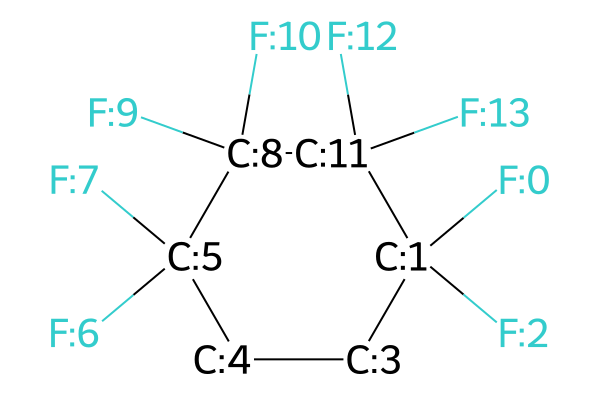

-------PFAS code: From_Review_401, atom index: [13]-------


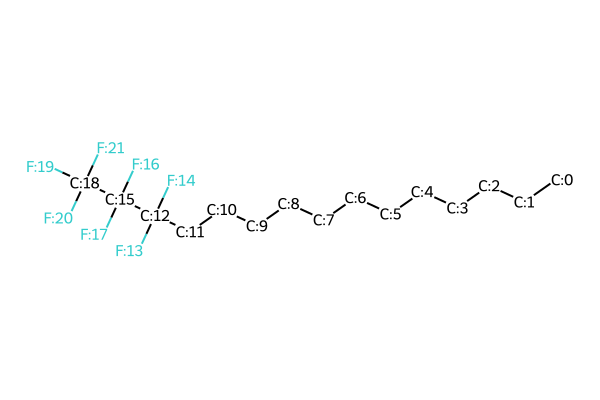

-------PFAS code: From_Review_420, atom index: [6]-------


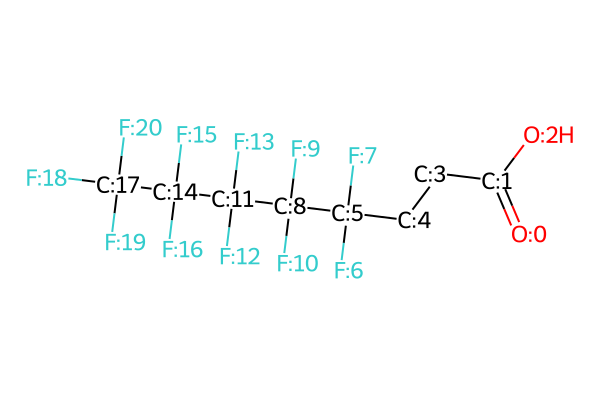

-------PFAS code: I_10, atom index: [23]-------


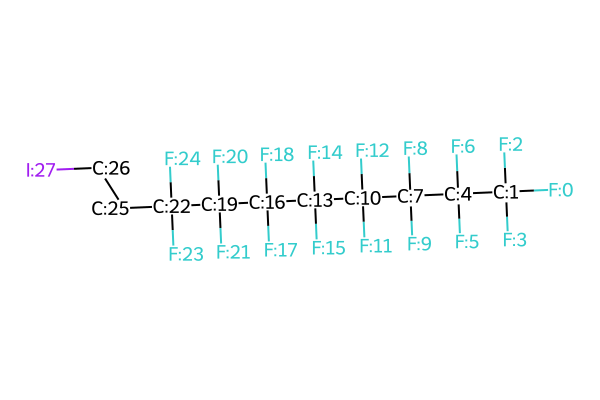

-------PFAS code: I_11, atom index: [29]-------


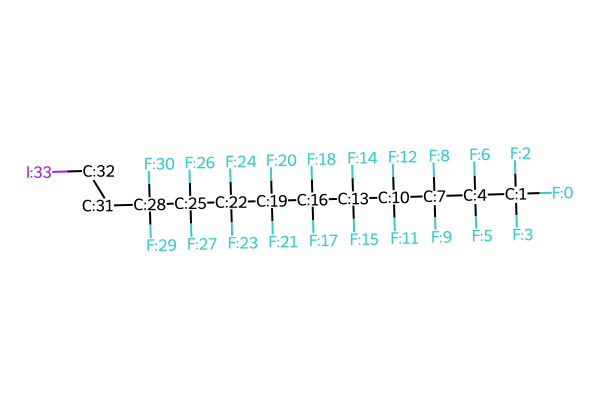

-------PFAS code: I_8, atom index: [11]-------


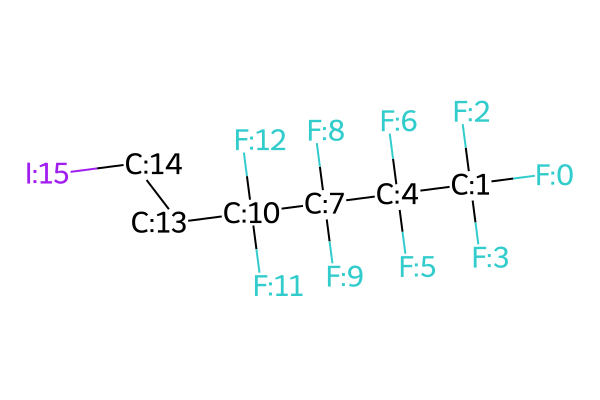

-------PFAS code: I_9, atom index: [17]-------


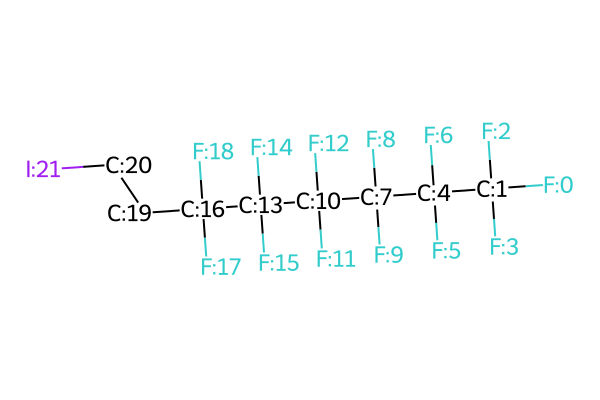

-------PFAS code: SO3H_10, atom index: [7]-------


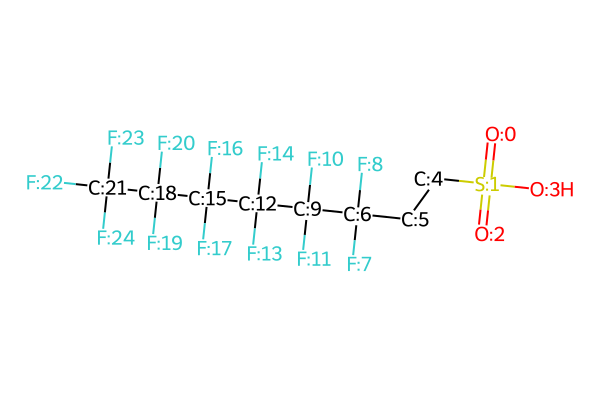

-------PFAS code: SO3H_24, atom index: [7]-------


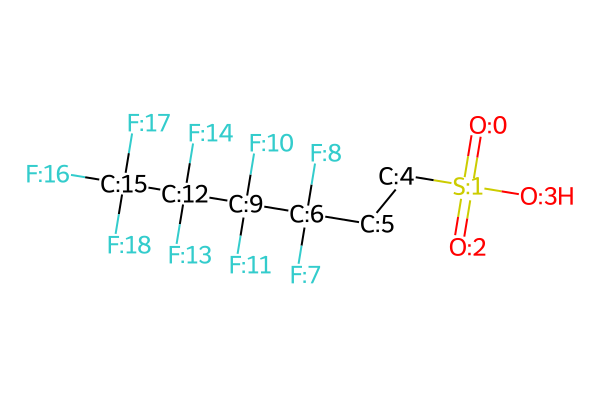

-------PFAS code: SO3H_25, atom index: [7]-------


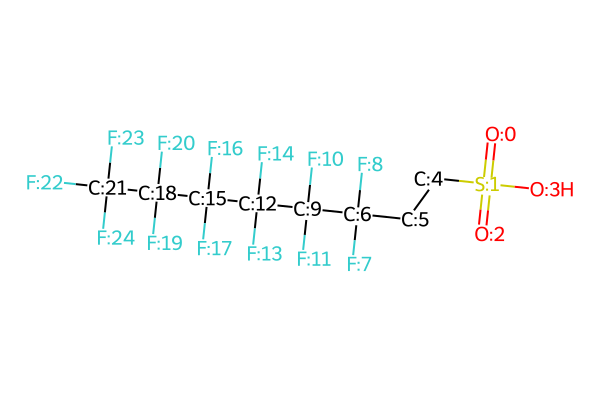

-------PFAS code: SO3H_26, atom index: [7]-------


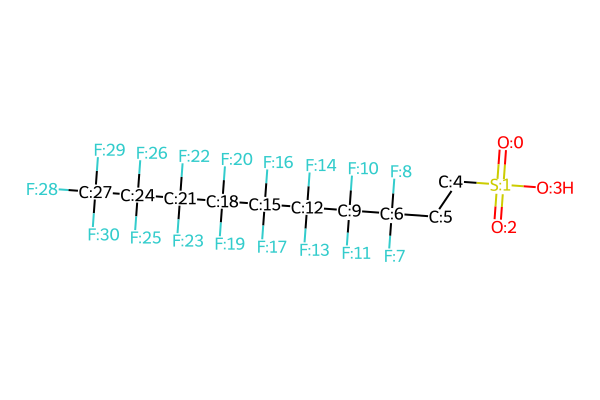

-------PFAS code: SO3H_8, atom index: [17]-------


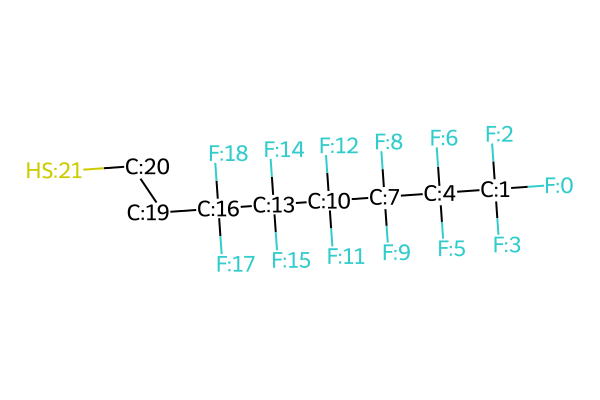

-------PFAS code: acrylates_1, atom index: [9]-------


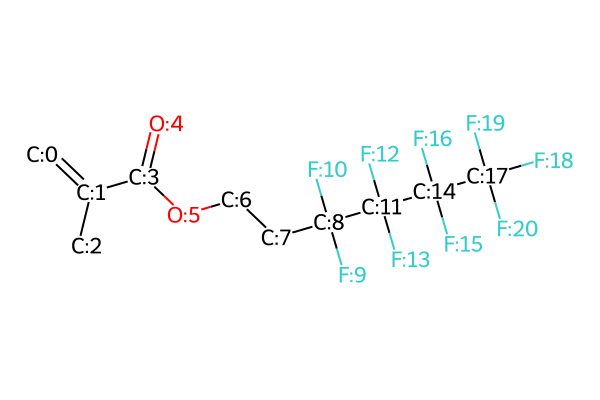

-------PFAS code: acrylates_2, atom index: [8]-------


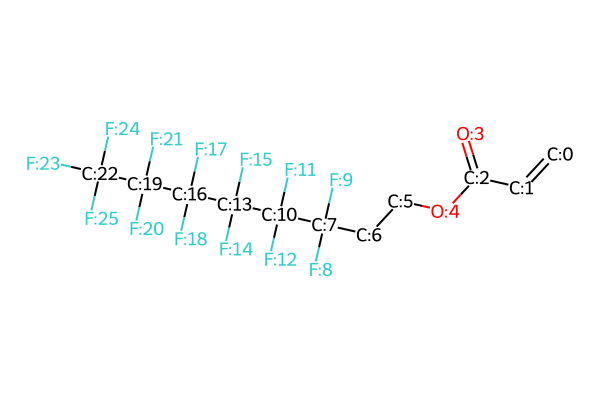

-------PFAS code: acrylates_3, atom index: [8]-------


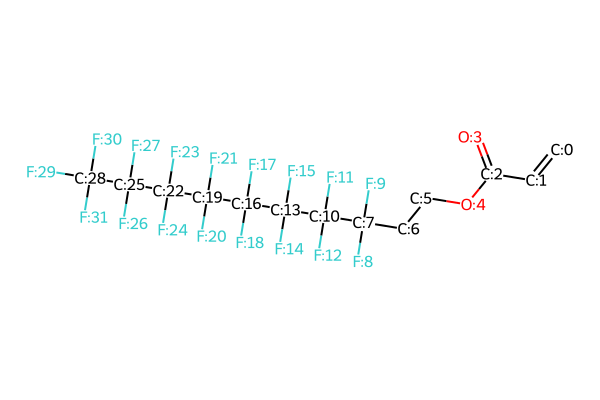

-------PFAS code: acrylates_4, atom index: [8]-------


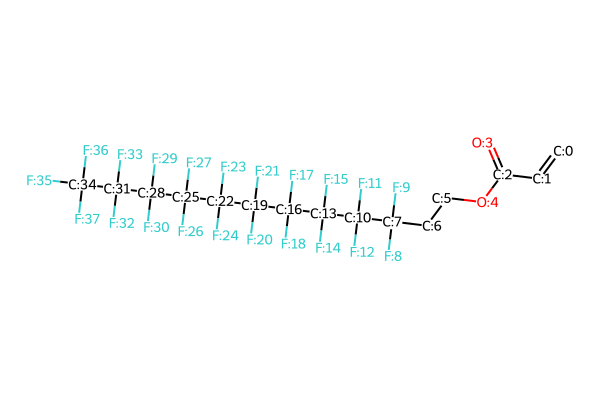

-------PFAS code: acrylates_5, atom index: [9]-------


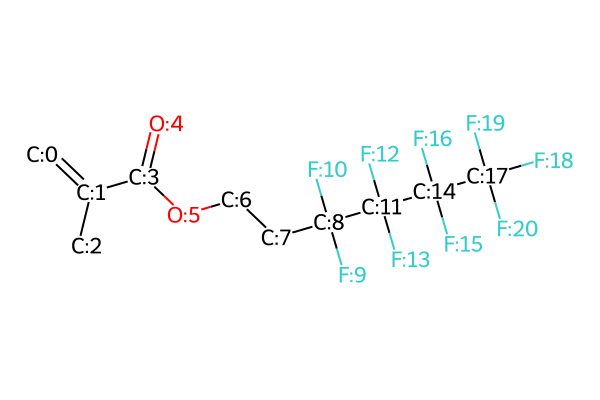

-------PFAS code: acrylates_6, atom index: [9]-------


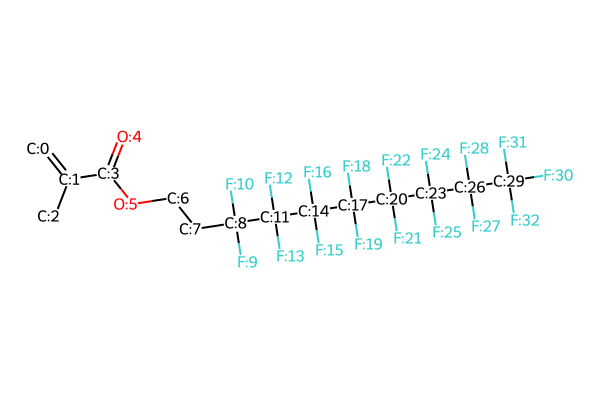

-------PFAS code: alcohols_1, atom index: [4]-------


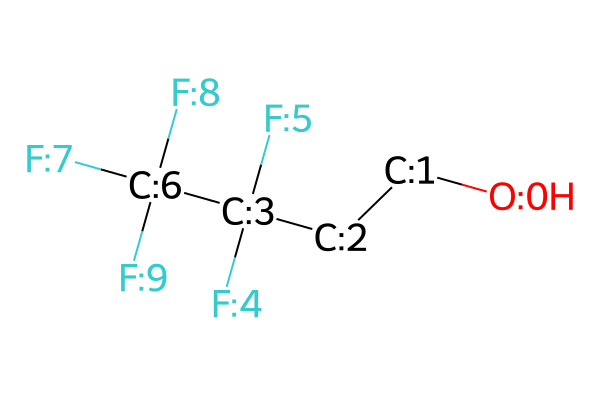

-------PFAS code: alcohols_11, atom index: [4]-------


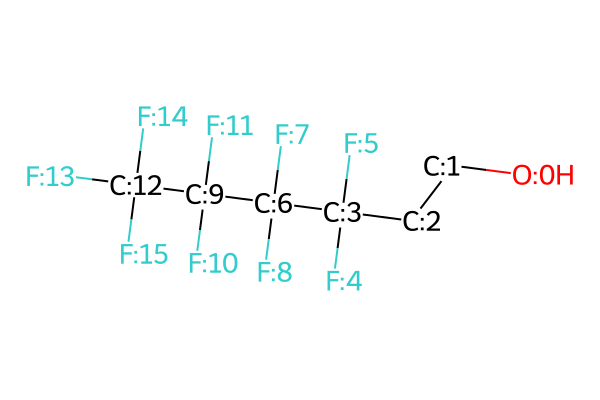

-------PFAS code: alcohols_12, atom index: [4]-------


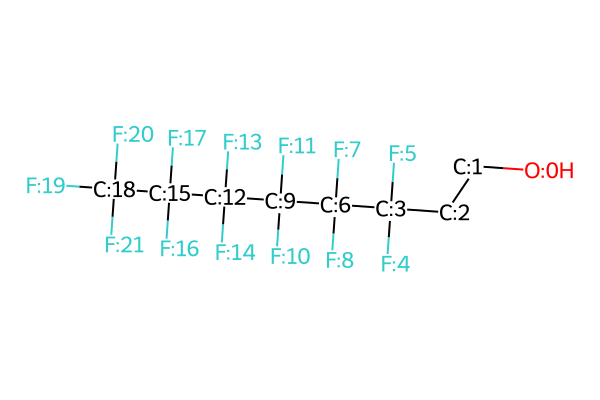

-------PFAS code: alcohols_13, atom index: [4]-------


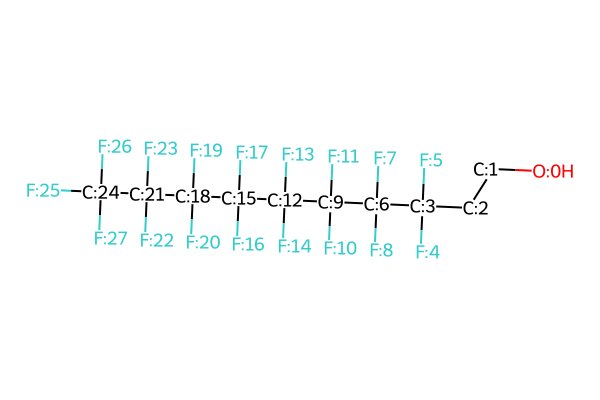

-------PFAS code: alcohols_14, atom index: [4]-------


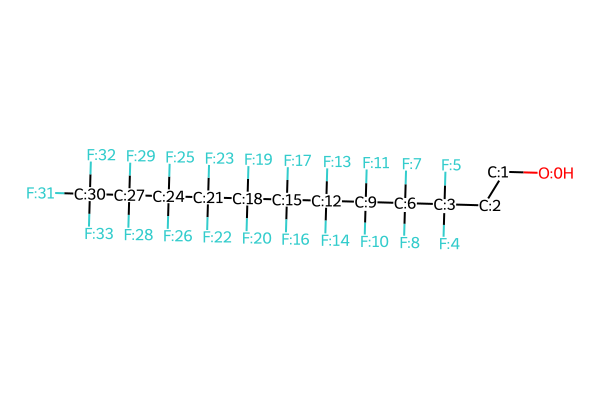

-------PFAS code: alcohols_2, atom index: [4]-------


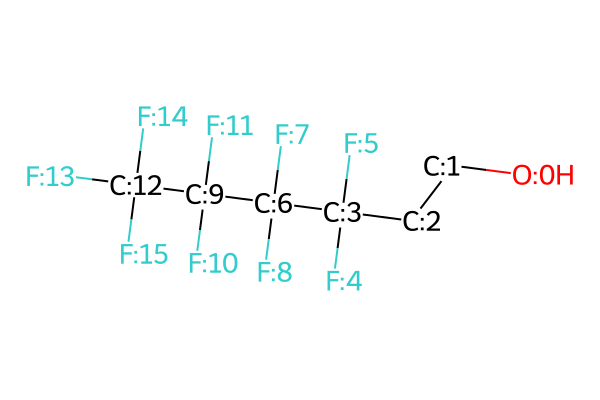

-------PFAS code: alcohols_3, atom index: [4]-------


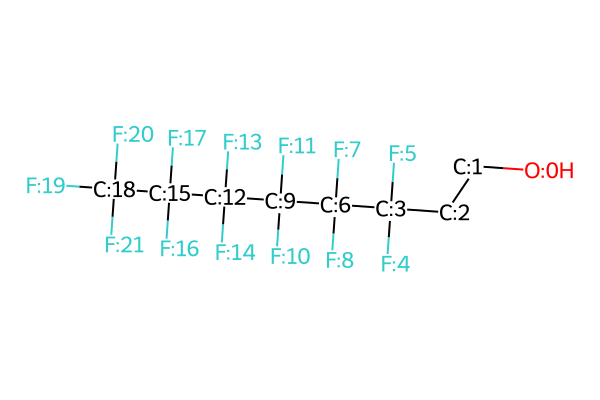

-------PFAS code: alcohols_4, atom index: [4]-------


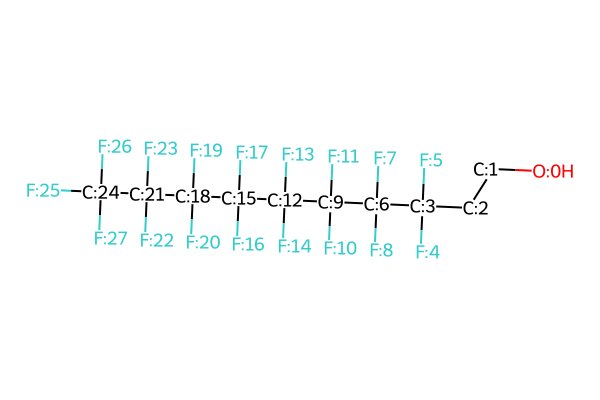

-------PFAS code: alcohols_5, atom index: [4]-------


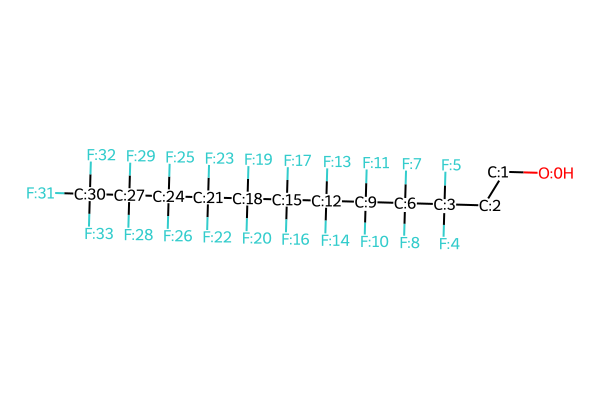

-------PFAS code: other_1, atom index: [7]-------


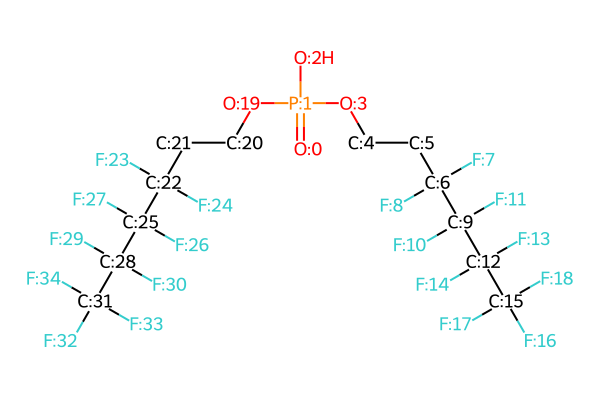

-------PFAS code: other_10, atom index: [7]-------


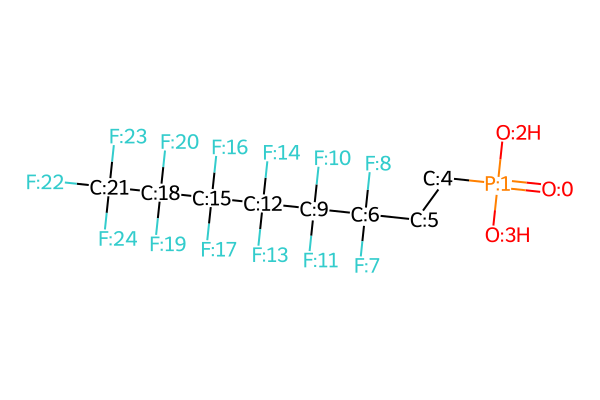

-------PFAS code: other_11, atom index: [7]-------


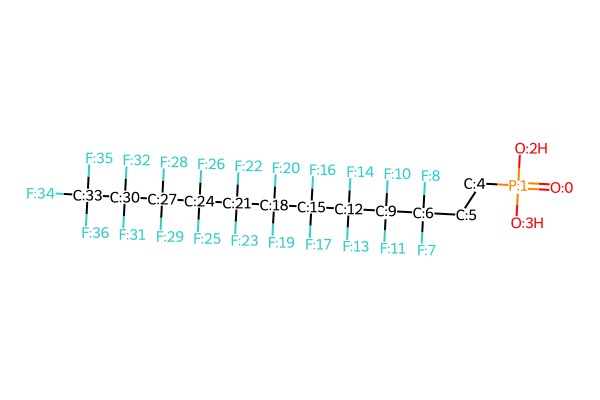

-------PFAS code: other_2, atom index: [7]-------


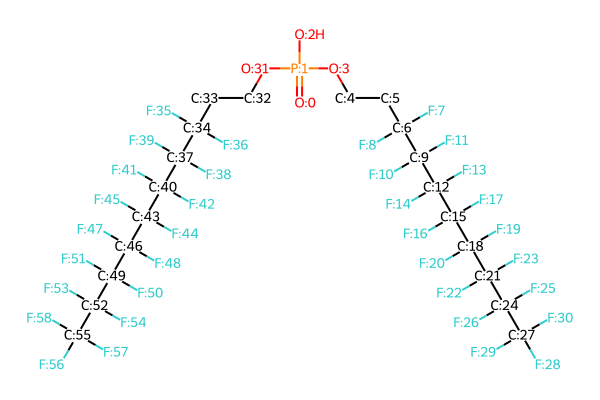

-------PFAS code: other_3, atom index: [7]-------


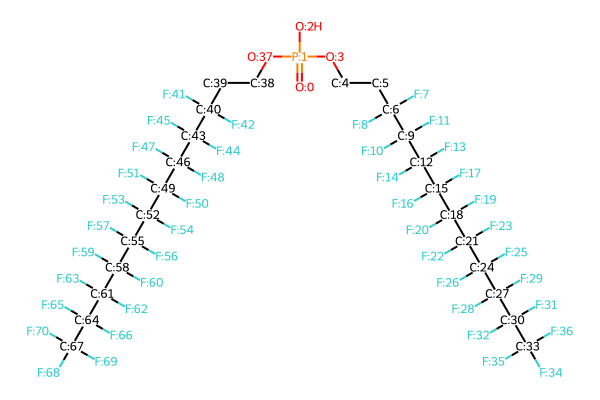

-------PFAS code: other_9, atom index: [6]-------


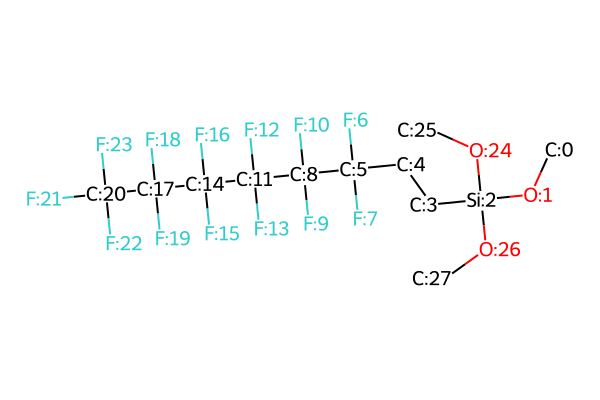

0          1                   2                    3  \
9_acrylates_1       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
8_acrylates_2       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
8_acrylates_3       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
8_acrylates_4       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
9_acrylates_5       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
9_acrylates_6       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
4_alcohols_1        [C]  [C, F, C]  [C, H, H, F, F, F]            [O, H, H]   
4_alcohols_2        [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
4_alcohols_3        [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
4_alcohols_4        [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
4_alcohols_5        [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
17_SO3H_8           [C]  [C, F, C]  [C, F, F, C, H, H]   [C, F, F, S, H, H]   
7_SO3H_10           [C]  [C, F, C]  [C, H, H, F, F, C]   [S, H, H, F, F, C]   
11_I_8              [C]  [C, F, C]  [C, F, F, C, H, H]   [C, F, F, I, H, H]   
17_I_9              [C]  [C, F, C]  [C, F, F, C, H, H]   [C, F, F, I, H, H]   
23_I_10             [C]  [C, F, C]  [C, F, F, C, H, H]   [C, F, F, I, H, H]   
29_I_11             [C]  [C, F, C]  [C, F, F, C, H, H]   [C, F, F, I, H, H]   
7_other_1           [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
7_other_2           [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
7_other_3           [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
6_other_9           [C]  [C, F, C]  [C, H, H, F, F, C]  [Si, H, H, F, F, C]   
7_SO3H_24           [C]  [C, F, C]  [C, H, H, F, F, C]   [S, H, H, F, F, C]   
7_SO3H_25           [C]  [C, F, C]  [C, H, H, F, F, C]   [S, H, H, F, F, C]   
7_SO3H_26           [C]  [C, F, C]  [C, H, H, F, F, C]   [S, H, H, F, F, C]   
4_alcohols_11       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
4_alcohols_12       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
4_alcohols_13       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
4_alcohols_14       [C]  [C, F, C]  [C, H, H, F, F, C]   [O, H, H, F, F, C]   
7_other_10          [C]  [C, F, C]  [C, H, H, F, F, C]   [P, H, H, F, F, C]   
7_other_11          [C]  [C, F, C]  [C, H, H, F, F, C]   [P, H, H, F, F, C]   
8_From_Review_251   [C]  [C, F, C]     [C, H, H, O, O]         [C, H, H, C]   
7_From_Review_256   [C]  [C, F, C]     [C, H, H, C, C]   [O, O, C, H, C, H]   
9_From_Review_382   [C]  [C, F, C]  [C, F, F, C, H, H]      [C, H, H, C, C]   
4_From_Review_393   [C]  [C, F, C]  [C, H, H, F, F, C]      [C, H, F, F, H]   
0_From_Review_394   [C]  [F, C, C]  [C, H, H, C, F, F]   [C, H, H, C, F, F]   
7_From_Review_394   [C]  [C, F, C]  [C, H, H, F, F, C]   [C, H, H, F, F, C]   
0_From_Review_395   [C]  [F, C, C]  [C, H, H, C, F, F]   [C, H, H, C, F, F]   
6_From_Review_395   [C]  [C, F, C]  [C, H, H, F, F, C]   [C, H, H, F, F, C]   
13_From_Review_401  [C]  [C, F, C]  [C, H, H, F, F, C]   [C, H, H, F, F, F]   
6_From_Review_420   [C]  [C, F, C]  [C, H, H, F, F, C]   [C, H, H, F, F, C]   

                                        4                      5  NMR_Peaks  \
9_acrylates_1                [C, F, F, F]                 [C, O]    -113.89   
8_acrylates_2                [C, F, F, C]        [C, O, F, F, C]    -113.67   
8_acrylates_3                [C, F, F, C]        [C, O, F, F, C]    -113.71   
8_acrylates_4                [C, F, F, C]        [C, O, F, F, C]    -113.71   
9_acrylates_5                [C, F, F, F]                 [C, O]    -113.87   
9_acrylates_6                [C, F, F, C]        [C, O, F, F, C]    -113.66   
4_alcohols_1                          [H]                     []    -123.57   
4_alcohols_2                 [H, F, F, F]                     []    -114.02   
4_alcohols_3                 [H, F, F, C]              [F, F, C]    -11

In [13]:
# -CF2-CH2-CH2-R
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("C") == 2 and x.count("F") == 1 and len(x) == 3
        )
    )
    & (df_list[2].apply(lambda x: x.count("H") == 2))
    & (df_list[3].apply(lambda x: x.count("H") == 2))
]


max_value = filtered_df["NMR_Peaks"].max()
min_value = filtered_df["NMR_Peaks"].min()
mean_value = filtered_df["NMR_Peaks"].mean()
num_points = len(filtered_df)
results["-CF2-CH2-CH2-R"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
show_PFAS_Structures(filtered_df)
filtered_df

'From_Review_256', 'From_Review_382_9', and 'From_Review_393_4' doesn't meet requirements

In [59]:
filtered_df.to_csv(
    os.path.join("..", "artifacts", "results", "-CF2-CH2-CH2-R.csv")
)

In [60]:
results["-CF2-CH2-CH2-R"] = [-114.2, -105.00, -123.57, 37]

### -CF2-CH2-(non-CH2 group)

In [56]:
# -CF2-CH2-(non-CH2 group)
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("C") == 2 and x.count("F") == 1 and len(x) == 3
        )
    )
    & (df_list[2].apply(lambda x: x.count("H") == 2))
    & (df_list[3].apply(lambda x: x.count("H") < 2))
]


max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["-CF2-CH2-(non-CH2 group)"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Max: -111.1
Mean: -117.14307692307692
Min: -126.69
Number of datapoints in our dataset: 13


0          1                   2                   3  \
5_COOH_13          [C]  [C, F, C]  [C, H, H, F, F, C]     [O, O, F, F, C]   
5_COOH_14          [C]  [C, F, C]  [C, H, H, F, F, C]     [O, O, F, F, C]   
5_COOH_15          [C]  [C, F, C]  [C, H, H, F, F, C]     [O, O, F, F, C]   
11_acrylates_8     [C]  [C, F, C]  [C, H, H, F, F, C]  [C, O, H, F, F, C]   
3_alcohols_6       [C]  [C, F, C]  [O, H, H, F, F, F]                 [H]   
3_alcohols_7       [C]  [C, F, C]  [O, H, H, F, F, C]        [H, F, F, C]   
3_alcohols_8       [C]  [C, F, C]  [O, H, H, F, F, C]        [H, F, F, C]   
3_alcohols_9       [C]  [C, F, C]  [O, H, H, F, F, C]        [H, F, F, C]   
17_SO3H_9          [C]  [C, F, C]  [C, F, F, S, H, H]        [C, F, F, H]   
9_ethers_3         [C]  [C, F, C]  [O, H, H, F, F, C]        [C, F, F, C]   
4_other_8          [C]  [C, F, C]  [C, H, H, F, F, C]     [O, H, F, F, C]   
3_From_Review_402  [C]  [C, F, C]  [O, H, H, F, F, C]        [H, F, F, F]   
5_From_Review_419  [C]  [C, F, C]  [C, H, H, F, F, C]     [O, O, F, F, C]   

                                       4             5  NMR_Peaks  
5_COOH_13                   [H, F, F, F]            []    -112.44  
5_COOH_14                   [H, F, F, C]     [F, F, C]    -112.18  
5_COOH_15                   [H, F, F, C]     [F, F, C]    -112.16  
11_acrylates_8     [O, H, H, H, F, F, C]  [C, F, C, C]    -113.22  
3_alcohols_6                          []            []    -126.69  
3_alcohols_7                   [F, F, C]     [F, F, C]    -122.22  
3_alcohols_8                   [F, F, C]     [F, F, C]    -121.92  
3_alcohols_9                   [F, F, H]            []    -122.62  
17_SO3H_9                      [C, F, F]     [C, F, F]    -114.47  
9_ethers_3            [C, F, F, F, F, H]     [F, F, H]    -120.34  
4_other_8                      [F, F, C]     [F, F, C]    -111.10  
3_From_Review_402                     []            []    -122.00  
5_From_Review_419           [H, F, F, C]     [F, F, C]    -111.50

In [28]:
results

{'CF3-C': [-88.2, -49.4, -72.9153869047619, 336],
 'C-CF2-C': [-159.0, -84.5, -121.7869065934066, 728],
 'CF3-C6H5': [-63.9, -49.4, -58.55, 65],
 'CF3-C(C)=c': [-70, -64, -65.92, 4],
 'CF3-CH=C': [-67.0, -58.0, -63.611111111111114, 18],
 'CF2=C': [-134.0, -61.2, -100.96666666666665, 24],
 '-CF=C': [-205.0, -63.0, -133.5397894736842, 285],
 'C-CF2H': [-140.01, -110.0, -131.08, 34],
 'C-CH2F': [-232.0, -198.0, -217.6451612903226, 31],
 'C-CF2-COOH': [-124, -118, -120.05, 34],
 'C-CF2-COO-C': [-121, -95, -108.89, 9],
 'C-CF2-SO3H': [-118.91, -114.18, -115.46076923076924, 13],
 '-CF2-CH2-CH2-R': [-114.49, -105.0, -114.49, 39],
 '-CF2-CH2-(non-CH2 group)': [-126.69, -111.1, -117.14307692307692, 13]}

In [29]:
descriptor_2d_content["NMR_Peaks"] = descriptor_2d_content["NMR_Peaks"].apply(
    pd.to_numeric
)

### C-CF2-O-

In [54]:
# C-CF2-O-
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("C") == 1
            and x.count("F") == 1
            and x.count("O") == 1
            and len(x) == 3
        )
    )
]

max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["C-CF2-O-"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Max: -79.6
Mean: -90.06833333333333
Min: -125.54
Number of datapoints in our dataset: 42


0          1             2                   3  \
3_ethers_0          [C]  [O, F, C]  [C, F, F, C]  [H, H, H, F, F, C]   
4_ethers_2          [C]  [O, F, C]  [C, F, F, H]           [C, H, H]   
4_ethers_3          [C]  [C, F, O]  [F, F, H, C]           [C, H, H]   
5_ethers_5          [C]  [O, F, C]  [C, F, F, H]           [F, F, H]   
4_ethers_7          [C]  [O, F, C]  [C, F, F, H]           [C, H, H]   
3_ethers_8          [C]  [O, F, C]  [C, F, F, C]  [H, H, H, F, F, F]   
3_ethers_9          [C]  [O, F, C]  [C, F, F, H]           [H, H, H]   
6_ethers_10         [C]  [O, F, C]  [C, F, F, H]           [C, H, H]   
7_ether_11          [C]  [C, F, O]  [C, F, F, C]     [O, O, F, F, F]   
10_ether_12         [C]  [C, F, O]  [C, F, F, C]  [C, F, F, F, F, F]   
7_ether_13          [C]  [O, F, C]  [C, F, F, C]  [C, F, C, F, F, F]   
10_ether_14         [C]  [C, F, O]  [C, F, F, C]  [C, F, F, F, C, C]   
4_ether_15          [C]  [C, F, O]     [O, O, C]        [H, F, F, C]   
8_ether_15          [C]  [O, F, C]  [C, F, F, O]        [C, F, F, C]   
11_ether_15         [C]  [C, F, O]  [O, F, F, C]        [C, F, F, F]   
4_ether_16          [C]  [C, F, O]     [O, O, C]        [H, F, F, C]   
8_ether_16          [C]  [O, F, C]  [C, F, F, O]        [C, F, F, C]   
11_ether_16         [C]  [C, F, O]  [O, F, F, C]        [C, F, F, C]   
15_ether_16         [C]  [O, F, C]  [C, F, F, C]  [C, F, F, F, F, C]   
4_ether_17          [C]  [C, F, O]     [O, O, C]        [H, F, F, C]   
8_ether_17          [C]  [O, F, C]  [C, F, F, O]        [C, F, F, C]   
11_ether_17         [C]  [C, F, O]  [O, F, F, C]        [C, F, F, C]   
15_ether_17         [C]  [O, F, C]  [C, F, F, O]        [C, F, F, C]   
18_ether_17         [C]  [C, F, O]  [O, F, F, C]        [C, F, F, F]   
4_ether_18          [C]  [C, F, O]     [O, O, C]        [H, F, F, C]   
8_ether_18          [C]  [O, F, C]  [C, F, F, O]        [C, F, F, C]   
11_ether_18         [C]  [C, F, O]  [O, F, F, C]        [C, F, F, C]   
15_ether_18         [C]  [O, F, C]  [C, F, F, O]        [C, F, F, C]   
18_ether_18         [C]  [C, F, O]  [O, F, F, C]        [C, F, F, C]   
22_ether_18         [C]  [O, F, C]  [C, F, F, C]  [C, F, F, F, F, C]   
7_ether_19          [C]  [C, F, O]  [C, F, F, C]     [O, O, F, F, F]   
10_ether_20         [C]  [C, F, O]  [C, F, F, C]  [C, F, F, F, F, F]   
8_ether_21          [C]  [C, F, O]  [S, F, F, C]  [O, O, O, F, F, C]   
12_ether_21         [C]  [O, F, C]  [C, F, F, F]           [C, F, F]   
4_From_Review_242   [C]  [O, F, C]     [C, O, C]  [C, H, H, C, C, H]   
4_From_Review_383   [C]  [C, F, O]  [F, F, H, C]           [C, H, H]   
4_From_Review_387   [C]  [O, F, C]  [C, F, F, F]           [F, C, H]   
3_From_Review_388   [C]  [O, F, C]  [C, F, F, F]           [H, H, H]   
3_From_Review_390   [C]  [O, F, C]  [C, F, C, H]  [H, H, H, F, F, F]   
3_From_Review_399   [C]  [O, F, C]  [C, F, F, C]  [H, H, H, F, F, F]   
15_From_Review_434  [C]  [C, F, O]  [N, F, F, C]     [C, C, F, F, C]   
19_From_Review_434  [C]  [O, F, C]  [C, F, F, N]     [C, F, F, C, C]   

                                              4                   5  NMR_Peaks  
3_ethers_0                            [F, F, F]                  []     -88.39  
4_ethers_2                            [H, H, H]                  []     -91.64  
4_ethers_3                            [F, F, C]           [F, F, C]     -92.50  
5_ethers_5                                   []                  []    -125.13  
4_ethers_7                            [H, H, H]                  []     -91.59  
3_ethers_8                                   []                  []     -89.59  
3_ethers_9                                   []                  []    -125.54  
6_ethers_10                           [C, H, H]           [C, H, H]     -91.37  
7_ether_11                                  [H]                  []     -90.00  
10_ether_12                              [O, O]                 [H]     -87.70  
7_ether_13                      [O

### -C-CFH-C

In [51]:
# -C-CFH-C-
df_list = df_dropna.applymap(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("H") == 1 and x.count("C") == 2 and len(x) == 3
        )
    )
]


max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["-C-CFH-C-"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Max: -160.0
Mean: -183.3
Min: -213.0
Number of datapoints in our dataset: 40


/var/folders/37/_6vg83p95r9gj6cvkznnzz740000gn/T/ipykernel_10684/4191734555.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_list = df_dropna.applymap(lambda x: list(x) if isinstance(x, tuple) else x)


0          1                    2  \
3_From_Review_25   [C]  [C, C, H]   [C, H, H, C, C, H]   
3_From_Review_26   [C]  [C, C, H]   [H, H, H, H, H, H]   
0_From_Review_27   [C]  [C, C, H]   [C, H, H, C, H, H]   
0_From_Review_28   [C]  [C, C, H]   [C, H, H, C, H, H]   
0_From_Review_29   [C]  [C, C, H]   [C, H, H, C, H, H]   
0_From_Review_30   [C]  [C, C, H]   [C, H, H, C, H, H]   
7_From_Review_36   [C]  [C, C, H]   [C, H, H, H, H, H]   
10_From_Review_37  [C]  [C, C, H]  [C, H, H, Cl, H, H]   
11_From_Review_38  [C]  [C, C, H]  [C, H, H, Br, H, H]   
11_From_Review_39  [C]  [C, C, H]   [C, H, H, I, H, H]   
3_From_Review_42   [C]  [C, C, H]      [F, H, H, C, C]   
6_From_Review_63   [C]  [C, C, H]   [C, O, H, C, H, H]   
2_From_Review_64   [C]  [C, C, H]   [H, H, H, C, H, H]   
3_From_Review_75   [C]  [C, C, H]         [O, H, C, C]   
4_From_Review_76   [C]  [C, C, H]         [C, O, C, C]   
5_From_Review_77   [C]  [C, C, H]      [C, O, H, H, H]   
6_From_Review_78   [C]  [C, C, H]      [C, O, C, H, H]   
7_From_Review_79   [C]  [C, C, H]      [C, H, H, O, C]   
6_From_Review_80   [C]  [C, C, H]      [C, H, H, O, C]   
6_From_Review_83   [C]  [C, C, H]      [C, H, H, C, C]   
5_From_Review_84   [C]  [C, C, H]      [C, H, H, C, C]   
7_From_Review_89   [C]  [C, C, H]      [O, O, H, H, H]   
6_From_Review_90   [C]  [C, C, H]      [O, O, C, H, H]   
3_From_Review_91   [C]  [C, C, H]      [C, H, H, O, N]   
6_From_Review_92   [C]  [C, C, H]         [O, O, C, C]   
7_From_Review_93   [C]  [C, C, H]      [C, H, H, C, C]   
6_From_Review_94   [C]  [C, C, H]      [C, H, H, C, C]   
6_From_Review_105  [C]  [C, C, H]         [O, O, C, O]   
6_From_Review_106  [C]  [C, C, H]         [O, O, O, C]   
6_From_Review_107  [C]  [C, C, H]         [O, O, O, O]   
2_From_Review_108  [C]  [C, C, H]         [H, H, H, N]   
9_From_Review_110  [C]  [C, C, H]         [C, H, H, N]   
3_From_Review_111  [C]  [C, C, H]            [N, C, C]   
3_From_Review_112  [C]  [C, C, H]            [N, C, C]   
4_From_Review_189  [C]  [C, C, H]      [C, H, H, H, H]   
2_From_Review_190  [C]  [C, C, H]      [H, H, H, C, H]   
2_From_Review_386  [C]  [C, C, H]   [H, H, H, F, F, F]   
6_From_Review_390  [C]  [C, C, H]   [O, F, F, F, F, F]   
8_From_Review_391  [C]  [C, C, H]   [S, F, F, F, F, F]   
8_From_Review_392  [C]  [C, C, H]   [C, F, F, F, F, F]   

                                             3                      4  \
3_From_Review_25   [H, H, H, H, H, H, H, H, H]                     []   
3_From_Review_26                            []                     []   
0_From_Review_27            [C, H, H, C, H, H]           [H, H, H, H]   
0_From_Review_28            [C, H, H, C, H, H]     [C, H, H, C, H, H]   
0_From_Review_29                  [H, H, H, H]                     []   
0_From_Review_30            [C, H, H, C, H, H]           [F, H, F, H]   
7_From_Review_36                     [C, H, H]              [C, H, H]   
10_From_Review_37                    [C, H, H]              [C, H, H]   
11_From_Review_38                    [C, H, H]              [C, H, H]   
11_From_Review_39                    [C, H, H]              [C, H, H]   
3_From_Review_42                  [C, H, C, H]           [C, H, C, H]   
6_From_Review_63         [C, H, H, H, C, H, H]     [C, H, H, H, H, H]   
2_From_Review_64                     [O, H, H]                    [H]   
3_From_Review_75                  [C, H, C, H]           [C, H, C, H]   
4_From_Review_76         [H, H, H, C, H, C, H]           [C, H, C, H]   
5_From_Review_77                     [H, H, H]                     []   
6_From_Review_78            [C, H, H, C, H, H]     [C, H, H, H, H, H]   
7_From_Review_79            [C, H, H, C, H, H]           [H, H, H, H]   
6_From_Review_80            [C, H, H, C, H, H]     [C, H, H, C, H, H]   
6_From_Review_83         [C, H, H, C, H, C, H]  [C, H, H, C, H, C, H]   
5_From_Review_84            [C, O, C, H, C, H]  [H, H, H, C, H, C, H]   
7_From_Review_89                    

### -C-CFH2

In [49]:
# -C-CFH2
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("C") == 1 and x.count("H") == 2 and len(x) == 3
        )
    )
]


max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["-C-CFH2"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Max: -198.0
Mean: -217.6451612903226
Min: -232.0
Number of datapoints in our dataset: 31


0          1             2                            3  \
0_From_Review_1    [C]  [C, H, H]    [Cl, H, H]                           []   
2_From_Review_2    [C]  [C, H, H]     [H, H, H]                           []   
4_From_Review_3    [C]  [C, H, H]     [C, H, H]                    [C, H, H]   
0_From_Review_6    [C]  [C, H, H]        [C, C]                 [C, H, C, H]   
6_From_Review_22   [C]  [C, H, H]     [C, C, H]           [C, H, H, C, H, H]   
5_From_Review_23   [C]  [C, H, H]     [C, C, C]  [H, H, H, H, H, H, H, H, H]   
0_From_Review_24   [C]  [C, H, H]     [C, C, H]           [C, H, H, C, H, H]   
0_From_Review_33   [C]  [C, H, H]    [Br, H, H]                           []   
0_From_Review_34   [C]  [C, H, H]     [F, H, H]                           []   
4_From_Review_35   [C]  [C, H, H]    [C, Br, H]                    [H, H, H]   
0_From_Review_40   [C]  [C, H, H]  [Cl, Cl, Cl]                           []   
0_From_Review_41   [C]  [C, H, H]   [Cl, Cl, H]                           []   
0_From_Review_42   [C]  [C, H, H]     [F, C, H]                       [C, C]   
4_From_Review_61   [C]  [C, H, H]     [O, H, H]                          [C]   
3_From_Review_62   [C]  [C, H, H]     [O, H, H]                          [H]   
3_From_Review_72   [C]  [C, H, H]        [O, H]                           []   
4_From_Review_73   [C]  [C, H, H]        [C, O]                    [H, H, H]   
5_From_Review_74   [C]  [C, H, H]        [C, O]                    [C, H, H]   
6_From_Review_87   [C]  [C, H, H]        [O, O]                          [C]   
7_From_Review_88   [C]  [C, H, H]     [C, H, H]                       [O, O]   
3_From_Review_109  [C]  [C, H, H]           [N]                           []   
3_From_Review_183  [C]  [C, H, H]        [C, H]                       [H, H]   
3_From_Review_184  [C]  [C, H, H]           [C]                          [H]   
4_From_Review_185  [C]  [C, H, H]        [C, H]                       [C, H]   
0_From_Review_186  [C]  [C, H, H]        [C, H]                       [C, H]   
4_From_Review_187  [C]  [C, H, H]        [C, C]              [H, H, H, H, H]   
3_From_Review_188  [C]  [C, H, H]        [C, C]                 [H, H, C, C]   
8_From_Review_191  [C]  [C, H, H]        [C, H]                       [C, H]   
9_From_Review_192  [C]  [C, H, H]        [C, H]                       [C, H]   
0_From_Review_193  [C]  [C, H, H]        [C, H]                       [C, H]   
8_From_Review_194  [C]  [C, H, H]        [C, H]                       [C, H]   

                                    4             5  NMR_Peaks  
0_From_Review_1                    []            []     -220.0  
2_From_Review_2                    []            []     -212.0  
4_From_Review_3             [H, H, H]            []     -219.0  
0_From_Review_6          [C, H, C, H]        [H, H]     -206.0  
6_From_Review_22   [H, H, H, H, H, H]            []     -226.0  
5_From_Review_23                   []            []     -223.0  
0_From_Review_24   [C, H, H, C, H, H]  [C, H, C, H]     -208.0  
0_From_Review_33                   []            []     -212.0  
0_From_Review_34                   []            []     -226.0  
4_From_Review_35                   []            []     -210.0  
0_From_Review_40                   []            []     -198.0  
0_From_Review_41                   []            []     -208.0  
0_From_Review_42         [C, H, C, H]  [C, H, C, H]     -223.0  
4_From_Review_61            [H, H, H]            []     -223.0  
3_From_Review_62                   []            []     -227.0  
3_From_Review_72                   []            []     -232.0  
4_From_Review_73                   []            []     -226.0  
5_From_Review_74            [H, H, H]            []     -228.0  
6_From_Review_87            [C, H, H]     [H, H, H]     -230.0  
7_From_Review_88                  [C]     [C, H, H]     -220.0  
3_From_Review_109                  []            []     -232.0  
3_From_Review_183             

### C=C(F)-O-

In [37]:
# C=C(F)-O-
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("O") == 1 and x.count("C") == 1 and len(x) == 2
        )
    )
]
max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
results["C=C(F)-O-"] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Max: -88.0
Mean: -125.83333333333333
Min: -141.0
Number of datapoints in our dataset: 12


0       1          2                3             4  \
3_From_Review_152  [C]  [C, O]  [F, H, C]        [F, F, F]            []   
3_From_Review_153  [C]  [C, O]  [F, H, C]        [F, F, F]            []   
3_From_Review_154  [C]  [O, C]  [C, C, H]  [H, H, H, C, C]  [C, H, C, H]   
3_From_Review_444  [C]  [O, C]  [C, F, F]        [H, H, H]            []   
4_From_Review_445  [C]  [C, O]  [F, F, C]        [F, F, F]            []   
4_From_Review_447  [C]  [C, O]  [F, F, C]           [C, C]  [C, H, C, H]   
6_From_Review_477  [C]  [O, C]  [C, F, C]     [C, H, C, H]  [C, H, O, H]   
0_From_Review_478  [C]  [C, O]  [C, H, C]     [C, H, C, F]  [F, O, C, H]   
5_From_Review_478  [C]  [C, O]  [C, H, C]     [C, H, F, C]  [F, O, C, H]   
5_From_Review_480  [C]  [O, C]  [C, F, C]     [C, H, F, C]  [F, C, O, H]   
0_From_Review_481  [C]  [O, C]  [C, C, F]     [F, C, C, F]  [F, C, O, F]   
4_From_Review_481  [C]  [O, C]  [C, F, C]     [F, C, F, C]  [C, F, F, O]   

                              5  NMR_Peaks  
3_From_Review_152            []     -132.0  
3_From_Review_153            []     -105.0  
3_From_Review_154  [C, H, C, H]      -88.0  
3_From_Review_444            []     -138.0  
4_From_Review_445            []     -141.0  
4_From_Review_447  [C, H, C, H]     -134.0  
6_From_Review_477     [F, C, C]     -130.0  
0_From_Review_478     [C, C, H]     -123.0  
5_From_Review_478     [C, C, H]     -123.0  
5_From_Review_480     [C, F, C]     -122.0  
0_From_Review_481     [F, C, C]     -137.0  
4_From_Review_481     [C, F, C]     -137.0

In [34]:
results

{'CF3-C': [-88.2, -49.4, -72.9153869047619, 336],
 'C-CF2-C': [-159.0, -84.5, -121.7869065934066, 728],
 'CF3-C6H5': [-63.9, -49.4, -58.55, 65],
 'CF3-C(C)=c': [-70, -64, -65.92, 4],
 'CF3-CH=C': [-67.0, -58.0, -63.611111111111114, 18],
 'CF2=C': [-134.0, -61.2, -100.96666666666665, 24],
 '-CF=C': [-205.0, -63.0, -133.5397894736842, 285],
 'C-CF2H': [-140.01, -110.0, -131.08, 34],
 'C-CH2F': [-232.0, -198.0, -217.6451612903226, 31],
 'C-CF2-COOH': [-124, -118, -120.05, 34],
 'C-CF2-COO-C': [-121, -95, -108.89, 9],
 'C-CF2-SO3H': [-118.91, -114.18, -115.46076923076924, 13],
 '-CF2-CH2-CH2-R': [-114.49, -105.0, -114.49, 39],
 '-CF2-CH2-(non-CH2 group)': [-126.69, -111.1, -117.14307692307692, 13],
 'C-CF2-O-': [-125.54, -79.6, -90.06833333333333, 42],
 '-C-CFH-C-': [-213.0, -160.0, -183.3, 40],
 '-C-CFH2': [-232.0, -198.0, -217.6451612903226, 31],
 'C=C(F)-O-': [-141.0, -88.0, -125.83333333333333, 12]}

### -CF2-CF2-CF2- 

In [46]:
# -CF2-CF2-CF2- the F in middle
df_list = df_dropna.map(lambda x: list(x) if isinstance(x, tuple) else x)
filtered_df = df_list[
    (df_list[0].apply(lambda x: x == ["C"]))
    & (
        df_list[1].apply(
            lambda x: x.count("C") == 2 and x.count("F") == 1 and len(x) == 3
        )
    )
    & (df_list[2].apply(lambda x: x.count("F") >= 4))
]


max_value = filtered_df["NMR_Peaks"].max()
mean_value = filtered_df["NMR_Peaks"].mean()
min_value = filtered_df["NMR_Peaks"].min()
num_points = len(filtered_df)
# results['-CF2-CF2-CF2- middle F no Ring'] = [min_value, max_value, mean_value, num_points]

# Print the results
print("Max:", max_value)
print("Mean:", mean_value)
print("Min:", min_value)
print(f"Number of datapoints in our dataset: {len(filtered_df)}")
# show_PFAS_Structures(filtered_df)
filtered_df

Max: -108.7
Mean: -123.62935972461273
Min: -159.0
Number of datapoints in our dataset: 581


0          1                   2                   3  \
7_COOH_2            [C]  [C, F, C]  [C, F, F, F, F, F]              [O, O]   
7_COOH_3            [C]  [C, F, C]  [C, F, F, F, F, C]     [O, O, F, F, F]   
10_COOH_3           [C]  [C, F, C]  [C, F, F, F, F, F]           [C, F, F]   
7_COOH_4            [C]  [C, F, C]  [C, F, F, F, F, C]     [O, O, F, F, C]   
10_COOH_4           [C]  [C, F, C]  [C, F, F, F, F, C]  [C, F, F, F, F, F]   
...                 ...        ...                 ...                 ...   
19_From_Review_437  [C]  [C, F, C]  [C, F, F, F, F, F]           [C, F, F]   
9_From_Review_448   [C]  [C, F, C]  [C, F, F, F, F, C]     [C, F, F, F, F]   
12_From_Review_448  [C]  [C, F, C]  [C, F, F, F, F, F]           [C, F, F]   
9_From_Review_449   [C]  [C, F, C]  [C, F, F, F, F, C]     [C, F, F, F, H]   
12_From_Review_449  [C]  [C, F, C]  [C, F, F, F, F, H]           [C, F, F]   

                               4          5  NMR_Peaks  
7_COOH_2                     [H]         []    -127.39  
7_COOH_3                     [H]         []    -123.99  
10_COOH_3                 [O, O]        [H]    -126.26  
7_COOH_4            [H, F, F, F]         []    -122.87  
10_COOH_4                 [O, O]        [H]    -123.25  
...                          ...        ...        ...  
19_From_Review_437     [C, F, F]  [C, F, F]    -126.20  
9_From_Review_448         [F, F]         []    -127.00  
12_From_Review_448        [C, F]     [F, F]    -129.00  
9_From_Review_449         [F, F]         []    -125.50  
12_From_Review_449        [C, F]     [F, F]    -129.80  

[581 rows x 7 columns]

In [41]:
filtered_df.loc[['5_From_Review_427', '14_From_Review_427'], :]


0          1                   2                   3  \
5_From_Review_427   [C]  [C, F, C]  [F, F, F, F, C, C]  [F, F, F, F, F, C]   
14_From_Review_427  [C]  [C, F, C]  [C, F, C, F, F, F]  [C, F, F, F, F, F]   

                            4   5  NMR_Peaks  
5_From_Review_427   [F, F, F]  []     -108.7  
14_From_Review_427  [F, F, F]  []     -108.7

**The above two F atoms are not in the -CF2-CF2-CF2- structures and should be excluded. Therefore, the actual max is -159, the actual min is -112.81, the actual mean is -123.68**

In [36]:
# file_path = os.path.join("..", "artifacts", "results", "-CF2-CF2-CF2-.csv")
# filtered_df.to_csv(file_path)

In [44]:
results["-CF2-CF2-CF2- middle F linear"] = [-132, -112.81, -123.43, 573]
results["-CF2-CF2-CF2- middle F in ring"] = [-159, -135, -147.67, 6]

In [65]:
results

{'CF3-C': [-88.2, -49.4, -72.9153869047619, 336],
 'C-CF2-C': [-159.0, -84.5, -121.7869065934066, 728],
 'CF3-C6H5': [-70.0, -49.4, -58.976666666666674, 69],
 'CF3-CH=C': [-67.0, -58.0, -63.611111111111114, 18],
 'CF2=C': [-134.0, -61.2, -100.96666666666665, 24],
 '-CF=C': [-205.0, -63.0, -133.5397894736842, 285],
 'C-CF2H': [-140.01, -110.0, -131.08, 34],
 'C=C(F)-O-': [-141.0, -88.0, -125.83333333333333, 12],
 '-CF2-CF2-CF2- middle F linear': [-132, -112.81, -123.43, 573],
 '-CF2-CF2-CF2- middle F in ring': [-159, -135, -147.67, 6],
 '-C-CFH2': [-232.0, -198.0, -217.6451612903226, 31],
 '-C-CFH-C-': [-213.0, -160.0, -183.3, 40],
 'C-CF2-O-': [-125.54, -79.6, -90.06833333333333, 42],
 '-CF2-CH2-(non-CH2 group)': [-126.69, -111.1, -117.14307692307692, 13],
 '-CF2-CH2-CH2-R': [-114.2, -105.0, -123.57, 37],
 'C-CF2-SO3H': [-118.91, -114.18, -115.46076923076924, 13],
 'C-CH2F': [-232.0, -198.0, -217.6451612903226, 31]}

In [39]:
results_df = pd.DataFrame(results)
file_path = os.path.join("..", "artifacts", "results", "structure-chemical shifts.csv")
results_df.to_csv(file_path)

In [66]:
results_df = pd.DataFrame(results)
results_df

CF3-C     C-CF2-C   CF3-C6H5   CF3-CH=C       CF2=C       -CF=C  \
0  -88.200000 -159.000000 -70.000000 -67.000000 -134.000000 -205.000000   
1  -49.400000  -84.500000 -49.400000 -58.000000  -61.200000  -63.000000   
2  -72.915387 -121.786907 -58.976667 -63.611111 -100.966667 -133.539789   
3  336.000000  728.000000  69.000000  18.000000   24.000000  285.000000   

   C-CF2H   C=C(F)-O-  -CF2-CF2-CF2- middle F linear  \
0 -140.01 -141.000000                        -132.00   
1 -110.00  -88.000000                        -112.81   
2 -131.08 -125.833333                        -123.43   
3   34.00   12.000000                         573.00   

   -CF2-CF2-CF2- middle F in ring     -C-CFH2  -C-CFH-C-    C-CF2-O-  \
0                         -159.00 -232.000000     -213.0 -125.540000   
1                         -135.00 -198.000000     -160.0  -79.600000   
2                         -147.67 -217.645161     -183.3  -90.068333   
3                            6.00   31.000000       40.0   42.000000   

   -CF2-CH2-(non-CH2 group)  -CF2-CH2-CH2-R  C-CF2-SO3H      C-CH2F  
0               -126.690000         -114.20 -118.910000 -232.000000  
1               -111.100000         -105.00 -114.180000 -198.000000  
2               -117.143077         -123.57 -115.460769 -217.645161  
3                 13.000000           37.00   13.000000   31.000000